In [12]:
import cv2

print(cv2.__version__)

4.9.0


In [139]:
#Pokazanie w jaki sposób działa i wyszukuje algorytm do znajdowania błędów do poprawy w modelu wahadła

In [1]:
import cv2
import numpy as np

#zakres chcianych kolorów w formacie HSV
color_ranges = {
    'red': [(0, 120, 70), (10, 255, 255)],
    'green': [(45, 150, 100), (55, 200, 200)],
    'blue': [(94, 80, 2), (126, 255, 255)]
}


def detect_color2(frame, color_name, lower_bound, upper_bound):

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #zmienia klatkę z koloru BRG na HSV
    
    mask = cv2.inRange(hsv, lower_bound, upper_bound) #tworzy maskę koloru
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #znajduje kontury maski
    
    coordinates = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour) #znalezienie punktów bounding boxa wokół wykrytego obszaru
        coordinates.append((x, y, w, h))
        
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2) #narysowanie bounding boxa
        cv2.putText(frame, color_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2) #oznaczenie bounding boxa
    
    return coordinates

def process_video2(video_path):
    cap = cv2.VideoCapture(video_path)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        all_coordinates = {}
        
        for color_name, (lower, upper) in color_ranges.items():
            lower_bound = np.array(lower, dtype=np.uint8)
            upper_bound = np.array(upper, dtype=np.uint8)
            
            coordinates = detect_color2(frame, color_name, lower_bound, upper_bound)
            all_coordinates[color_name] = coordinates
        
        cv2.imshow('Frame', frame)
        
        print(all_coordinates)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()


In [2]:
if __name__ == "__main__":
    video_path = 'video4.mp4'  
    process_video2(video_path)


{'red': [(209, 488, 4, 1), (202, 468, 18, 20), (206, 483, 3, 3), (202, 483, 3, 3), (202, 481, 3, 3), (109, 302, 3, 2), (104, 295, 4, 7), (103, 292, 1, 2)], 'green': [], 'blue': [(114, 326, 22, 20)]}
{'red': [(200, 481, 1, 1), (202, 467, 18, 21), (207, 483, 8, 4), (205, 482, 3, 3), (203, 473, 8, 10), (110, 300, 2, 2), (108, 300, 1, 1), (104, 293, 3, 7), (112, 291, 1, 2), (103, 291, 1, 1)], 'green': [], 'blue': [(114, 324, 22, 20)]}
{'red': [(200, 466, 19, 20), (203, 479, 6, 5), (200, 479, 3, 3), (207, 475, 6, 6), (134, 309, 1, 1), (110, 299, 1, 1), (104, 292, 3, 7), (112, 289, 1, 1)], 'green': [], 'blue': [(114, 322, 22, 20)]}
{'red': [(200, 465, 18, 21), (207, 479, 4, 4), (203, 479, 4, 6), (200, 479, 3, 3), (201, 473, 4, 4), (134, 307, 1, 1), (110, 298, 3, 1), (105, 292, 2, 5), (112, 286, 1, 2)], 'green': [], 'blue': [(116, 320, 20, 20)]}
{'red': [(199, 464, 19, 21), (203, 479, 4, 6), (201, 473, 4, 4), (134, 305, 1, 1), (109, 297, 3, 1), (127, 293, 5, 6), (104, 290, 4, 7), (111, 285, 2

{'red': [(212, 483, 19, 20), (217, 499, 4, 4), (225, 495, 3, 3), (217, 489, 4, 4)], 'green': [], 'blue': [(86, 372, 20, 20)]}
{'red': [(215, 486, 18, 20), (221, 495, 6, 4), (215, 495, 4, 4)], 'green': [], 'blue': [(76, 390, 22, 20)]}
{'red': [(220, 492, 18, 20)], 'green': [], 'blue': [(70, 426, 1, 2), (72, 418, 18, 18)]}
{'red': [(226, 499, 18, 19), (226, 508, 3, 4), (239, 503, 4, 4)], 'green': [], 'blue': [(70, 454, 16, 18)]}
{'red': [(234, 508, 18, 18)], 'green': [], 'blue': [(74, 498, 16, 18)]}
{'red': [(243, 514, 18, 19), (255, 522, 3, 3), (250, 518, 6, 5), (248, 517, 3, 3)], 'green': [], 'blue': [(92, 553, 6, 7), (93, 555, 3, 3)]}
{'red': [(250, 520, 18, 19), (255, 522, 10, 7)], 'green': [], 'blue': []}
{'red': [(258, 525, 18, 19), (261, 537, 4, 4)], 'green': [], 'blue': []}
{'red': [(264, 530, 18, 18)], 'green': [], 'blue': []}
{'red': [(278, 536, 14, 16)], 'green': [], 'blue': []}
{'red': [(300, 542, 10, 16)], 'green': [], 'blue': []}
{'red': [(330, 548, 7, 12)], 'green': [], 'b

{'red': [(442, 508, 15, 15)], 'green': [], 'blue': [(560, 606, 20, 16)]}
{'red': [(456, 492, 17, 16), (458, 492, 3, 3)], 'green': [], 'blue': [(588, 572, 20, 18)]}
{'red': [(468, 478, 16, 16)], 'green': [], 'blue': [(608, 542, 20, 18)]}
{'red': [(474, 465, 18, 17), (479, 473, 4, 8), (481, 471, 8, 6)], 'green': [], 'blue': [(622, 514, 20, 18)]}
{'red': [(480, 458, 1, 1), (478, 456, 18, 18), (483, 465, 4, 8)], 'green': [], 'blue': [(632, 490, 18, 18)]}
{'red': [(494, 466, 1, 1), (484, 464, 10, 7), (480, 456, 1, 6), (484, 451, 14, 12), (487, 451, 4, 6)], 'green': [], 'blue': [(636, 472, 20, 18)]}
{'red': [(482, 466, 13, 6), (480, 458, 1, 2), (484, 456, 2, 2), (488, 454, 9, 8), (487, 452, 3, 2)], 'green': [], 'blue': [(638, 460, 18, 18)]}
{'red': [(482, 460, 12, 18)], 'green': [], 'blue': [(636, 452, 20, 20)]}
{'red': [(472, 480, 2, 2), (474, 470, 14, 18)], 'green': [], 'blue': [(630, 454, 20, 18)]}
{'red': [(464, 485, 14, 16), (471, 489, 4, 6)], 'green': [], 'blue': [(622, 462, 18, 18)]}


{'red': [(450, 498, 18, 18), (452, 498, 1, 1)], 'green': [], 'blue': [(608, 470, 20, 18)]}
{'red': [(440, 508, 18, 18), (443, 509, 4, 4)], 'green': [], 'blue': [(600, 496, 18, 18)]}
{'red': [(428, 518, 16, 18)], 'green': [], 'blue': [(586, 528, 18, 18)]}
{'red': [(414, 526, 16, 20), (423, 529, 4, 4)], 'green': [], 'blue': [(566, 568, 18, 16)]}
{'red': [(400, 533, 17, 19), (405, 535, 4, 4)], 'green': [], 'blue': [(536, 615, 14, 11)]}
{'red': [(388, 537, 18, 20)], 'green': [], 'blue': []}
{'red': [(380, 540, 17, 19), (393, 551, 4, 4)], 'green': [], 'blue': []}
{'red': [(370, 543, 16, 19)], 'green': [], 'blue': []}
{'red': [(354, 546, 16, 18)], 'green': [], 'blue': []}
{'red': [(332, 548, 17, 16)], 'green': [], 'blue': []}
{'red': [(305, 545, 15, 15)], 'green': [], 'blue': [(180, 648, 19, 12)]}
{'red': [(278, 537, 12, 13)], 'green': [], 'blue': [(138, 621, 20, 17)]}
{'red': [(248, 525, 12, 11)], 'green': [], 'blue': [(106, 598, 20, 18)]}
{'red': [(225, 504, 13, 14)], 'green': [], 'blue': 

{'red': [(207, 479, 20, 19)], 'green': [], 'blue': [(52, 530, 20, 18)]}
{'red': [(222, 487, 1, 1), (204, 473, 20, 21), (204, 485, 3, 3)], 'green': [], 'blue': [(44, 512, 20, 20)]}
{'red': [(203, 472, 20, 21), (218, 482, 5, 7)], 'green': [], 'blue': [(40, 502, 22, 20)]}
{'red': [(206, 476, 19, 20)], 'green': [], 'blue': [(42, 498, 20, 20)]}
{'red': [(211, 483, 19, 19)], 'green': [], 'blue': [(46, 500, 22, 20)]}
{'red': [(220, 493, 17, 18), (231, 503, 3, 3), (233, 497, 4, 4)], 'green': [], 'blue': [(56, 510, 20, 18)]}
{'red': [(230, 505, 18, 17)], 'green': [], 'blue': [(68, 524, 20, 18)]}
{'red': [(245, 517, 16, 17), (255, 520, 3, 3), (253, 519, 3, 4)], 'green': [], 'blue': [(86, 546, 20, 18)]}
{'red': [(261, 532, 15, 12), (271, 527, 6, 5)], 'green': [], 'blue': [(110, 574, 18, 18)]}
{'red': [(280, 540, 15, 12), (288, 536, 6, 3)], 'green': [], 'blue': [(140, 606, 16, 14)]}
{'red': [(300, 541, 16, 18), (302, 546, 9, 6)], 'green': [], 'blue': [(177, 642, 11, 10)]}
{'red': [(313, 544, 17, 1

{'red': [(426, 522, 1, 1), (426, 520, 16, 16), (426, 526, 3, 3)], 'green': [], 'blue': [(540, 624, 20, 16)]}
{'red': [(442, 506, 16, 18)], 'green': [], 'blue': [(566, 600, 18, 18)]}
{'red': [(470, 503, 1, 2), (453, 494, 17, 18)], 'green': [], 'blue': [(586, 576, 19, 18)]}
{'red': [(462, 484, 18, 17), (473, 495, 4, 4), (465, 485, 8, 4)], 'green': [], 'blue': [(600, 556, 20, 18)]}
{'red': [(466, 474, 19, 20), (479, 487, 4, 4), (471, 487, 4, 4), (471, 479, 4, 4), (470, 476, 3, 3)], 'green': [], 'blue': [(610, 540, 20, 18)]}
{'red': [(476, 478, 2, 2), (468, 472, 6, 9), (470, 470, 17, 21)], 'green': [], 'blue': [(616, 528, 20, 18)]}
{'red': [(468, 472, 19, 20), (479, 483, 4, 4), (473, 481, 6, 6), (470, 474, 3, 3)], 'green': [], 'blue': [(620, 520, 18, 18)]}
{'red': [(466, 478, 17, 18), (466, 482, 3, 3), (467, 481, 14, 6)], 'green': [], 'blue': [(618, 518, 20, 18)]}
{'red': [(460, 486, 17, 19), (461, 491, 4, 4), (462, 488, 3, 3), (460, 488, 3, 5)], 'green': [], 'blue': [(614, 522, 20, 18)]}


{'red': [(414, 526, 17, 18), (423, 537, 4, 4), (421, 533, 4, 4)], 'green': [], 'blue': [(536, 624, 20, 16)]}
{'red': [(398, 534, 16, 18), (407, 547, 4, 4), (407, 537, 4, 4)], 'green': [], 'blue': [(502, 654, 18, 14)]}
{'red': [(383, 540, 15, 18), (389, 553, 4, 4), (385, 547, 4, 4), (387, 541, 4, 4)], 'green': [], 'blue': [(456, 682, 16, 12)]}
{'red': [(368, 544, 14, 18), (373, 557, 4, 4)], 'green': [], 'blue': [(406, 700, 14, 10), (415, 701, 4, 4)]}
{'red': [(348, 546, 16, 18)], 'green': [], 'blue': [(361, 717, 1, 1), (344, 708, 16, 10)]}
{'red': [(331, 546, 15, 18)], 'green': [], 'blue': [(294, 706, 2, 4)]}
{'red': [(308, 544, 15, 17)], 'green': [], 'blue': [(234, 686, 16, 12)]}
{'red': [(286, 538, 17, 18)], 'green': [], 'blue': [(188, 665, 19, 15)]}
{'red': [(266, 530, 14, 16)], 'green': [], 'blue': [(148, 640, 20, 16)]}
{'red': [(256, 521, 1, 1), (246, 519, 18, 17)], 'green': [], 'blue': [(120, 617, 20, 17)]}
{'red': [(239, 508, 1, 1), (232, 506, 18, 18), (241, 510, 3, 3)], 'green':

{'red': [(257, 522, 1, 1), (240, 516, 16, 16), (249, 513, 9, 8), (254, 517, 3, 3)], 'green': [], 'blue': [(88, 572, 20, 18)]}
{'red': [(231, 505, 19, 19), (235, 515, 4, 4)], 'green': [], 'blue': [(74, 555, 22, 19)]}
{'red': [(224, 498, 19, 20)], 'green': [], 'blue': [(66, 544, 22, 20)]}
{'red': [(239, 505, 1, 2), (220, 494, 20, 20), (223, 503, 4, 4)], 'green': [], 'blue': [(62, 540, 22, 20)]}
{'red': [(239, 505, 1, 1), (219, 493, 20, 21), (222, 494, 6, 4)], 'green': [], 'blue': [(62, 542, 22, 20)]}
{'red': [(220, 495, 21, 20), (226, 496, 3, 3)], 'green': [], 'blue': [(68, 550, 20, 18)]}
{'red': [(226, 500, 18, 20), (232, 503, 10, 7)], 'green': [], 'blue': [(76, 560, 20, 20)]}
{'red': [(233, 507, 19, 19), (240, 511, 8, 6)], 'green': [], 'blue': [(90, 578, 18, 20)]}
{'red': [(260, 523, 1, 1), (243, 518, 16, 16), (252, 515, 9, 6)], 'green': [], 'blue': [(108, 600, 20, 18)]}
{'red': [(256, 524, 16, 18), (266, 530, 6, 4), (262, 526, 3, 3), (267, 525, 4, 4)], 'green': [], 'blue': [(132, 624,

{'red': [(330, 546, 16, 18), (339, 549, 4, 4)], 'green': [], 'blue': [(292, 702, 14, 10)]}
{'red': [(344, 546, 16, 18), (349, 547, 4, 4)], 'green': [], 'blue': [(340, 706, 13, 12)]}
{'red': [(358, 544, 15, 20)], 'green': [], 'blue': [(392, 702, 11, 12)]}
{'red': [(370, 542, 16, 19)], 'green': [], 'blue': [(438, 688, 16, 12)]}
{'red': [(384, 538, 16, 20), (391, 551, 4, 4)], 'green': [], 'blue': [(478, 666, 18, 14)]}
{'red': [(398, 533, 17, 19), (405, 545, 4, 4)], 'green': [], 'blue': [(510, 642, 20, 16)]}
{'red': [(412, 526, 18, 18)], 'green': [], 'blue': [(538, 618, 20, 16)]}
{'red': [(424, 518, 19, 18)], 'green': [], 'blue': [(560, 596, 20, 16)]}
{'red': [(435, 510, 19, 19), (437, 519, 4, 4)], 'green': [], 'blue': [(578, 576, 18, 18)]}
{'red': [(444, 503, 18, 19)], 'green': [], 'blue': [(588, 562, 20, 18)]}
{'red': [(450, 496, 18, 20), (451, 507, 4, 4), (453, 501, 4, 4)], 'green': [], 'blue': [(596, 552, 20, 20)]}
{'red': [(452, 493, 19, 20), (452, 498, 3, 3), (456, 494, 4, 3)], 'gree

{'red': [(430, 514, 18, 18), (441, 527, 4, 4)], 'green': [], 'blue': [(558, 606, 20, 18)]}
{'red': [(442, 506, 16, 18)], 'green': [], 'blue': [(572, 590, 20, 18)]}
{'red': [(448, 498, 18, 19), (454, 498, 1, 1)], 'green': [], 'blue': [(584, 578, 18, 18)]}
{'red': [(470, 502, 1, 2), (452, 494, 18, 19), (456, 494, 5, 3)], 'green': [], 'blue': [(590, 568, 20, 20)]}
{'red': [(453, 491, 19, 21), (458, 492, 4, 3)], 'green': [], 'blue': [(592, 564, 20, 20), (594, 568, 3, 3)]}
{'red': [(452, 493, 19, 20), (453, 501, 4, 4), (452, 498, 3, 3), (465, 497, 4, 4), (456, 494, 3, 3)], 'green': [], 'blue': [(592, 565, 20, 19)]}
{'red': [(448, 498, 18, 20), (448, 502, 3, 3)], 'green': [], 'blue': [(588, 570, 20, 18)]}
{'red': [(440, 506, 20, 18)], 'green': [], 'blue': [(580, 580, 20, 18)]}
{'red': [(430, 514, 18, 18)], 'green': [], 'blue': [(566, 594, 20, 18)]}
{'red': [(418, 523, 18, 18), (427, 535, 4, 4), (423, 527, 4, 4), (421, 525, 4, 4)], 'green': [], 'blue': [(548, 612, 20, 18)]}
{'red': [(404, 532

{'red': [(442, 503, 19, 19), (451, 511, 4, 4), (447, 507, 6, 4)], 'green': [], 'blue': [(584, 572, 20, 20)]}
{'red': [(446, 500, 18, 20), (455, 509, 4, 4)], 'green': [], 'blue': [(588, 566, 20, 20)]}
{'red': [(446, 500, 19, 20), (453, 503, 4, 4), (450, 500, 3, 3)], 'green': [], 'blue': [(590, 566, 18, 18)]}
{'red': [(444, 502, 18, 20)], 'green': [], 'blue': [(586, 570, 20, 18)]}
{'red': [(448, 507, 1, 1), (440, 507, 18, 19)], 'green': [], 'blue': [(580, 578, 20, 18)]}
{'red': [(432, 514, 18, 18), (439, 517, 4, 4), (437, 515, 4, 4)], 'green': [], 'blue': [(568, 592, 20, 16)]}
{'red': [(422, 520, 18, 18), (427, 521, 6, 4), (426, 520, 3, 3)], 'green': [], 'blue': [(552, 608, 20, 18)]}
{'red': [(410, 528, 18, 18), (413, 533, 4, 4)], 'green': [], 'blue': [(530, 628, 20, 18)]}
{'red': [(396, 534, 18, 19)], 'green': [], 'blue': [(502, 650, 20, 18)]}
{'red': [(382, 539, 18, 19)], 'green': [], 'blue': [(466, 673, 20, 15)]}
{'red': [(368, 542, 16, 20)], 'green': [], 'blue': [(426, 691, 18, 15)]}

{'red': [(440, 506, 18, 19), (445, 513, 6, 6), (443, 509, 4, 6)], 'green': [], 'blue': [(574, 588, 20, 18)]}
{'red': [(432, 512, 19, 20), (441, 527, 4, 4), (437, 519, 4, 4), (439, 517, 4, 4), (441, 515, 4, 4)], 'green': [], 'blue': [(565, 598, 19, 18)]}
{'red': [(422, 520, 19, 18), (427, 527, 4, 4), (427, 523, 6, 6)], 'green': [], 'blue': [(550, 618, 1, 1), (550, 612, 20, 18)]}
{'red': [(411, 528, 17, 18), (415, 535, 4, 4)], 'green': [], 'blue': [(528, 630, 22, 18)]}
{'red': [(396, 534, 18, 18), (399, 539, 4, 4), (398, 536, 3, 3)], 'green': [], 'blue': [(504, 650, 20, 16)]}
{'red': [(382, 539, 17, 19), (393, 551, 4, 4), (385, 551, 4, 4)], 'green': [], 'blue': [(470, 670, 20, 16)]}
{'red': [(366, 544, 17, 18)], 'green': [], 'blue': [(432, 688, 20, 14)]}
{'red': [(352, 545, 16, 19), (361, 555, 4, 4)], 'green': [], 'blue': [(388, 702, 16, 14)]}
{'red': [(338, 546, 16, 18), (347, 547, 4, 4)], 'green': [], 'blue': [(340, 706, 18, 14)]}
{'red': [(322, 546, 18, 18)], 'green': [], 'blue': [(29

{'red': [(340, 546, 16, 18)], 'green': [], 'blue': [(339, 706, 17, 14)]}
{'red': [(324, 546, 18, 18)], 'green': [], 'blue': [(291, 702, 19, 14)]}
{'red': [(311, 544, 17, 18)], 'green': [], 'blue': [(248, 690, 18, 16)]}
{'red': [(295, 540, 17, 18)], 'green': [], 'blue': [(208, 674, 20, 16)]}
{'red': [(280, 536, 18, 17)], 'green': [], 'blue': [(176, 658, 20, 16)]}
{'red': [(268, 529, 17, 19), (276, 535, 3, 3)], 'green': [], 'blue': [(150, 640, 20, 18)]}
{'red': [(255, 522, 17, 20), (267, 530, 4, 3), (265, 529, 3, 3), (259, 525, 4, 4)], 'green': [], 'blue': [(130, 624, 20, 18)]}
{'red': [(256, 521, 6, 4), (246, 519, 16, 17), (256, 516, 6, 5)], 'green': [], 'blue': [(116, 612, 20, 19)]}
{'red': [(239, 511, 17, 20), (252, 516, 3, 3), (249, 513, 4, 5), (245, 513, 3, 3), (247, 512, 4, 3)], 'green': [], 'blue': [(104, 602, 22, 20)]}
{'red': [(253, 514, 1, 1), (247, 509, 5, 5), (234, 508, 21, 20), (238, 510, 3, 3)], 'green': [], 'blue': [(100, 597, 20, 20)]}
{'red': [(253, 517, 2, 2), (234, 507

{'red': [(256, 526, 16, 16), (263, 524, 1, 2), (266, 523, 6, 4)], 'green': [], 'blue': [(132, 626, 20, 18)]}
{'red': [(248, 518, 18, 19), (248, 525, 3, 3)], 'green': [], 'blue': [(118, 614, 22, 18)]}
{'red': [(242, 513, 18, 21), (251, 527, 4, 4)], 'green': [], 'blue': [(109, 606, 21, 19)]}
{'red': [(239, 511, 20, 21), (247, 525, 4, 4), (251, 515, 4, 4), (247, 515, 8, 8), (240, 513, 5, 4), (248, 512, 4, 3), (244, 512, 5, 3)], 'green': [], 'blue': [(105, 601, 21, 20)]}
{'red': [(239, 511, 19, 21), (247, 525, 4, 4), (247, 515, 8, 8), (240, 513, 5, 5), (249, 512, 3, 4), (244, 512, 5, 3)], 'green': [], 'blue': [(104, 602, 22, 19)]}
{'red': [(242, 513, 18, 20), (251, 527, 4, 4), (244, 516, 3, 3), (246, 514, 5, 3)], 'green': [], 'blue': [(110, 606, 20, 18)]}
{'red': [(246, 517, 18, 19)], 'green': [], 'blue': [(118, 614, 20, 18)]}
{'red': [(254, 522, 18, 19), (267, 525, 3, 4)], 'green': [], 'blue': [(132, 624, 20, 20)]}
{'red': [(264, 527, 18, 19)], 'green': [], 'blue': [(150, 638, 20, 18)]}
{

{'red': [(248, 518, 18, 19), (254, 523, 7, 5), (257, 519, 4, 4), (256, 518, 3, 3)], 'green': [], 'blue': [(120, 616, 20, 20)]}
{'red': [(243, 514, 19, 20), (247, 523, 4, 6), (251, 519, 7, 7), (248, 515, 9, 4)], 'green': [], 'blue': [(131, 612, 1, 1), (114, 610, 20, 20)]}
{'red': [(241, 512, 20, 22), (247, 525, 4, 4), (242, 516, 3, 3), (246, 513, 10, 10)], 'green': [], 'blue': [(129, 610, 1, 1), (112, 608, 20, 20)]}
{'red': [(242, 513, 20, 21), (255, 522, 3, 3), (242, 521, 3, 3), (249, 518, 8, 5), (244, 517, 3, 3), (245, 516, 3, 3), (249, 514, 8, 5)], 'green': [], 'blue': [(114, 610, 20, 20)]}
{'red': [(246, 516, 18, 20), (253, 531, 4, 4), (257, 524, 3, 3), (255, 521, 4, 5), (252, 516, 3, 3)], 'green': [], 'blue': [(120, 614, 20, 20)]}
{'red': [(252, 520, 16, 20), (260, 525, 5, 6), (263, 523, 3, 3), (259, 523, 3, 4), (256, 522, 3, 3)], 'green': [], 'blue': [(130, 624, 20, 20)]}
{'red': [(261, 525, 17, 19), (268, 530, 3, 3), (266, 528, 3, 3)], 'green': [], 'blue': [(145, 636, 20, 18)]}
{

{'red': [(398, 554, 1, 1)], 'green': [], 'blue': [(478, 666, 20, 17)]}
{'red': [(367, 580, 1, 12), (384, 558, 2, 1), (376, 548, 2, 2)], 'green': [], 'blue': [(447, 682, 19, 16)]}
{'red': [(364, 546, 2, 2)], 'green': [], 'blue': [(412, 696, 17, 14)]}
{'red': [(352, 563, 2, 1)], 'green': [], 'blue': [(370, 704, 18, 14)]}
{'red': [(338, 562, 6, 2), (336, 558, 4, 4), (337, 554, 1, 2), (338, 548, 2, 2)], 'green': [], 'blue': [(330, 706, 16, 14)]}
{'red': [(324, 546, 4, 4), (330, 545, 4, 1)], 'green': [], 'blue': [(288, 702, 18, 14)]}
{'red': [(312, 561, 1, 1), (308, 550, 4, 2), (322, 545, 1, 1), (310, 543, 10, 5)], 'green': [], 'blue': [(248, 692, 18, 16)]}
{'red': [(298, 557, 1, 1), (300, 556, 4, 2), (296, 552, 2, 2), (296, 540, 13, 8)], 'green': [], 'blue': [(214, 678, 18, 16)]}
{'red': [(286, 553, 3, 1), (284, 553, 1, 1), (298, 546, 1, 2), (284, 546, 2, 2), (282, 536, 18, 8)], 'green': [], 'blue': [(184, 662, 20, 18)]}
{'red': [(276, 549, 1, 1), (274, 547, 1, 1), (272, 547, 1, 1), (272, 

{'red': [(402, 531, 18, 19)], 'green': [], 'blue': [(506, 648, 20, 18)]}
{'red': [(390, 536, 17, 19), (403, 545, 4, 6)], 'green': [], 'blue': [(482, 664, 20, 16)]}
{'red': [(378, 540, 17, 19)], 'green': [], 'blue': [(452, 680, 20, 16)]}
{'red': [(366, 543, 16, 19)], 'green': [], 'blue': [(420, 692, 20, 16)]}
{'red': [(352, 544, 17, 20)], 'green': [], 'blue': [(382, 702, 18, 16)]}
{'red': [(340, 546, 17, 18), (341, 553, 4, 4)], 'green': [], 'blue': [(342, 706, 18, 14)]}
{'red': [(326, 546, 17, 18), (335, 559, 4, 4)], 'green': [], 'blue': [(300, 703, 18, 15)]}
{'red': [(312, 544, 18, 18), (317, 551, 4, 4), (314, 551, 3, 4)], 'green': [], 'blue': [(262, 695, 18, 17)]}
{'red': [(300, 541, 18, 19)], 'green': [], 'blue': [(226, 682, 20, 18)]}
{'red': [(286, 537, 18, 19)], 'green': [], 'blue': [(196, 668, 20, 18)]}
{'red': [(276, 532, 18, 20), (290, 541, 3, 3), (284, 540, 3, 3)], 'green': [], 'blue': [(172, 654, 20, 18)]}
{'red': [(266, 528, 18, 20)], 'green': [], 'blue': [(152, 642, 20, 18)]

{'red': [(302, 542, 18, 18)], 'green': [], 'blue': [(234, 686, 20, 16)]}
{'red': [(290, 538, 18, 19)], 'green': [], 'blue': [(204, 672, 20, 18)]}
{'red': [(278, 534, 19, 19)], 'green': [], 'blue': [(180, 660, 20, 18)]}
{'red': [(268, 530, 20, 18), (270, 537, 3, 3), (275, 533, 6, 7)], 'green': [], 'blue': [(160, 648, 20, 18)]}
{'red': [(260, 527, 19, 18), (262, 533, 3, 3), (269, 526, 7, 3)], 'green': [], 'blue': [(144, 636, 22, 20)]}
{'red': [(263, 525, 1, 1), (254, 522, 20, 20), (256, 529, 3, 3), (268, 525, 3, 3)], 'green': [], 'blue': [(136, 630, 20, 18)]}
{'red': [(269, 524, 1, 1), (251, 520, 20, 20), (261, 533, 6, 6), (257, 522, 8, 9), (256, 520, 9, 6)], 'green': [], 'blue': [(130, 624, 20, 20)]}
{'red': [(250, 519, 20, 21), (252, 526, 3, 3), (257, 523, 7, 7), (251, 520, 11, 7)], 'green': [], 'blue': [(128, 624, 20, 20)]}
{'red': [(252, 520, 19, 20), (261, 535, 4, 4), (263, 524, 4, 3), (252, 520, 14, 11)], 'green': [], 'blue': [(132, 626, 20, 20)]}
{'red': [(256, 528, 1, 1), (256, 5

{'red': [(280, 534, 19, 20), (289, 543, 4, 3)], 'green': [], 'blue': [(184, 662, 20, 18)]}
{'red': [(272, 536, 1, 1), (270, 530, 18, 20), (272, 539, 3, 3), (278, 537, 4, 4)], 'green': [], 'blue': [(164, 650, 20, 20)]}
{'red': [(262, 533, 1, 1), (273, 530, 8, 5), (262, 528, 18, 18), (271, 537, 4, 4), (268, 530, 3, 3), (273, 527, 4, 2), (270, 526, 2, 1)], 'green': [], 'blue': [(150, 640, 20, 20)]}
{'red': [(258, 523, 18, 21), (270, 531, 3, 3), (263, 528, 8, 7), (258, 528, 3, 3), (258, 526, 3, 3)], 'green': [], 'blue': [(140, 634, 20, 18)]}
{'red': [(253, 521, 20, 21), (260, 526, 8, 6), (254, 524, 5, 5), (258, 522, 9, 5)], 'green': [], 'blue': [(136, 630, 20, 19)]}
{'red': [(272, 528, 1, 2), (252, 520, 20, 22), (263, 527, 4, 5), (252, 526, 3, 5), (253, 521, 12, 8)], 'green': [], 'blue': [(151, 630, 1, 1), (134, 628, 20, 20)]}
{'red': [(273, 529, 1, 1), (254, 521, 20, 21), (261, 526, 6, 5), (254, 526, 3, 6), (264, 524, 3, 3), (255, 524, 6, 5), (260, 522, 6, 5)], 'green': [], 'blue': [(136,

{'red': [(261, 526, 19, 20), (273, 531, 4, 4), (267, 530, 8, 7), (268, 527, 5, 4)], 'green': [], 'blue': [(152, 642, 20, 20)]}
{'red': [(268, 534, 17, 14), (274, 532, 2, 2), (272, 531, 1, 1), (274, 529, 12, 9)], 'green': [], 'blue': [(164, 650, 20, 20)]}
{'red': [(276, 540, 17, 12), (278, 533, 16, 8)], 'green': [], 'blue': [(180, 660, 20, 18)]}
{'red': [(286, 536, 18, 20)], 'green': [], 'blue': [(200, 671, 19, 17)]}
{'red': [(296, 540, 18, 18), (307, 549, 6, 4), (308, 547, 3, 3), (299, 545, 9, 5), (303, 543, 6, 4)], 'green': [], 'blue': [(224, 682, 20, 18)]}
{'red': [(308, 557, 1, 1), (308, 543, 16, 19)], 'green': [], 'blue': [(254, 692, 18, 16)]}
{'red': [(320, 544, 17, 19)], 'green': [], 'blue': [(284, 700, 18, 16)]}
{'red': [(331, 546, 17, 18), (343, 551, 4, 4)], 'green': [], 'blue': [(318, 704, 17, 16)]}
{'red': [(344, 545, 16, 19), (355, 551, 4, 4), (345, 549, 4, 4)], 'green': [], 'blue': [(352, 704, 18, 16)]}
{'red': [(356, 544, 16, 20), (367, 555, 4, 4)], 'green': [], 'blue': [(

{'red': [(324, 545, 17, 19)], 'green': [], 'blue': [(298, 702, 16, 16)]}
{'red': [(336, 546, 16, 18), (341, 559, 4, 4)], 'green': [], 'blue': [(330, 704, 18, 16)]}
{'red': [(348, 545, 16, 19)], 'green': [], 'blue': [(362, 704, 18, 16)]}
{'red': [(358, 544, 18, 19), (361, 547, 8, 6)], 'green': [], 'blue': [(394, 698, 18, 17)]}
{'red': [(370, 542, 16, 19), (373, 545, 4, 4)], 'green': [], 'blue': [(424, 690, 18, 18)]}
{'red': [(381, 539, 17, 19), (383, 540, 4, 5)], 'green': [], 'blue': [(452, 680, 18, 18)]}
{'red': [(390, 536, 18, 19), (390, 545, 3, 3)], 'green': [], 'blue': [(474, 668, 20, 18)]}
{'red': [(398, 532, 19, 20), (401, 545, 4, 4)], 'green': [], 'blue': [(494, 658, 19, 18)]}
{'red': [(406, 528, 19, 20), (409, 541, 4, 4)], 'green': [], 'blue': [(510, 648, 18, 18)]}
{'red': [(412, 526, 19, 19), (423, 539, 4, 4), (415, 537, 4, 6), (427, 533, 4, 4), (414, 528, 3, 3)], 'green': [], 'blue': [(522, 638, 18, 18), (524, 640, 3, 3)]}
{'red': [(416, 523, 19, 19), (427, 537, 4, 4), (419, 5

{'red': [(308, 542, 16, 19), (311, 545, 4, 4), (313, 542, 3, 3)], 'green': [], 'blue': [(252, 692, 18, 16)]}
{'red': [(320, 544, 16, 19), (329, 549, 4, 4), (323, 547, 4, 4)], 'green': [], 'blue': [(282, 700, 18, 16)]}
{'red': [(330, 545, 17, 19), (333, 549, 4, 4)], 'green': [], 'blue': [(312, 704, 18, 16), (312, 715, 3, 3)]}
{'red': [(340, 546, 18, 18), (344, 546, 3, 3)], 'green': [], 'blue': [(344, 704, 18, 16)]}
{'red': [(352, 544, 16, 19)], 'green': [], 'blue': [(376, 702, 18, 16)]}
{'red': [(364, 543, 16, 19), (369, 557, 8, 4)], 'green': [], 'blue': [(406, 696, 18, 16)]}
{'red': [(374, 541, 17, 19)], 'green': [], 'blue': [(434, 686, 20, 18)]}
{'red': [(384, 538, 17, 19)], 'green': [], 'blue': [(458, 676, 20, 18)]}
{'red': [(394, 534, 17, 20), (395, 543, 4, 4), (399, 541, 4, 4)], 'green': [], 'blue': [(480, 666, 18, 18)]}
{'red': [(400, 531, 19, 19)], 'green': [], 'blue': [(498, 656, 18, 17)]}
{'red': [(407, 528, 19, 20), (417, 533, 4, 4)], 'green': [], 'blue': [(512, 646, 18, 18)]}

{'red': [(304, 542, 16, 18), (313, 555, 4, 4), (313, 549, 4, 3), (311, 548, 3, 4)], 'green': [], 'blue': [(244, 688, 19, 18)]}
{'red': [(314, 544, 18, 18), (321, 544, 5, 3)], 'green': [], 'blue': [(270, 696, 18, 18)]}
{'red': [(324, 545, 18, 19)], 'green': [], 'blue': [(300, 702, 16, 16)]}
{'red': [(336, 546, 16, 18)], 'green': [], 'blue': [(330, 704, 18, 16)]}
{'red': [(348, 545, 16, 19)], 'green': [], 'blue': [(362, 704, 18, 16)]}
{'red': [(358, 544, 17, 19), (365, 549, 4, 4)], 'green': [], 'blue': [(392, 698, 18, 18), (400, 698, 3, 3)]}
{'red': [(368, 542, 17, 19), (375, 547, 4, 4), (379, 545, 4, 4)], 'green': [], 'blue': [(420, 692, 18, 16)]}
{'red': [(379, 540, 17, 18), (380, 542, 3, 3)], 'green': [], 'blue': [(444, 682, 20, 18)]}
{'red': [(388, 536, 18, 20), (395, 547, 4, 4), (393, 539, 6, 4), (390, 538, 3, 3)], 'green': [], 'blue': [(468, 672, 18, 18)]}
{'red': [(396, 533, 18, 20), (397, 536, 4, 5)], 'green': [], 'blue': [(486, 662, 20, 18)]}
{'red': [(402, 530, 19, 20), (405, 5

{'red': [(383, 538, 17, 20), (391, 551, 4, 4)], 'green': [], 'blue': [(456, 678, 20, 17)]}
{'red': [(392, 535, 18, 19), (393, 545, 4, 4)], 'green': [], 'blue': [(476, 668, 18, 18)]}
{'red': [(399, 532, 18, 19)], 'green': [], 'blue': [(492, 658, 20, 18)]}
{'red': [(404, 529, 19, 20), (413, 539, 4, 4), (407, 539, 4, 4)], 'green': [], 'blue': [(504, 650, 20, 20)]}
{'red': [(408, 527, 19, 19), (417, 537, 4, 4), (415, 529, 4, 4)], 'green': [], 'blue': [(512, 644, 20, 20)]}
{'red': [(410, 526, 20, 20), (419, 527, 6, 4)], 'green': [], 'blue': [(518, 641, 20, 19)]}
{'red': [(412, 525, 18, 20), (413, 533, 4, 4), (415, 531, 4, 4), (419, 527, 6, 4)], 'green': [], 'blue': [(520, 640, 18, 20), (520, 644, 3, 3)]}
{'red': [(410, 526, 19, 20), (413, 531, 4, 6), (412, 528, 3, 3), (419, 527, 4, 4)], 'green': [], 'blue': [(518, 642, 18, 18)]}
{'red': [(406, 528, 19, 20), (421, 533, 4, 4)], 'green': [], 'blue': [(512, 646, 18, 18)]}
{'red': [(402, 530, 18, 20), (415, 543, 4, 4), (415, 535, 4, 4), (413, 53

{'red': [(370, 542, 18, 19), (373, 547, 4, 6)], 'green': [], 'blue': [(424, 690, 20, 18)]}
{'red': [(380, 539, 17, 19), (382, 540, 3, 3)], 'green': [], 'blue': [(448, 682, 18, 18)]}
{'red': [(388, 536, 18, 20)], 'green': [], 'blue': [(468, 672, 18, 18)]}
{'red': [(395, 534, 19, 19)], 'green': [], 'blue': [(484, 664, 20, 18)]}
{'red': [(402, 530, 18, 20), (405, 543, 4, 4)], 'green': [], 'blue': [(498, 656, 18, 18)]}
{'red': [(406, 528, 19, 20), (415, 543, 4, 4), (409, 541, 4, 4), (413, 531, 4, 4)], 'green': [], 'blue': [(506, 650, 20, 18)]}
{'red': [(408, 527, 20, 19), (419, 531, 4, 4), (415, 529, 6, 4)], 'green': [], 'blue': [(512, 646, 20, 18)]}
{'red': [(410, 526, 18, 20), (411, 535, 4, 4), (419, 531, 4, 4), (411, 531, 4, 4), (412, 528, 3, 3)], 'green': [], 'blue': [(514, 644, 20, 18)]}
{'red': [(408, 527, 20, 19), (411, 539, 4, 4), (411, 535, 4, 4), (417, 531, 4, 4), (411, 531, 4, 4)], 'green': [], 'blue': [(514, 644, 20, 20)]}
{'red': [(406, 528, 19, 20), (417, 533, 4, 4)], 'green'

{'red': [(348, 544, 18, 20)], 'green': [], 'blue': [(366, 702, 18, 18)]}
{'red': [(358, 544, 18, 19), (371, 553, 4, 6), (365, 545, 4, 4)], 'green': [], 'blue': [(392, 698, 20, 18)]}
{'red': [(368, 542, 17, 20), (375, 543, 4, 4)], 'green': [], 'blue': [(418, 692, 18, 18)]}
{'red': [(377, 540, 17, 19), (378, 542, 3, 3), (382, 540, 3, 3)], 'green': [], 'blue': [(440, 684, 20, 18)]}
{'red': [(386, 537, 18, 19), (399, 543, 4, 4)], 'green': [], 'blue': [(462, 676, 18, 17)]}
{'red': [(392, 534, 19, 20)], 'green': [], 'blue': [(478, 666, 20, 19)]}
{'red': [(398, 532, 19, 19)], 'green': [], 'blue': [(492, 660, 18, 18)]}
{'red': [(404, 530, 18, 19), (407, 545, 4, 4), (405, 543, 4, 4)], 'green': [], 'blue': [(502, 654, 18, 18)]}
{'red': [(406, 528, 19, 20), (409, 541, 4, 4)], 'green': [], 'blue': [(508, 648, 20, 20)]}
{'red': [(407, 528, 19, 19), (411, 541, 4, 4), (410, 530, 3, 3)], 'green': [], 'blue': [(510, 646, 20, 20)]}
{'red': [(406, 528, 20, 20), (409, 533, 4, 4)], 'green': [], 'blue': [(5

{'red': [(404, 529, 19, 20), (405, 539, 4, 4), (411, 535, 4, 4)], 'green': [], 'blue': [(502, 652, 20, 18)]}
{'red': [(406, 528, 18, 20), (409, 541, 6, 6), (407, 539, 4, 4), (419, 537, 4, 4), (406, 532, 3, 3), (411, 531, 4, 4), (415, 529, 4, 6)], 'green': [], 'blue': [(506, 650, 20, 19)]}
{'red': [(405, 528, 19, 20), (407, 539, 6, 6), (411, 531, 4, 4), (415, 529, 4, 4)], 'green': [], 'blue': [(506, 650, 20, 20), (506, 654, 3, 3)]}
{'red': [(402, 530, 20, 20), (405, 541, 6, 4), (413, 533, 4, 4), (415, 531, 4, 4)], 'green': [], 'blue': [(502, 652, 20, 20)]}
{'red': [(399, 532, 18, 20), (409, 545, 4, 4), (401, 545, 6, 4), (403, 541, 6, 4), (407, 537, 4, 4), (407, 533, 4, 4)], 'green': [], 'blue': [(494, 658, 20, 18)]}
{'red': [(394, 534, 18, 20), (403, 547, 4, 4), (403, 543, 6, 4), (399, 541, 4, 6), (401, 539, 4, 4), (397, 539, 4, 4)], 'green': [], 'blue': [(482, 664, 20, 18)]}
{'red': [(388, 536, 18, 20), (395, 549, 6, 4), (391, 543, 6, 4), (397, 539, 4, 4), (391, 539, 6, 4)], 'green': [

{'red': [(346, 545, 18, 19), (355, 553, 6, 8), (353, 549, 4, 4), (357, 547, 4, 6), (350, 546, 3, 3)], 'green': [], 'blue': [(360, 704, 19, 16)]}
{'red': [(356, 544, 18, 19), (365, 555, 4, 4)], 'green': [], 'blue': [(386, 700, 20, 16)]}
{'red': [(366, 542, 18, 20)], 'green': [], 'blue': [(412, 694, 18, 18)]}
{'red': [(374, 540, 18, 20)], 'green': [], 'blue': [(434, 686, 18, 18)]}
{'red': [(382, 538, 18, 20)], 'green': [], 'blue': [(452, 680, 20, 18)]}
{'red': [(390, 536, 18, 19)], 'green': [], 'blue': [(470, 672, 18, 18)]}
{'red': [(394, 534, 20, 19), (397, 543, 4, 4)], 'green': [], 'blue': [(482, 664, 20, 18)]}
{'red': [(399, 532, 19, 19)], 'green': [], 'blue': [(492, 658, 20, 20)]}
{'red': [(402, 530, 19, 20), (409, 543, 6, 6), (405, 535, 4, 4)], 'green': [], 'blue': [(498, 654, 20, 20)]}
{'red': [(404, 530, 18, 19), (405, 535, 4, 4)], 'green': [], 'blue': [(502, 652, 18, 20)]}
{'red': [(403, 530, 19, 20), (405, 543, 4, 4)], 'green': [], 'blue': [(501, 652, 19, 20)]}
{'red': [(401, 53

{'red': [(348, 544, 16, 20), (355, 547, 8, 4)], 'green': [], 'blue': [(362, 702, 18, 18), (377, 715, 3, 3)]}
{'red': [(356, 544, 18, 19), (359, 551, 6, 6)], 'green': [], 'blue': [(388, 700, 18, 16)]}
{'red': [(365, 542, 18, 20), (367, 553, 6, 6)], 'green': [], 'blue': [(412, 694, 18, 18)]}
{'red': [(374, 540, 17, 20), (377, 551, 4, 6)], 'green': [], 'blue': [(432, 688, 20, 17)]}
{'red': [(382, 538, 17, 20), (383, 549, 6, 6), (393, 545, 4, 4)], 'green': [], 'blue': [(452, 680, 18, 18)]}
{'red': [(388, 536, 18, 20), (397, 551, 4, 4), (393, 547, 4, 4), (389, 547, 4, 4), (401, 541, 4, 4)], 'green': [], 'blue': [(468, 672, 18, 18)]}
{'red': [(393, 534, 19, 20), (403, 549, 4, 4), (397, 549, 4, 4), (399, 545, 4, 4), (395, 539, 4, 6), (405, 535, 4, 4)], 'green': [], 'blue': [(480, 666, 18, 18)]}
{'red': [(398, 532, 18, 20), (401, 547, 4, 4), (399, 543, 4, 4), (399, 537, 4, 4), (409, 533, 4, 4)], 'green': [], 'blue': [(488, 660, 20, 20)]}
{'red': [(400, 531, 19, 20), (403, 543, 6, 4), (415, 537

{'red': [(339, 545, 17, 19)], 'green': [], 'blue': [(340, 704, 18, 17)]}
{'red': [(349, 544, 17, 20)], 'green': [], 'blue': [(366, 702, 18, 18)]}
{'red': [(358, 544, 17, 19)], 'green': [], 'blue': [(390, 698, 18, 18)]}
{'red': [(366, 542, 18, 20)], 'green': [], 'blue': [(412, 694, 19, 18)]}
{'red': [(374, 540, 18, 20)], 'green': [], 'blue': [(432, 688, 20, 18)]}
{'red': [(381, 538, 19, 20)], 'green': [], 'blue': [(450, 680, 20, 18)]}
{'red': [(386, 536, 20, 20), (389, 541, 4, 4), (390, 538, 3, 3)], 'green': [], 'blue': [(466, 674, 18, 18)]}
{'red': [(392, 534, 19, 20), (405, 541, 4, 4), (403, 537, 4, 4)], 'green': [], 'blue': [(478, 668, 18, 18)]}
{'red': [(396, 532, 19, 20), (409, 543, 4, 4), (409, 539, 4, 4), (407, 535, 4, 4)], 'green': [], 'blue': [(486, 662, 18, 20)]}
{'red': [(398, 532, 20, 20), (411, 537, 4, 6)], 'green': [], 'blue': [(492, 660, 18, 18)]}
{'red': [(400, 531, 18, 20), (413, 537, 4, 4), (404, 532, 3, 3)], 'green': [], 'blue': [(492, 658, 20, 20)]}
{'red': [(398, 53

{'red': [(306, 542, 18, 19), (309, 547, 4, 4), (310, 543, 3, 4)], 'green': [], 'blue': [(256, 692, 18, 18)]}
{'red': [(316, 544, 16, 18), (325, 553, 6, 4), (317, 549, 4, 4), (325, 544, 3, 3)], 'green': [], 'blue': [(276, 698, 18, 18)]}
{'red': [(324, 545, 17, 18), (324, 553, 3, 3)], 'green': [], 'blue': [(298, 702, 18, 17)]}
{'red': [(332, 546, 18, 18), (345, 549, 4, 4), (337, 547, 4, 6)], 'green': [], 'blue': [(322, 704, 18, 16)]}
{'red': [(342, 545, 16, 19), (349, 547, 8, 6), (347, 547, 4, 4), (349, 545, 4, 4)], 'green': [], 'blue': [(346, 704, 18, 16)]}
{'red': [(350, 544, 18, 20), (361, 555, 4, 6), (363, 553, 4, 4), (353, 551, 4, 4), (353, 547, 4, 4)], 'green': [], 'blue': [(370, 702, 19, 17)]}
{'red': [(358, 544, 18, 19), (359, 551, 10, 6), (363, 545, 4, 6)], 'green': [], 'blue': [(392, 698, 20, 18)]}
{'red': [(367, 542, 17, 20), (369, 549, 8, 4), (371, 545, 4, 4)], 'green': [], 'blue': [(414, 692, 18, 18)]}
{'red': [(375, 540, 17, 20), (379, 541, 4, 6)], 'green': [], 'blue': [(43

{'red': [(290, 538, 19, 19), (297, 544, 7, 5), (294, 538, 5, 4)], 'green': [], 'blue': [(216, 678, 20, 20)]}
{'red': [(296, 539, 18, 19), (303, 546, 7, 5), (299, 540, 5, 3)], 'green': [], 'blue': [(228, 684, 20, 18)]}
{'red': [(302, 541, 18, 19), (310, 548, 6, 4)], 'green': [], 'blue': [(244, 689, 20, 19)]}
{'red': [(310, 542, 18, 20), (321, 547, 4, 4), (313, 547, 4, 4), (312, 544, 3, 3)], 'green': [], 'blue': [(264, 694, 18, 18)]}
{'red': [(318, 544, 18, 19), (318, 550, 3, 3), (331, 549, 4, 4)], 'green': [], 'blue': [(284, 699, 18, 17)]}
{'red': [(326, 545, 18, 19), (337, 549, 6, 4), (331, 547, 4, 4)], 'green': [], 'blue': [(304, 702, 20, 18)]}
{'red': [(336, 546, 16, 18)], 'green': [], 'blue': [(328, 704, 18, 17)]}
{'red': [(344, 545, 17, 19), (349, 559, 4, 4), (345, 551, 4, 4)], 'green': [], 'blue': [(352, 704, 18, 16)]}
{'red': [(352, 544, 18, 20), (365, 555, 4, 4), (361, 545, 4, 4)], 'green': [], 'blue': [(376, 700, 18, 18)]}
{'red': [(360, 543, 18, 19), (373, 555, 4, 4), (371, 54

{'red': [(288, 537, 20, 19), (297, 551, 6, 4), (295, 544, 7, 3), (303, 543, 4, 5), (292, 538, 7, 4)], 'green': [], 'blue': [(214, 678, 20, 18)]}
{'red': [(292, 538, 20, 20), (301, 553, 4, 4), (301, 545, 4, 4), (294, 544, 3, 3), (296, 540, 5, 3)], 'green': [], 'blue': [(224, 682, 20, 18)]}
{'red': [(298, 540, 19, 20), (308, 548, 3, 3), (302, 541, 3, 4)], 'green': [], 'blue': [(236, 686, 20, 19)]}
{'red': [(304, 542, 20, 19), (308, 544, 3, 3), (313, 542, 4, 3)], 'green': [], 'blue': [(254, 692, 18, 18)]}
{'red': [(313, 543, 18, 19), (318, 544, 3, 3)], 'green': [], 'blue': [(272, 696, 18, 18)]}
{'red': [(321, 544, 17, 19), (323, 549, 4, 4)], 'green': [], 'blue': [(292, 700, 18, 18)]}
{'red': [(329, 545, 18, 19), (332, 546, 3, 3)], 'green': [], 'blue': [(314, 702, 18, 18)]}
{'red': [(338, 545, 17, 19), (343, 557, 4, 4), (351, 553, 4, 6), (343, 551, 4, 4)], 'green': [], 'blue': [(336, 704, 19, 17)]}
{'red': [(346, 545, 18, 19), (351, 557, 4, 4), (359, 551, 4, 4), (351, 551, 4, 4)], 'green':

{'red': [(301, 538, 1, 1), (285, 536, 20, 20), (289, 547, 4, 6), (293, 543, 7, 6), (289, 537, 6, 4)], 'green': [], 'blue': [(208, 674, 20, 20)]}
{'red': [(284, 536, 20, 20), (288, 537, 7, 4)], 'green': [], 'blue': [(206, 674, 20, 20), (206, 678, 3, 3)]}
{'red': [(285, 536, 20, 20), (301, 544, 4, 5), (293, 539, 7, 9), (299, 538, 3, 3), (288, 538, 3, 3), (290, 537, 6, 4)], 'green': [], 'blue': [(208, 674, 20, 20)]}
{'red': [(287, 537, 20, 19), (295, 551, 4, 4), (295, 544, 8, 4), (291, 538, 6, 4)], 'green': [], 'blue': [(212, 676, 20, 20)]}
{'red': [(291, 538, 19, 20), (301, 546, 5, 3), (296, 539, 4, 4)], 'green': [], 'blue': [(220, 680, 20, 20)]}
{'red': [(296, 551, 1, 1), (296, 539, 19, 19), (305, 547, 5, 4), (300, 541, 3, 3)], 'green': [], 'blue': [(232, 684, 18, 20)]}
{'red': [(315, 542, 1, 1), (302, 541, 18, 19), (304, 542, 5, 3)], 'green': [], 'blue': [(246, 690, 18, 18)]}
{'red': [(310, 542, 17, 20), (315, 551, 4, 6), (315, 545, 4, 4)], 'green': [], 'blue': [(262, 694, 19, 18)]}
{'

{'red': [(308, 542, 18, 20), (308, 553, 3, 4), (317, 549, 6, 4), (319, 545, 4, 4)], 'green': [], 'blue': [(260, 694, 18, 18)]}
{'red': [(302, 541, 18, 19), (311, 547, 6, 4), (313, 543, 4, 4)], 'green': [], 'blue': [(244, 688, 20, 20)]}
{'red': [(296, 539, 19, 19), (307, 545, 4, 4), (300, 540, 6, 4)], 'green': [], 'blue': [(230, 684, 20, 20)]}
{'red': [(291, 538, 20, 20), (295, 538, 6, 5)], 'green': [], 'blue': [(220, 680, 20, 20)]}
{'red': [(288, 537, 20, 19), (303, 545, 4, 3), (297, 544, 3, 3), (292, 538, 7, 4)], 'green': [], 'blue': [(214, 678, 20, 20)]}
{'red': [(286, 536, 20, 20), (301, 549, 4, 4), (302, 544, 3, 4), (295, 544, 7, 3), (288, 540, 3, 3), (290, 537, 6, 4)], 'green': [], 'blue': [(210, 676, 20, 20)]}
{'red': [(301, 538, 1, 1), (286, 536, 20, 20), (301, 549, 4, 4), (295, 544, 6, 3), (291, 537, 5, 4)], 'green': [], 'blue': [(210, 676, 20, 20)]}
{'red': [(288, 537, 19, 19), (288, 547, 3, 3), (303, 544, 3, 4), (295, 544, 7, 4), (301, 538, 3, 3), (292, 538, 4, 3)], 'green': 

{'red': [(344, 545, 18, 19), (353, 557, 6, 4), (357, 551, 4, 4)], 'green': [], 'blue': [(354, 704, 20, 16)]}
{'red': [(336, 545, 17, 19), (345, 551, 8, 10)], 'green': [], 'blue': [(332, 704, 20, 18)]}
{'red': [(328, 545, 18, 19), (337, 555, 6, 6), (341, 549, 4, 4), (335, 549, 6, 4)], 'green': [], 'blue': [(310, 702, 20, 18)]}
{'red': [(320, 544, 18, 19), (329, 559, 4, 4), (333, 549, 4, 4), (327, 544, 4, 3)], 'green': [], 'blue': [(290, 700, 20, 18)]}
{'red': [(312, 544, 19, 18), (321, 557, 6, 4)], 'green': [], 'blue': [(270, 696, 20, 18)]}
{'red': [(306, 542, 18, 19), (309, 547, 4, 4)], 'green': [], 'blue': [(254, 692, 20, 18)]}
{'red': [(300, 540, 19, 20), (302, 542, 3, 3)], 'green': [], 'blue': [(240, 688, 20, 18)]}
{'red': [(294, 551, 1, 1), (294, 539, 20, 19), (303, 547, 6, 3), (300, 540, 4, 3), (298, 540, 3, 3)], 'green': [], 'blue': [(229, 684, 20, 18)]}
{'red': [(290, 538, 21, 20), (303, 551, 4, 4), (300, 545, 6, 4), (303, 541, 4, 4), (294, 539, 7, 4)], 'green': [], 'blue': [(22

{'red': [(380, 538, 19, 20), (391, 547, 6, 6), (385, 541, 4, 4), (389, 539, 4, 4)], 'green': [], 'blue': [(448, 680, 20, 20)]}
{'red': [(374, 540, 20, 20), (385, 553, 4, 4), (387, 549, 4, 4), (379, 543, 4, 4), (378, 542, 3, 3)], 'green': [], 'blue': [(436, 686, 20, 18)]}
{'red': [(370, 542, 18, 19), (381, 551, 4, 4), (371, 549, 4, 4), (373, 542, 4, 3)], 'green': [], 'blue': [(420, 690, 20, 19)]}
{'red': [(362, 543, 18, 19), (365, 551, 4, 4), (366, 544, 3, 3)], 'green': [], 'blue': [(404, 696, 20, 18)]}
{'red': [(354, 544, 19, 19), (360, 544, 3, 3)], 'green': [], 'blue': [(384, 700, 20, 18)]}
{'red': [(348, 544, 18, 20)], 'green': [], 'blue': [(364, 702, 20, 18)]}
{'red': [(340, 545, 18, 19)], 'green': [], 'blue': [(342, 704, 20, 18)]}
{'red': [(332, 545, 18, 19)], 'green': [], 'blue': [(322, 704, 18, 17)]}
{'red': [(324, 545, 18, 19), (326, 546, 3, 3)], 'green': [], 'blue': [(302, 702, 19, 18)]}
{'red': [(316, 544, 19, 19), (322, 544, 5, 3)], 'green': [], 'blue': [(282, 698, 19, 18)]}


{'red': [(388, 536, 18, 20), (389, 541, 6, 10), (390, 538, 3, 3)], 'green': [], 'blue': [(464, 674, 20, 18), (466, 676, 3, 3)]}
{'red': [(388, 536, 18, 20), (390, 551, 3, 3), (399, 549, 4, 4), (401, 543, 4, 4), (399, 541, 4, 4), (389, 541, 6, 10), (390, 538, 3, 3)], 'green': [], 'blue': [(464, 674, 20, 18)]}
{'red': [(386, 536, 20, 20), (388, 551, 3, 3), (395, 549, 4, 4), (399, 543, 6, 4), (391, 539, 4, 4), (390, 538, 3, 3)], 'green': [], 'blue': [(462, 674, 20, 20)]}
{'red': [(384, 537, 19, 20), (389, 551, 4, 4), (385, 547, 4, 4), (387, 541, 4, 4), (388, 538, 3, 3)], 'green': [], 'blue': [(458, 676, 19, 20)]}
{'red': [(381, 538, 19, 20), (384, 540, 3, 3)], 'green': [], 'blue': [(450, 680, 20, 19)]}
{'red': [(376, 540, 19, 19), (385, 545, 6, 6), (381, 545, 4, 6), (389, 543, 4, 4), (380, 540, 3, 3)], 'green': [], 'blue': [(438, 684, 20, 19)]}
{'red': [(371, 541, 18, 20), (375, 551, 4, 4), (373, 549, 4, 4), (374, 542, 3, 3)], 'green': [], 'blue': [(426, 689, 18, 19)]}
{'red': [(365, 542,

{'red': [(332, 545, 18, 19), (343, 549, 4, 4), (339, 549, 4, 4), (334, 546, 3, 3)], 'green': [], 'blue': [(322, 704, 18, 17)]}
{'red': [(338, 545, 19, 19), (345, 549, 6, 4), (340, 546, 5, 7)], 'green': [], 'blue': [(340, 704, 19, 18)]}
{'red': [(346, 544, 18, 20), (357, 549, 4, 4)], 'green': [], 'blue': [(360, 702, 18, 18)]}
{'red': [(353, 544, 18, 20), (355, 547, 4, 4), (361, 545, 6, 6)], 'green': [], 'blue': [(378, 700, 20, 18)]}
{'red': [(360, 543, 18, 19), (371, 547, 6, 6), (369, 545, 4, 4)], 'green': [], 'blue': [(396, 697, 20, 19)]}
{'red': [(366, 542, 18, 20), (375, 549, 4, 4), (372, 542, 3, 3)], 'green': [], 'blue': [(412, 694, 20, 18)]}
{'red': [(372, 541, 18, 19), (381, 547, 4, 4)], 'green': [], 'blue': [(426, 688, 20, 20)]}
{'red': [(377, 539, 19, 20)], 'green': [], 'blue': [(440, 684, 18, 19)]}
{'red': [(380, 538, 20, 20), (389, 539, 4, 4)], 'green': [], 'blue': [(448, 680, 20, 20)]}
{'red': [(384, 537, 19, 20), (385, 545, 4, 4), (391, 539, 4, 4), (388, 538, 3, 3)], 'green'

{'red': [(304, 541, 19, 20), (315, 542, 3, 3)], 'green': [], 'blue': [(252, 692, 20, 18)]}
{'red': [(310, 542, 18, 20), (321, 553, 6, 6), (315, 549, 8, 6), (317, 545, 4, 4), (312, 544, 5, 3)], 'green': [], 'blue': [(266, 694, 18, 20)]}
{'red': [(316, 543, 18, 19), (327, 553, 6, 6), (325, 551, 4, 4), (323, 549, 4, 4), (320, 544, 3, 3)], 'green': [], 'blue': [(280, 698, 19, 18)]}
{'red': [(322, 544, 18, 19), (335, 555, 4, 4), (329, 553, 4, 4), (324, 546, 3, 3)], 'green': [], 'blue': [(296, 700, 20, 20)]}
{'red': [(329, 544, 18, 20), (335, 559, 4, 4), (343, 555, 4, 4), (335, 545, 4, 10)], 'green': [], 'blue': [(314, 702, 20, 18)]}
{'red': [(336, 545, 18, 19), (347, 559, 4, 4), (341, 559, 4, 4), (338, 559, 3, 3), (349, 557, 4, 4), (339, 553, 4, 4), (349, 551, 4, 4), (343, 547, 4, 6)], 'green': [], 'blue': [(332, 704, 20, 18)]}
{'red': [(342, 545, 19, 19), (353, 559, 4, 4), (347, 559, 6, 4), (355, 557, 4, 4), (351, 557, 4, 4), (353, 547, 4, 4), (345, 547, 8, 10)], 'green': [], 'blue': [(352

{'red': [(309, 540, 1, 1), (294, 539, 21, 20), (299, 543, 4, 4), (300, 540, 5, 4)], 'green': [], 'blue': [(232, 684, 20, 20)]}
{'red': [(309, 540, 1, 1), (294, 539, 20, 20), (310, 547, 3, 3), (303, 547, 4, 4), (299, 543, 4, 4), (299, 540, 8, 3)], 'green': [], 'blue': [(230, 684, 20, 20)]}
{'red': [(309, 540, 1, 1), (294, 539, 21, 19), (310, 547, 3, 3), (306, 547, 3, 3), (303, 547, 4, 4), (304, 540, 3, 3), (299, 540, 6, 4)], 'green': [], 'blue': [(232, 684, 18, 20)]}
{'red': [(296, 539, 20, 20), (305, 547, 4, 3), (298, 546, 3, 3), (302, 540, 5, 4)], 'green': [], 'blue': [(236, 686, 20, 20)]}
{'red': [(299, 540, 20, 20), (311, 548, 3, 4), (303, 542, 5, 3)], 'green': [], 'blue': [(242, 688, 20, 20)]}
{'red': [(304, 541, 19, 20), (315, 542, 3, 3), (307, 542, 5, 4)], 'green': [], 'blue': [(252, 692, 18, 18)]}
{'red': [(308, 542, 19, 20), (319, 545, 4, 4), (312, 544, 4, 3), (314, 543, 3, 3)], 'green': [], 'blue': [(264, 694, 18, 19)]}
{'red': [(314, 543, 19, 19)], 'green': [], 'blue': [(276,

{'red': [(306, 542, 20, 19)], 'green': [], 'blue': [(258, 693, 20, 19)]}


In [2]:
import cv2
import numpy as np

color_ranges = {
    'red': [(0, 120, 70), (10, 255, 255)],
    'green': [(36, 100, 100), (86, 255, 255)],
    'blue': [(94, 80, 2), (126, 255, 255)]
}

def detect_color(frame, color_name, lower_bound, upper_bound):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    centers = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        center_x = x + w // 2
        center_y = y + h // 2
        centers.append((center_x, center_y))
    
    return centers


def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    red_centers = []
    green_centers = []
    blue_centers = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        all_coordinates = {}
        
        for color_name, (lower, upper) in color_ranges.items():
            lower_bound = np.array(lower, dtype=np.uint8)
            upper_bound = np.array(upper, dtype=np.uint8)
            
            centers = detect_color(frame, color_name, lower_bound, upper_bound)
            all_coordinates[color_name] = centers
        
        medians = {}
        for color_name, centers in all_coordinates.items():
            if centers:
                medians[color_name] = (
                    int(np.median([c[0] for c in centers])),
                    int(np.median([c[1] for c in centers]))
                )
            else:
                medians[color_name] = (None, None)
        
        red_center = medians.get('red', (None, None))
        green_center = medians.get('green', (None, None))
        blue_center = medians.get('blue', (None, None))

        red_centers.append(red_center)
        green_centers.append(green_center)
        blue_centers.append(blue_center)
        
        #cv2.imshow('Frame', frame)
        
        print(f"Red center: {red_center}, Green center: {green_center}, Blue center: {blue_center}")
        
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    
    return red_centers, green_centers, blue_centers


In [4]:
if __name__ == "__main__":
    video_path = 'video4.mp4'
    red_centers, green_centers, blue_centers = process_video(video_path)

Red center: (203, 480), Green center: (355, 403), Blue center: (125, 336)
Red center: (156, 389), Green center: (344, 402), Blue center: (125, 334)
Red center: (167, 392), Green center: (353, 405), Blue center: (125, 332)
Red center: (201, 475), Green center: (353, 405), Blue center: (126, 330)
Red center: (131, 301), Green center: (353, 405), Blue center: (126, 330)
Red center: (129, 297), Green center: (353, 405), Blue center: (126, 332)
Red center: (125, 294), Green center: (354, 403), Blue center: (127, 338)
Red center: (214, 493), Green center: (351, 409), Blue center: (128, 354)
Red center: (154, 403), Green center: (353, 405), Blue center: (128, 375)
Red center: (246, 518), Green center: (349, 405), Blue center: (129, 404)
Red center: (264, 532), Green center: (345, 406), Blue center: (131, 444)
Red center: (286, 547), Green center: (343, 407), Blue center: (138, 493)
Red center: (306, 551), Green center: (342, 402), Blue center: (None, None)
Red center: (324, 551), Green center

Red center: (499, 425), Green center: (345, 401), Blue center: (640, 497)
Red center: (497, 436), Green center: (338, 401), Blue center: (645, 492)
Red center: (492, 453), Green center: (340, 401), Blue center: (646, 493)
Red center: (483, 474), Green center: (338, 401), Blue center: (642, 499)
Red center: (465, 498), Green center: (351, 406), Blue center: (628, 509)
Red center: (445, 520), Green center: (345, 401), Blue center: (608, 527)
Red center: (417, 538), Green center: (344, 400), Blue center: (578, 553)
Red center: (389, 550), Green center: (344, 400), Blue center: (546, 584)
Red center: (361, 554), Green center: (343, 400), Blue center: (504, 624)
Red center: (339, 554), Green center: (343, 399), Blue center: (None, None)
Red center: (327, 554), Green center: (342, 399), Blue center: (None, None)
Red center: (322, 551), Green center: (343, 399), Blue center: (None, None)
Red center: (322, 553), Green center: (342, 399), Blue center: (None, None)
Red center: (310, 551), Green 

Red center: (339, 555), Green center: (345, 402), Blue center: (None, None)
Red center: (366, 554), Green center: (345, 401), Blue center: (None, None)
Red center: (387, 549), Green center: (346, 399), Blue center: (None, None)
Red center: (407, 545), Green center: (344, 403), Blue center: (None, None)
Red center: (416, 536), Green center: (345, 403), Blue center: (523, 654)
Red center: (434, 525), Green center: (345, 406), Blue center: (561, 616)
Red center: (449, 517), Green center: (345, 406), Blue center: (591, 578)
Red center: (455, 505), Green center: (350, 407), Blue center: (611, 543)
Red center: (467, 496), Green center: (351, 408), Blue center: (625, 511)
Red center: (475, 485), Green center: (352, 408), Blue center: (633, 487)
Red center: (481, 481), Green center: (352, 408), Blue center: (637, 467)
Red center: (481, 481), Green center: (352, 408), Blue center: (638, 454)
Red center: (481, 480), Green center: (346, 403), Blue center: (636, 449)
Red center: (476, 487), Green 

Red center: (252, 523), Green center: (345, 401), Blue center: (124, 621)
Red center: (231, 505), Green center: (345, 402), Blue center: (99, 599)
Red center: (218, 486), Green center: (344, 402), Blue center: (82, 577)
Red center: (207, 475), Green center: (342, 401), Blue center: (70, 559)
Red center: (203, 466), Green center: (341, 400), Blue center: (61, 544)
Red center: (205, 462), Green center: (343, 400), Blue center: (55, 534)
Red center: (204, 464), Green center: (343, 401), Blue center: (53, 531)
Red center: (202, 475), Green center: (342, 399), Blue center: (60, 531)
Red center: (217, 485), Green center: (342, 397), Blue center: (61, 538)
Red center: (226, 501), Green center: (338, 401), Blue center: (72, 549)
Red center: (242, 516), Green center: (343, 401), Blue center: (90, 565)
Red center: (262, 528), Green center: (343, 401), Blue center: (113, 586)
Red center: (283, 541), Green center: (343, 400), Blue center: (143, 612)
Red center: (307, 546), Green center: (343, 401)

Red center: (464, 501), Green center: (342, 402), Blue center: (608, 565)
Red center: (449, 516), Green center: (342, 402), Blue center: (592, 583)
Red center: (428, 531), Green center: (343, 401), Blue center: (570, 604)
Red center: (407, 543), Green center: (343, 400), Blue center: (541, 628)
Red center: (383, 551), Green center: (345, 401), Blue center: (502, 655)
Red center: (362, 554), Green center: (343, 398), Blue center: (456, 681)
Red center: (344, 555), Green center: (345, 400), Blue center: (None, None)
Red center: (330, 555), Green center: (340, 399), Blue center: (None, None)
Red center: (320, 553), Green center: (340, 399), Blue center: (None, None)
Red center: (308, 551), Green center: (344, 399), Blue center: (207, 674)
Red center: (293, 546), Green center: (345, 399), Blue center: (167, 643)
Red center: (279, 537), Green center: (344, 401), Blue center: (132, 607)
Red center: (264, 528), Green center: (341, 401), Blue center: (106, 577)
Red center: (249, 521), Green ce

Red center: (408, 543), Green center: (347, 401), Blue center: (524, 645)
Red center: (420, 536), Green center: (345, 401), Blue center: (555, 616)
Red center: (433, 524), Green center: (345, 402), Blue center: (578, 588)
Red center: (446, 518), Green center: (344, 404), Blue center: (596, 565)
Red center: (455, 510), Green center: (350, 407), Blue center: (609, 545)
Red center: (462, 498), Green center: (350, 407), Blue center: (617, 531)
Red center: (465, 498), Green center: (350, 407), Blue center: (622, 525)
Red center: (466, 492), Green center: (350, 407), Blue center: (624, 523)
Red center: (467, 493), Green center: (350, 407), Blue center: (622, 528)
Red center: (460, 498), Green center: (350, 407), Blue center: (617, 539)
Red center: (456, 506), Green center: (344, 401), Blue center: (608, 555)
Red center: (448, 517), Green center: (344, 401), Blue center: (594, 577)
Red center: (435, 527), Green center: (346, 405), Blue center: (575, 602)
Red center: (423, 535), Green center: 

Red center: (236, 508), Green center: (343, 401), Blue center: (86, 570)
Red center: (243, 515), Green center: (340, 401), Blue center: (99, 588)
Red center: (256, 523), Green center: (340, 401), Blue center: (118, 609)
Red center: (266, 529), Green center: (338, 401), Blue center: (142, 632)
Red center: (278, 537), Green center: (341, 401), Blue center: (172, 656)
Red center: (294, 547), Green center: (340, 402), Blue center: (211, 679)
Red center: (311, 552), Green center: (344, 400), Blue center: (255, 698)
Red center: (328, 554), Green center: (340, 399), Blue center: (301, 712)
Red center: (343, 558), Green center: (345, 402), Blue center: (352, 713)
Red center: (361, 554), Green center: (345, 403), Blue center: (402, 706)
Red center: (375, 553), Green center: (345, 401), Blue center: (447, 694)
Red center: (397, 546), Green center: (347, 406), Blue center: (489, 674)
Red center: (416, 539), Green center: (347, 405), Blue center: (523, 652)
Red center: (428, 526), Green center: (3

Red center: (324, 554), Green center: (345, 400), Blue center: (275, 703)
Red center: (308, 550), Green center: (343, 401), Blue center: (229, 688)
Red center: (289, 546), Green center: (341, 402), Blue center: (188, 667)
Red center: (272, 537), Green center: (347, 399), Blue center: (156, 646)
Red center: (259, 526), Green center: (342, 401), Blue center: (130, 625)
Red center: (247, 519), Green center: (343, 398), Blue center: (110, 606)
Red center: (238, 513), Green center: (340, 401), Blue center: (97, 591)
Red center: (235, 505), Green center: (340, 401), Blue center: (88, 580)
Red center: (230, 502), Green center: (342, 401), Blue center: (84, 574)
Red center: (232, 503), Green center: (339, 402), Blue center: (84, 573)
Red center: (234, 508), Green center: (339, 402), Blue center: (88, 577)
Red center: (241, 515), Green center: (343, 401), Blue center: (96, 585)
Red center: (251, 519), Green center: (343, 400), Blue center: (109, 598)
Red center: (263, 528), Green center: (341, 

Red center: (451, 514), Green center: (342, 406), Blue center: (595, 580)
Red center: (441, 520), Green center: (342, 406), Blue center: (586, 591)
Red center: (431, 527), Green center: (345, 406), Blue center: (570, 607)
Red center: (421, 535), Green center: (343, 407), Blue center: (552, 625)
Red center: (409, 542), Green center: (345, 407), Blue center: (524, 648)
Red center: (393, 548), Green center: (346, 407), Blue center: (492, 670)
Red center: (378, 551), Green center: (346, 401), Blue center: (451, 692)
Red center: (364, 554), Green center: (340, 403), Blue center: (404, 707)
Red center: (352, 554), Green center: (340, 403), Blue center: (352, 713)
Red center: (339, 554), Green center: (340, 404), Blue center: (301, 708)
Red center: (325, 555), Green center: (342, 401), Blue center: (251, 695)
Red center: (305, 549), Green center: (344, 400), Blue center: (211, 678)
Red center: (288, 543), Green center: (342, 400), Blue center: (176, 657)
Red center: (276, 536), Green center: 

Red center: (367, 553), Green center: (344, 401), Blue center: (416, 703)
Red center: (380, 551), Green center: (346, 407), Blue center: (455, 690)
Red center: (396, 544), Green center: (340, 404), Blue center: (489, 672)
Red center: (410, 538), Green center: (341, 404), Blue center: (518, 654)
Red center: (424, 534), Green center: (345, 401), Blue center: (542, 635)
Red center: (435, 527), Green center: (345, 401), Blue center: (562, 619)
Red center: (444, 520), Green center: (345, 401), Blue center: (575, 607)
Red center: (447, 514), Green center: (347, 406), Blue center: (585, 596)
Red center: (455, 510), Green center: (349, 407), Blue center: (590, 589)
Red center: (452, 508), Green center: (347, 406), Blue center: (592, 587)
Red center: (451, 509), Green center: (346, 406), Blue center: (590, 590)
Red center: (448, 515), Green center: (346, 406), Blue center: (584, 597)
Red center: (441, 521), Green center: (350, 406), Blue center: (574, 607)
Red center: (430, 529), Green center: 

Red center: (279, 539), Green center: (345, 404), Blue center: (171, 655)
Red center: (292, 545), Green center: (346, 407), Blue center: (198, 672)
Red center: (307, 550), Green center: (345, 401), Blue center: (229, 688)
Red center: (323, 551), Green center: (343, 401), Blue center: (267, 701)
Red center: (335, 555), Green center: (340, 403), Blue center: (308, 710)
Red center: (348, 555), Green center: (341, 402), Blue center: (350, 713)
Red center: (362, 554), Green center: (341, 404), Blue center: (392, 709)
Red center: (375, 552), Green center: (341, 404), Blue center: (431, 699)
Red center: (389, 549), Green center: (345, 403), Blue center: (468, 685)
Red center: (402, 544), Green center: (346, 404), Blue center: (499, 667)
Red center: (414, 539), Green center: (346, 405), Blue center: (526, 649)
Red center: (425, 533), Green center: (345, 404), Blue center: (546, 633)
Red center: (433, 526), Green center: (347, 405), Blue center: (562, 619)
Red center: (439, 521), Green center: 

Red center: (261, 527), Green center: (349, 398), Blue center: (135, 630)
Red center: (254, 524), Green center: (349, 398), Blue center: (125, 620)
Red center: (250, 519), Green center: (348, 402), Blue center: (120, 616)
Red center: (250, 519), Green center: (353, 405), Blue center: (118, 614)
Red center: (251, 519), Green center: (353, 402), Blue center: (122, 618)
Red center: (256, 521), Green center: (353, 402), Blue center: (129, 624)
Red center: (261, 532), Green center: (354, 398), Blue center: (140, 634)
Red center: (273, 530), Green center: (354, 398), Blue center: (156, 647)
Red center: (282, 537), Green center: (353, 397), Blue center: (178, 661)
Red center: (295, 545), Green center: (350, 398), Blue center: (203, 676)
Red center: (309, 549), Green center: (346, 400), Blue center: (238, 691)
Red center: (320, 553), Green center: (342, 398), Blue center: (271, 702)
Red center: (335, 555), Green center: (349, 403), Blue center: (308, 711)
Red center: (348, 555), Green center: 

Red center: (377, 558), Green center: (340, 407), Blue center: (456, 690)
Red center: (365, 547), Green center: (342, 407), Blue center: (420, 703)
Red center: (353, 563), Green center: (342, 411), Blue center: (379, 711)
Red center: (338, 557), Green center: (344, 407), Blue center: (338, 713)
Red center: (329, 546), Green center: (344, 407), Blue center: (297, 709)
Red center: (313, 548), Green center: (343, 407), Blue center: (257, 700)
Red center: (300, 555), Green center: (344, 408), Blue center: (223, 686)
Red center: (287, 547), Green center: (343, 405), Blue center: (194, 671)
Red center: (274, 547), Green center: (342, 409), Blue center: (170, 657)
Red center: (269, 541), Green center: (341, 407), Blue center: (153, 645)
Red center: (259, 537), Green center: (341, 408), Blue center: (140, 634)
Red center: (255, 535), Green center: (341, 405), Blue center: (132, 627)
Red center: (250, 532), Green center: (342, 405), Blue center: (128, 624)
Red center: (251, 532), Green center: 

Red center: (436, 527), Green center: (343, 401), Blue center: (558, 618)
Red center: (433, 533), Green center: (343, 401), Blue center: (557, 625)
Red center: (425, 531), Green center: (339, 397), Blue center: (543, 631)
Red center: (419, 536), Green center: (343, 401), Blue center: (534, 645)
Red center: (411, 545), Green center: (340, 400), Blue center: (516, 657)
Red center: (400, 545), Green center: (343, 401), Blue center: (492, 673)
Red center: (387, 549), Green center: (343, 405), Blue center: (464, 687)
Red center: (371, 555), Green center: (346, 407), Blue center: (430, 700)
Red center: (362, 554), Green center: (346, 405), Blue center: (393, 708)
Red center: (347, 552), Green center: (348, 408), Blue center: (354, 713)
Red center: (336, 555), Green center: (346, 407), Blue center: (312, 711)
Red center: (324, 553), Green center: (351, 400), Blue center: (276, 704)
Red center: (310, 551), Green center: (348, 403), Blue center: (239, 693)
Red center: (297, 543), Green center: 

Red center: (427, 533), Green center: (346, 405), Blue center: (536, 643)
Red center: (429, 530), Green center: (346, 407), Blue center: (546, 635)
Red center: (433, 528), Green center: (347, 406), Blue center: (553, 629)
Red center: (433, 530), Green center: (347, 406), Blue center: (556, 627)
Red center: (433, 528), Green center: (347, 406), Blue center: (554, 628)
Red center: (429, 532), Green center: (347, 403), Blue center: (550, 633)
Red center: (424, 533), Green center: (346, 405), Blue center: (541, 639)
Red center: (417, 533), Green center: (346, 406), Blue center: (527, 651)
Red center: (408, 545), Green center: (346, 406), Blue center: (510, 663)
Red center: (396, 544), Green center: (343, 404), Blue center: (486, 675)
Red center: (383, 545), Green center: (342, 404), Blue center: (458, 689)
Red center: (371, 552), Green center: (342, 403), Blue center: (428, 701)
Red center: (360, 554), Green center: (343, 405), Blue center: (391, 710)
Red center: (351, 555), Green center: 

Red center: (386, 551), Green center: (343, 404), Blue center: (455, 691)
Red center: (397, 546), Green center: (343, 404), Blue center: (480, 680)
Red center: (407, 541), Green center: (346, 408), Blue center: (502, 667)
Red center: (417, 538), Green center: (342, 405), Blue center: (519, 656)
Red center: (422, 531), Green center: (346, 404), Blue center: (528, 644)
Red center: (427, 532), Green center: (346, 406), Blue center: (541, 639)
Red center: (430, 530), Green center: (346, 406), Blue center: (546, 635)
Red center: (430, 528), Green center: (346, 405), Blue center: (548, 634)
Red center: (430, 529), Green center: (347, 406), Blue center: (546, 635)
Red center: (425, 533), Green center: (346, 406), Blue center: (540, 641)
Red center: (420, 533), Green center: (343, 404), Blue center: (530, 649)
Red center: (411, 538), Green center: (346, 405), Blue center: (516, 659)
Red center: (403, 539), Green center: (347, 405), Blue center: (496, 671)
Red center: (390, 545), Green center: 

Red center: (348, 556), Green center: (346, 401), Blue center: (345, 712)
Red center: (359, 551), Green center: (344, 406), Blue center: (377, 710)
Red center: (369, 553), Green center: (346, 405), Blue center: (409, 706)
Red center: (377, 551), Green center: (346, 405), Blue center: (438, 697)
Red center: (385, 548), Green center: (346, 405), Blue center: (464, 687)
Red center: (399, 544), Green center: (342, 402), Blue center: (486, 676)
Red center: (406, 541), Green center: (347, 405), Blue center: (505, 665)
Red center: (415, 538), Green center: (346, 405), Blue center: (520, 655)
Red center: (416, 535), Green center: (349, 407), Blue center: (526, 646)
Red center: (422, 534), Green center: (347, 407), Blue center: (538, 643)
Red center: (424, 529), Green center: (347, 407), Blue center: (540, 640)
Red center: (422, 533), Green center: (347, 407), Blue center: (535, 635)
Red center: (419, 534), Green center: (349, 406), Blue center: (536, 644)
Red center: (417, 535), Green center: 

Red center: (271, 536), Green center: (349, 401), Blue center: (172, 658)
Red center: (276, 536), Green center: (349, 401), Blue center: (180, 664)
Red center: (285, 542), Green center: (349, 398), Blue center: (192, 671)
Red center: (293, 545), Green center: (346, 400), Blue center: (208, 679)
Red center: (304, 547), Green center: (342, 397), Blue center: (229, 689)
Red center: (313, 550), Green center: (342, 399), Blue center: (253, 697)
Red center: (323, 549), Green center: (345, 405), Blue center: (279, 705)
Red center: (333, 554), Green center: (346, 405), Blue center: (308, 710)
Red center: (344, 555), Green center: (343, 405), Blue center: (339, 712)
Red center: (356, 554), Green center: (347, 400), Blue center: (371, 712)
Red center: (366, 552), Green center: (346, 405), Blue center: (401, 703)
Red center: (377, 549), Green center: (346, 407), Blue center: (429, 700)
Red center: (384, 546), Green center: (340, 400), Blue center: (454, 691)
Red center: (396, 543), Green center: 

Red center: (302, 544), Green center: (344, 405), Blue center: (230, 689)
Red center: (294, 545), Green center: (345, 409), Blue center: (210, 681)
Red center: (287, 542), Green center: (344, 405), Blue center: (196, 673)
Red center: (282, 539), Green center: (343, 400), Blue center: (184, 666)
Red center: (277, 536), Green center: (344, 405), Blue center: (177, 662)
Red center: (275, 536), Green center: (342, 403), Blue center: (174, 660)
Red center: (275, 536), Green center: (342, 403), Blue center: (174, 660)
Red center: (277, 533), Green center: (342, 411), Blue center: (178, 663)
Red center: (281, 540), Green center: (343, 405), Blue center: (186, 668)
Red center: (288, 542), Green center: (344, 402), Blue center: (199, 675)
Red center: (295, 546), Green center: (345, 401), Blue center: (215, 683)
Red center: (304, 547), Green center: (344, 405), Blue center: (234, 691)
Red center: (312, 547), Green center: (344, 405), Blue center: (257, 699)
Red center: (323, 553), Green center: 

Red center: (343, 550), Green center: (341, 403), Blue center: (337, 712)
Red center: (334, 551), Green center: (343, 400), Blue center: (307, 710)
Red center: (318, 554), Green center: (343, 400), Blue center: (279, 705)
Red center: (315, 554), Green center: (344, 401), Blue center: (254, 699)
Red center: (303, 546), Green center: (345, 403), Blue center: (232, 690)
Red center: (296, 546), Green center: (341, 402), Blue center: (214, 682)
Red center: (289, 542), Green center: (340, 405), Blue center: (200, 675)
Red center: (282, 542), Green center: (342, 403), Blue center: (190, 670)
Red center: (281, 539), Green center: (342, 403), Blue center: (187, 667)
Red center: (279, 542), Green center: (343, 405), Blue center: (180, 664)
Red center: (278, 540), Green center: (343, 402), Blue center: (182, 666)
Red center: (283, 536), Green center: (343, 402), Blue center: (186, 668)
Red center: (286, 541), Green center: (343, 401), Blue center: (196, 673)
Red center: (292, 544), Green center: 

Red center: (388, 545), Green center: (346, 407), Blue center: (459, 689)
Red center: (380, 550), Green center: (339, 399), Blue center: (438, 697)
Red center: (370, 547), Green center: (341, 400), Blue center: (412, 704)
Red center: (358, 553), Green center: (341, 400), Blue center: (384, 710)
Red center: (351, 555), Green center: (346, 407), Blue center: (357, 712)
Red center: (340, 555), Green center: (345, 403), Blue center: (327, 712)
Red center: (330, 553), Green center: (345, 406), Blue center: (300, 709)
Red center: (318, 551), Green center: (342, 406), Blue center: (274, 703)
Red center: (311, 550), Green center: (342, 406), Blue center: (250, 697)
Red center: (301, 548), Green center: (342, 406), Blue center: (232, 690)
Red center: (294, 546), Green center: (341, 403), Blue center: (214, 683)
Red center: (290, 540), Green center: (346, 401), Blue center: (202, 677)
Red center: (286, 541), Green center: (342, 400), Blue center: (194, 672)
Red center: (283, 539), Green center: 

Red center: (410, 538), Green center: (345, 408), Blue center: (508, 664)
Red center: (411, 540), Green center: (345, 408), Blue center: (505, 661)
Red center: (407, 540), Green center: (345, 408), Blue center: (507, 665)
Red center: (407, 539), Green center: (346, 409), Blue center: (502, 669)
Red center: (404, 545), Green center: (346, 407), Blue center: (492, 673)
Red center: (397, 546), Green center: (346, 407), Blue center: (480, 681)
Red center: (392, 549), Green center: (342, 403), Blue center: (462, 687)
Red center: (380, 546), Green center: (342, 404), Blue center: (444, 695)
Red center: (374, 554), Green center: (342, 403), Blue center: (420, 703)
Red center: (362, 555), Green center: (345, 401), Blue center: (396, 708)
Red center: (352, 550), Green center: (345, 400), Blue center: (369, 712)
Red center: (344, 555), Green center: (345, 406), Blue center: (341, 712)
Red center: (335, 554), Green center: (345, 406), Blue center: (314, 711)
Red center: (325, 553), Green center: 

Red center: (405, 543), Green center: (346, 406), Blue center: (487, 677)
Red center: (410, 541), Green center: (345, 408), Blue center: (495, 672)
Red center: (410, 541), Green center: (346, 406), Blue center: (501, 669)
Red center: (409, 539), Green center: (347, 405), Blue center: (502, 668)
Red center: (408, 542), Green center: (347, 405), Blue center: (502, 668)
Red center: (406, 542), Green center: (347, 405), Blue center: (496, 671)
Red center: (401, 543), Green center: (347, 405), Blue center: (489, 675)
Red center: (397, 541), Green center: (345, 406), Blue center: (478, 681)
Red center: (388, 544), Green center: (345, 407), Blue center: (462, 688)
Red center: (385, 547), Green center: (345, 407), Blue center: (446, 695)
Red center: (375, 547), Green center: (340, 406), Blue center: (424, 701)
Red center: (367, 553), Green center: (345, 407), Blue center: (401, 707)
Red center: (354, 550), Green center: (346, 407), Blue center: (375, 711)
Red center: (347, 555), Green center: 

Red center: (385, 544), Green center: (346, 404), Blue center: (453, 691)
Red center: (391, 542), Green center: (347, 407), Blue center: (468, 686)
Red center: (399, 545), Green center: (346, 406), Blue center: (479, 681)
Red center: (404, 543), Green center: (345, 407), Blue center: (488, 676)
Red center: (405, 542), Green center: (345, 407), Blue center: (494, 673)
Red center: (404, 544), Green center: (345, 408), Blue center: (496, 672)
Red center: (404, 540), Green center: (345, 407), Blue center: (496, 672)
Red center: (404, 545), Green center: (345, 408), Blue center: (492, 674)
Red center: (400, 542), Green center: (345, 407), Blue center: (485, 677)
Red center: (397, 547), Green center: (346, 409), Blue center: (474, 683)
Red center: (391, 548), Green center: (346, 409), Blue center: (461, 689)
Red center: (383, 550), Green center: (346, 409), Blue center: (444, 695)
Red center: (376, 552), Green center: (345, 407), Blue center: (424, 701)
Red center: (367, 555), Green center: 

Red center: (345, 555), Green center: (344, 406), Blue center: (345, 712)
Red center: (354, 553), Green center: (346, 408), Blue center: (368, 711)
Red center: (363, 553), Green center: (340, 406), Blue center: (390, 709)
Red center: (371, 551), Green center: (345, 407), Blue center: (411, 705)
Red center: (377, 546), Green center: (345, 406), Blue center: (431, 699)
Red center: (385, 550), Green center: (346, 407), Blue center: (448, 694)
Red center: (388, 548), Green center: (343, 406), Blue center: (462, 688)
Red center: (397, 546), Green center: (345, 407), Blue center: (474, 683)
Red center: (396, 544), Green center: (343, 406), Blue center: (483, 679)
Red center: (402, 541), Green center: (346, 405), Blue center: (488, 676)
Red center: (401, 541), Green center: (346, 405), Blue center: (491, 674)
Red center: (399, 539), Green center: (347, 405), Blue center: (490, 675)
Red center: (401, 544), Green center: (349, 407), Blue center: (486, 677)
Red center: (398, 543), Green center: 

Red center: (314, 548), Green center: (345, 408), Blue center: (268, 702)
Red center: (321, 553), Green center: (341, 403), Blue center: (285, 707)
Red center: (332, 553), Green center: (345, 407), Blue center: (305, 709)
Red center: (339, 554), Green center: (345, 407), Blue center: (330, 713)
Red center: (347, 554), Green center: (345, 407), Blue center: (348, 712)
Red center: (359, 551), Green center: (343, 406), Blue center: (369, 711)
Red center: (362, 550), Green center: (340, 406), Blue center: (390, 709)
Red center: (371, 552), Green center: (336, 403), Blue center: (411, 705)
Red center: (375, 547), Green center: (336, 403), Blue center: (429, 700)
Red center: (384, 550), Green center: (340, 401), Blue center: (445, 695)
Red center: (387, 544), Green center: (346, 403), Blue center: (459, 689)
Red center: (393, 542), Green center: (346, 399), Blue center: (470, 685)
Red center: (395, 545), Green center: (347, 408), Blue center: (478, 681)
Red center: (399, 540), Green center: 

Red center: (300, 547), Green center: (344, 407), Blue center: (230, 690)
Red center: (299, 547), Green center: (344, 407), Blue center: (236, 692)
Red center: (305, 549), Green center: (344, 403), Blue center: (246, 695)
Red center: (313, 552), Green center: (341, 403), Blue center: (259, 700)
Red center: (319, 556), Green center: (344, 406), Blue center: (275, 703)
Red center: (325, 553), Green center: (342, 406), Blue center: (291, 707)
Red center: (332, 554), Green center: (345, 406), Blue center: (310, 711)
Red center: (340, 557), Green center: (346, 407), Blue center: (331, 712)
Red center: (348, 557), Green center: (343, 406), Blue center: (352, 713)
Red center: (354, 552), Green center: (340, 406), Blue center: (372, 711)
Red center: (363, 551), Green center: (341, 404), Blue center: (393, 709)
Red center: (371, 547), Green center: (343, 406), Blue center: (412, 705)
Red center: (378, 551), Green center: (346, 403), Blue center: (429, 701)
Red center: (385, 549), Green center: 

Red center: (305, 545), Green center: (342, 404), Blue center: (242, 694)
Red center: (300, 544), Green center: (342, 404), Blue center: (234, 692)
Red center: (299, 547), Green center: (340, 401), Blue center: (230, 690)
Red center: (300, 547), Green center: (341, 400), Blue center: (230, 690)
Red center: (301, 548), Green center: (344, 406), Blue center: (231, 690)
Red center: (303, 548), Green center: (345, 409), Blue center: (236, 692)
Red center: (306, 549), Green center: (344, 407), Blue center: (244, 695)
Red center: (310, 549), Green center: (345, 405), Blue center: (254, 698)
Red center: (316, 547), Green center: (345, 405), Blue center: (267, 702)
Red center: (322, 552), Green center: (345, 400), Blue center: (282, 706)
Red center: (329, 554), Green center: (345, 407), Blue center: (299, 709)
Red center: (333, 549), Green center: (345, 406), Blue center: (318, 711)
Red center: (345, 554), Green center: (345, 407), Blue center: (338, 713)
Red center: (353, 555), Green center: 

Red center: (320, 549), Green center: (342, 406), Blue center: (278, 705)
Red center: (315, 551), Green center: (343, 405), Blue center: (264, 701)
Red center: (307, 550), Green center: (343, 406), Blue center: (252, 698)
Red center: (303, 549), Green center: (344, 406), Blue center: (244, 695)
Red center: (300, 548), Green center: (345, 407), Blue center: (238, 692)
Red center: (301, 544), Green center: (343, 406), Blue center: (235, 692)
Red center: (300, 544), Green center: (343, 406), Blue center: (235, 692)
Red center: (301, 546), Green center: (344, 407), Blue center: (238, 692)
Red center: (305, 547), Green center: (344, 403), Blue center: (244, 695)
Red center: (307, 549), Green center: (344, 400), Blue center: (252, 698)
Red center: (314, 550), Green center: (344, 403), Blue center: (263, 701)
Red center: (319, 551), Green center: (344, 406), Blue center: (277, 705)
Red center: (326, 550), Green center: (345, 406), Blue center: (291, 707)
Red center: (333, 554), Green center: 

Red center: (330, 554), Green center: (345, 407), Blue center: (305, 709)
Red center: (323, 553), Green center: (345, 407), Blue center: (289, 707)
Red center: (319, 551), Green center: (346, 406), Blue center: (274, 704)
Red center: (314, 550), Green center: (345, 407), Blue center: (262, 701)
Red center: (310, 547), Green center: (344, 406), Blue center: (253, 698)
Red center: (305, 549), Green center: (344, 406), Blue center: (246, 696)
Red center: (303, 543), Green center: (344, 405), Blue center: (242, 694)
Red center: (304, 546), Green center: (344, 407), Blue center: (240, 694)
Red center: (305, 548), Green center: (342, 406), Blue center: (241, 694)
Red center: (305, 547), Green center: (344, 405), Blue center: (246, 696)
Red center: (309, 550), Green center: (345, 405), Blue center: (252, 698)
Red center: (313, 544), Green center: (345, 403), Blue center: (261, 701)
Red center: (316, 546), Green center: (344, 407), Blue center: (273, 703)
Red center: (323, 552), Green center: 

In [3]:
video_path1 = 'video1.mp4'
video_path2 = 'video2.mp4'
video_path3 = 'video3.mp4'
video_path4 = 'video4.mp4'
video_path5 = 'video5.mp4'
video_path6 = 'video6.mp4'
video_path7 = 'video7.mp4'
video_path8 = 'video8.mp4'
video_path9 = 'video9.mp4'
video_path10 = 'video10.mp4'
red_centers1, green_centers1, blue_centers1 = process_video(video_path1)
red_centers2, green_centers2, blue_centers2 = process_video(video_path2)
red_centers3, green_centers3, blue_centers3 = process_video(video_path3)
red_centers4, green_centers4, blue_centers4 = process_video(video_path4)
red_centers5, green_centers5, blue_centers5 = process_video(video_path5)
red_centers6, green_centers6, blue_centers6 = process_video(video_path6)
red_centers7, green_centers7, blue_centers7 = process_video(video_path7)
red_centers8, green_centers8, blue_centers8 = process_video(video_path8)
red_centers9, green_centers9, blue_centers9 = process_video(video_path9)
red_centers10, green_centers10, blue_centers10 = process_video(video_path10)

Red center: (232, 240), Green center: (376, 319), Blue center: (258, 404)
Red center: (229, 250), Green center: (374, 314), Blue center: (254, 414)
Red center: (226, 267), Green center: (376, 319), Blue center: (126, 537)
Red center: (220, 290), Green center: (376, 319), Blue center: (124, 550)
Red center: (223, 319), Green center: (376, 319), Blue center: (247, 483)
Red center: (225, 358), Green center: (376, 319), Blue center: (244, 517)
Red center: (None, None), Green center: (378, 314), Blue center: (241, 559)
Red center: (None, None), Green center: (376, 314), Blue center: (119, 633)
Red center: (None, None), Green center: (375, 315), Blue center: (123, 635)
Red center: (None, None), Green center: (378, 313), Blue center: (137, 624)
Red center: (None, None), Green center: (376, 312), Blue center: (158, 613)
Red center: (None, None), Green center: (376, 312), Blue center: (361, 537)
Red center: (None, None), Green center: (377, 313), Blue center: (1, 656)
Red center: (None, None), 

Red center: (411, 477), Green center: (381, 312), Blue center: (240, 469)
Red center: (370, 474), Green center: (381, 312), Blue center: (205, 456)
Red center: (334, 469), Green center: (381, 312), Blue center: (167, 452)
Red center: (299, 455), Green center: (377, 313), Blue center: (135, 456)
Red center: (269, 435), Green center: (381, 310), Blue center: (110, 469)
Red center: (None, None), Green center: (381, 310), Blue center: (106, 482)
Red center: (232, 380), Green center: (381, 310), Blue center: (120, 491)
Red center: (227, 360), Green center: (378, 318), Blue center: (144, 496)
Red center: (223, 346), Green center: (381, 311), Blue center: (173, 500)
Red center: (224, 343), Green center: (380, 314), Blue center: (203, 504)
Red center: (225, 349), Green center: (380, 314), Blue center: (231, 512)
Red center: (230, 368), Green center: (374, 313), Blue center: (262, 524)
Red center: (243, 391), Green center: (377, 312), Blue center: (292, 541)
Red center: (256, 416), Green center

Red center: (379, 483), Green center: (376, 315), Blue center: (300, 330)
Red center: (396, 473), Green center: (378, 314), Blue center: (304, 340)
Red center: (415, 469), Green center: (377, 316), Blue center: (306, 353)
Red center: (433, 463), Green center: (377, 316), Blue center: (305, 373)
Red center: (450, 459), Green center: (377, 316), Blue center: (305, 397)
Red center: (462, 450), Green center: (377, 316), Blue center: (307, 432)
Red center: (470, 449), Green center: (377, 316), Blue center: (316, 473)
Red center: (472, 445), Green center: (377, 316), Blue center: (330, 518)
Red center: (466, 449), Green center: (378, 312), Blue center: (None, None)
Red center: (449, 457), Green center: (378, 312), Blue center: (None, None)
Red center: (None, None), Green center: (378, 322), Blue center: (426, 629)
Red center: (None, None), Green center: (378, 313), Blue center: (468, 609)
Red center: (350, 470), Green center: (378, 313), Blue center: (486, 563)
Red center: (339, 467), Green 

Red center: (376, 470), Green center: (376, 315), Blue center: (264, 360)
Red center: (372, 474), Green center: (377, 319), Blue center: (258, 360)
Red center: (367, 473), Green center: (377, 319), Blue center: (250, 366)
Red center: (366, 475), Green center: (377, 319), Blue center: (242, 379)
Red center: (369, 477), Green center: (378, 314), Blue center: (230, 397)
Red center: (373, 473), Green center: (378, 314), Blue center: (221, 424)
Red center: (373, 466), Green center: (378, 314), Blue center: (214, 458)
Red center: (371, 473), Green center: (377, 314), Blue center: (214, 500)
Red center: (364, 473), Green center: (375, 315), Blue center: (222, 544)
Red center: (350, 472), Green center: (375, 315), Blue center: (244, 590)
Red center: (330, 466), Green center: (375, 313), Blue center: (None, None)
Red center: (312, 459), Green center: (375, 313), Blue center: (None, None)
Red center: (309, 455), Green center: (378, 315), Blue center: (378, 600)
Red center: (313, 457), Green cent

Red center: (328, 462), Green center: (379, 318), Blue center: (376, 617)
Red center: (337, 468), Green center: (379, 318), Blue center: (None, None)
Red center: (350, 472), Green center: (379, 318), Blue center: (None, None)
Red center: (361, 476), Green center: (379, 318), Blue center: (242, 574)
Red center: (366, 475), Green center: (379, 318), Blue center: (219, 534)
Red center: (367, 474), Green center: (378, 312), Blue center: (209, 498)
Red center: (366, 473), Green center: (378, 312), Blue center: (205, 467)
Red center: (363, 473), Green center: (378, 312), Blue center: (204, 442)
Red center: (363, 472), Green center: (378, 312), Blue center: (205, 427)
Red center: (356, 469), Green center: (378, 312), Blue center: (206, 418)
Red center: (363, 471), Green center: (378, 312), Blue center: (206, 418)
Red center: (359, 469), Green center: (378, 312), Blue center: (206, 423)
Red center: (363, 473), Green center: (377, 312), Blue center: (206, 437)
Red center: (366, 473), Green cent

Red center: (419, 466), Green center: (379, 314), Blue center: (583, 457)
Red center: (415, 468), Green center: (379, 316), Blue center: (578, 467)
Red center: (411, 470), Green center: (383, 314), Blue center: (573, 482)
Red center: (408, 470), Green center: (384, 314), Blue center: (565, 505)
Red center: (405, 471), Green center: (384, 314), Blue center: (554, 534)
Red center: (408, 472), Green center: (383, 313), Blue center: (536, 565)
Red center: (414, 471), Green center: (383, 313), Blue center: (507, 600)
Red center: (421, 469), Green center: (382, 311), Blue center: (466, 623)
Red center: (430, 467), Green center: (383, 309), Blue center: (417, 626)
Red center: (431, 467), Green center: (383, 309), Blue center: (373, 614)
Red center: (425, 469), Green center: (383, 309), Blue center: (329, 597)
Red center: (413, 472), Green center: (382, 309), Blue center: (296, 580)
Red center: (395, 469), Green center: (384, 313), Blue center: (268, 568)
Red center: (375, 475), Green center: 

Red center: (475, 448), Green center: (379, 313), Blue center: (494, 603)
Red center: (481, 437), Green center: (379, 313), Blue center: (517, 594)
Red center: (484, 437), Green center: (379, 313), Blue center: (539, 585)
Red center: (482, 433), Green center: (379, 313), Blue center: (559, 577)
Red center: (476, 442), Green center: (384, 313), Blue center: (575, 568)
Red center: (467, 449), Green center: (384, 313), Blue center: (585, 557)
Red center: (456, 455), Green center: (384, 313), Blue center: (589, 545)
Red center: (446, 461), Green center: (384, 313), Blue center: (586, 537)
Red center: (432, 466), Green center: (381, 315), Blue center: (578, 532)
Red center: (417, 468), Green center: (381, 315), Blue center: (568, 533)
Red center: (408, 474), Green center: (381, 315), Blue center: (554, 539)
Red center: (398, 474), Green center: (379, 316), Blue center: (535, 553)
Red center: (388, 474), Green center: (381, 313), Blue center: (513, 570)
Red center: (379, 480), Green center: 

Red center: (340, 468), Green center: (378, 311), Blue center: (319, 627)
Red center: (360, 475), Green center: (378, 315), Blue center: (341, 631)
Red center: (383, 475), Green center: (377, 312), Blue center: (365, 633)
Red center: (404, 474), Green center: (377, 312), Blue center: (389, 631)
Red center: (422, 471), Green center: (377, 312), Blue center: (415, 628)
Red center: (437, 464), Green center: (None, None), Blue center: (442, 623)
Red center: (448, 461), Green center: (377, 313), Blue center: (470, 616)
Red center: (454, 456), Green center: (377, 313), Blue center: (497, 608)
Red center: (461, 450), Green center: (377, 313), Blue center: (523, 599)
Red center: (461, 450), Green center: (377, 313), Blue center: (545, 587)
Red center: (455, 451), Green center: (379, 315), Blue center: (564, 573)
Red center: (455, 451), Green center: (383, 318), Blue center: (576, 559)
Red center: (448, 459), Green center: (378, 313), Blue center: (582, 547)
Red center: (443, 463), Green center

Red center: (286, 443), Green center: (381, 313), Blue center: (224, 592)
Red center: (291, 443), Green center: (381, 313), Blue center: (220, 590)
Red center: (301, 453), Green center: (381, 313), Blue center: (223, 589)
Red center: (310, 458), Green center: (381, 313), Blue center: (220, 590)
Red center: (321, 459), Green center: (378, 316), Blue center: (227, 591)
Red center: (333, 467), Green center: (378, 316), Blue center: (238, 593)
Red center: (344, 471), Green center: (379, 312), Blue center: (253, 598)
Red center: (361, 473), Green center: (378, 312), Blue center: (271, 604)
Red center: (374, 475), Green center: (378, 312), Blue center: (294, 611)
Red center: (384, 478), Green center: (378, 312), Blue center: (321, 620)
Red center: (395, 474), Green center: (378, 312), Blue center: (352, 626)
Red center: (401, 473), Green center: (378, 312), Blue center: (384, 631)
Red center: (406, 475), Green center: (378, 312), Blue center: (420, 632)
Red center: (408, 473), Green center: 

Red center: (359, 469), Green center: (378, 311), Blue center: (373, 632)
Red center: (350, 476), Green center: (381, 313), Blue center: (340, 631)
Red center: (347, 472), Green center: (381, 313), Blue center: (310, 626)
Red center: (344, 475), Green center: (381, 316), Blue center: (280, 617)
Red center: (336, 472), Green center: (383, 314), Blue center: (257, 605)
Red center: (335, 467), Green center: (383, 314), Blue center: (236, 593)
Red center: (334, 467), Green center: (383, 314), Blue center: (222, 581)
Red center: (330, 464), Green center: (None, None), Blue center: (214, 574)
Red center: (331, 459), Green center: (386, 321), Blue center: (208, 570)
Red center: (330, 468), Green center: (382, 315), Blue center: (208, 569)
Red center: (328, 466), Green center: (382, 315), Blue center: (210, 573)
Red center: (330, 468), Green center: (384, 316), Blue center: (217, 579)
Red center: (330, 470), Green center: (384, 316), Blue center: (229, 589)
Red center: (334, 470), Green center

Red center: (399, 469), Green center: (377, 315), Blue center: (382, 633)
Red center: (384, 480), Green center: (383, 314), Blue center: (353, 632)
Red center: (374, 477), Green center: (383, 314), Blue center: (327, 628)
Red center: (358, 472), Green center: (376, 313), Blue center: (303, 623)
Red center: (346, 470), Green center: (379, 311), Blue center: (282, 617)
Red center: (334, 466), Green center: (379, 311), Blue center: (265, 611)
Red center: (325, 464), Green center: (379, 319), Blue center: (252, 606)
Red center: (316, 465), Green center: (383, 313), Blue center: (240, 602)
Red center: (312, 458), Green center: (382, 312), Blue center: (234, 598)
Red center: (308, 458), Green center: (382, 312), Blue center: (230, 596)
Red center: (308, 457), Green center: (382, 312), Blue center: (228, 595)
Red center: (310, 458), Green center: (382, 312), Blue center: (230, 596)
Red center: (318, 461), Green center: (382, 313), Blue center: (236, 598)
Red center: (324, 465), Green center: 

Red center: (405, 472), Green center: (376, 313), Blue center: (464, 622)
Red center: (395, 475), Green center: (376, 313), Blue center: (439, 629)
Red center: (384, 475), Green center: (376, 313), Blue center: (409, 633)
Red center: (376, 475), Green center: (376, 313), Blue center: (381, 634)
Red center: (365, 474), Green center: (387, 316), Blue center: (351, 632)
Red center: (360, 473), Green center: (383, 314), Blue center: (322, 628)
Red center: (350, 471), Green center: (380, 312), Blue center: (298, 622)
Red center: (344, 468), Green center: (380, 312), Blue center: (274, 613)
Red center: (341, 469), Green center: (383, 314), Blue center: (256, 605)
Red center: (334, 463), Green center: (383, 314), Blue center: (242, 598)
Red center: (328, 462), Green center: (385, 316), Blue center: (232, 592)
Red center: (326, 461), Green center: (384, 314), Blue center: (226, 589)
Red center: (324, 461), Green center: (384, 314), Blue center: (224, 588)
Red center: (323, 460), Green center: 

Red center: (429, 463), Green center: (385, 317), Blue center: (506, 607)
Red center: (426, 460), Green center: (376, 316), Blue center: (488, 615)
Red center: (417, 468), Green center: (376, 316), Blue center: (466, 623)
Red center: (411, 475), Green center: (376, 316), Blue center: (442, 629)
Red center: (400, 471), Green center: (376, 316), Blue center: (415, 633)
Red center: (388, 475), Green center: (376, 316), Blue center: (390, 634)
Red center: (374, 469), Green center: (376, 316), Blue center: (362, 633)
Red center: (367, 469), Green center: (387, 316), Blue center: (337, 632)
Red center: (355, 473), Green center: (387, 316), Blue center: (314, 627)
Red center: (344, 471), Green center: (381, 317), Blue center: (292, 621)
Red center: (336, 469), Green center: (376, 317), Blue center: (276, 616)
Red center: (331, 465), Green center: (376, 317), Blue center: (260, 610)
Red center: (324, 465), Green center: (380, 315), Blue center: (250, 605)
Red center: (322, 463), Green center: 

Red center: (446, 461), Green center: (376, 317), Blue center: (537, 591)
Red center: (441, 463), Green center: (376, 317), Blue center: (531, 594)
Red center: (435, 465), Green center: (376, 317), Blue center: (522, 599)
Red center: (429, 467), Green center: (376, 317), Blue center: (509, 605)
Red center: (421, 470), Green center: (383, 312), Blue center: (492, 613)
Red center: (414, 469), Green center: (382, 312), Blue center: (472, 619)
Red center: (404, 477), Green center: (382, 312), Blue center: (451, 626)
Red center: (396, 474), Green center: (382, 312), Blue center: (425, 631)
Red center: (388, 475), Green center: (382, 312), Blue center: (399, 633)
Red center: (378, 475), Green center: (382, 312), Blue center: (372, 634)
Red center: (369, 475), Green center: (382, 312), Blue center: (345, 632)
Red center: (362, 475), Green center: (377, 315), Blue center: (321, 628)
Red center: (348, 470), Green center: (377, 315), Blue center: (299, 623)
Red center: (346, 472), Green center: 

Red center: (428, 468), Green center: (379, 316), Blue center: (501, 609)
Red center: (430, 463), Green center: (379, 316), Blue center: (514, 603)
Red center: (438, 464), Green center: (379, 316), Blue center: (525, 598)
Red center: (439, 461), Green center: (379, 316), Blue center: (532, 594)
Red center: (447, 462), Green center: (382, 312), Blue center: (535, 593)
Red center: (447, 462), Green center: (384, 313), Blue center: (535, 592)
Red center: (443, 462), Green center: (384, 313), Blue center: (532, 594)
Red center: (440, 468), Green center: (384, 313), Blue center: (526, 597)
Red center: (437, 465), Green center: (380, 316), Blue center: (517, 602)
Red center: (431, 466), Green center: (380, 316), Blue center: (505, 608)
Red center: (424, 469), Green center: (380, 316), Blue center: (489, 615)
Red center: (416, 471), Green center: (374, 314), Blue center: (470, 621)
Red center: (408, 470), Green center: (374, 314), Blue center: (449, 627)
Red center: (399, 467), Green center: 

Red center: (406, 472), Green center: (384, 314), Blue center: (442, 629)
Red center: (418, 471), Green center: (387, 311), Blue center: (462, 623)
Red center: (417, 470), Green center: (384, 311), Blue center: (480, 618)
Red center: (428, 470), Green center: (384, 311), Blue center: (495, 612)
Red center: (434, 468), Green center: (380, 315), Blue center: (508, 607)
Red center: (438, 466), Green center: (380, 315), Blue center: (518, 601)
Red center: (438, 468), Green center: (383, 313), Blue center: (526, 598)
Red center: (439, 461), Green center: (383, 313), Blue center: (529, 596)
Red center: (441, 463), Green center: (376, 319), Blue center: (530, 595)
Red center: (440, 464), Green center: (376, 319), Blue center: (528, 597)
Red center: (437, 465), Green center: (376, 319), Blue center: (522, 599)
Red center: (433, 466), Green center: (376, 319), Blue center: (513, 604)
Red center: (427, 468), Green center: (376, 319), Blue center: (501, 609)
Red center: (418, 470), Green center: 

Red center: (364, 475), Green center: (377, 315), Blue center: (335, 631)
Red center: (374, 478), Green center: (383, 313), Blue center: (356, 633)
Red center: (381, 475), Green center: (383, 313), Blue center: (378, 634)
Red center: (388, 477), Green center: (383, 312), Blue center: (398, 633)
Red center: (398, 476), Green center: (383, 312), Blue center: (421, 631)
Red center: (404, 473), Green center: (383, 312), Blue center: (442, 629)
Red center: (409, 474), Green center: (383, 312), Blue center: (461, 623)
Red center: (421, 470), Green center: (383, 312), Blue center: (478, 619)
Red center: (424, 466), Green center: (None, None), Blue center: (493, 613)
Red center: (436, 467), Green center: (None, None), Blue center: (504, 608)
Red center: (436, 467), Green center: (None, None), Blue center: (514, 603)
Red center: (437, 459), Green center: (378, 315), Blue center: (520, 601)
Red center: (440, 461), Green center: (376, 319), Blue center: (524, 599)
Red center: (439, 460), Green ce

Red center: (348, 471), Green center: (382, 314), Blue center: (306, 625)
Red center: (352, 472), Green center: (382, 314), Blue center: (322, 629)
Red center: (361, 472), Green center: (382, 314), Blue center: (341, 632)
Red center: (375, 476), Green center: (382, 314), Blue center: (362, 634)
Red center: (385, 479), Green center: (378, 324), Blue center: (382, 635)
Red center: (392, 469), Green center: (379, 318), Blue center: (402, 633)
Red center: (397, 476), Green center: (380, 318), Blue center: (422, 631)
Red center: (407, 470), Green center: (380, 318), Blue center: (443, 628)
Red center: (411, 471), Green center: (380, 318), Blue center: (460, 623)
Red center: (417, 468), Green center: (380, 318), Blue center: (476, 619)
Red center: (422, 466), Green center: (380, 318), Blue center: (490, 613)
Red center: (428, 466), Green center: (378, 315), Blue center: (502, 609)
Red center: (431, 464), Green center: (378, 315), Blue center: (510, 605)
Red center: (433, 467), Green center: 

Red center: (338, 469), Green center: (376, 315), Blue center: (272, 614)
Red center: (341, 470), Green center: (376, 315), Blue center: (278, 617)
Red center: (345, 471), Green center: (384, 317), Blue center: (287, 619)
Red center: (350, 472), Green center: (384, 317), Blue center: (300, 623)
Red center: (353, 470), Green center: (384, 317), Blue center: (312, 627)
Red center: (363, 474), Green center: (384, 317), Blue center: (329, 631)
Red center: (367, 472), Green center: (384, 317), Blue center: (348, 633)
Red center: (375, 472), Green center: (384, 317), Blue center: (367, 635)
Red center: (385, 475), Green center: (380, 319), Blue center: (387, 635)
Red center: (392, 475), Green center: (376, 321), Blue center: (408, 633)
Red center: (400, 474), Green center: (376, 321), Blue center: (427, 631)
Red center: (407, 473), Green center: (380, 314), Blue center: (446, 627)
Red center: (414, 472), Green center: (380, 314), Blue center: (462, 623)
Red center: (420, 470), Green center: 

Red center: (339, 466), Green center: (383, 313), Blue center: (278, 617)
Red center: (337, 466), Green center: (383, 313), Blue center: (274, 615)
Red center: (335, 466), Green center: (385, 315), Blue center: (273, 615)
Red center: (337, 466), Green center: (383, 317), Blue center: (274, 615)
Red center: (339, 464), Green center: (383, 317), Blue center: (279, 617)
Red center: (344, 471), Green center: (383, 317), Blue center: (286, 619)
Red center: (348, 471), Green center: (383, 317), Blue center: (296, 623)
Red center: (350, 471), Green center: (379, 317), Blue center: (309, 626)
Red center: (360, 474), Green center: (379, 317), Blue center: (323, 629)
Red center: (362, 473), Green center: (379, 317), Blue center: (339, 632)
Red center: (375, 471), Green center: (379, 317), Blue center: (359, 633)
Red center: (380, 475), Green center: (379, 317), Blue center: (377, 635)
Red center: (389, 477), Green center: (378, 317), Blue center: (395, 635)
Red center: (396, 475), Green center: 

Red center: (353, 473), Green center: (380, 315), Blue center: (305, 625)
Red center: (348, 472), Green center: (380, 315), Blue center: (295, 622)
Red center: (344, 471), Green center: (379, 318), Blue center: (286, 619)
Red center: (339, 466), Green center: (379, 318), Blue center: (281, 618)
Red center: (340, 470), Green center: (None, None), Blue center: (278, 616)
Red center: (340, 470), Green center: (380, 313), Blue center: (278, 616)
Red center: (339, 471), Green center: (379, 317), Blue center: (281, 618)
Red center: (341, 471), Green center: (379, 317), Blue center: (286, 620)
Red center: (344, 470), Green center: (379, 317), Blue center: (295, 622)
Red center: (350, 471), Green center: (379, 317), Blue center: (305, 625)
Red center: (355, 472), Green center: (379, 317), Blue center: (319, 628)
Red center: (363, 470), Green center: (379, 312), Blue center: (333, 631)
Red center: (370, 478), Green center: (375, 314), Blue center: (349, 633)
Red center: (377, 475), Green center

Red center: (360, 473), Green center: (379, 316), Blue center: (328, 630)
Red center: (353, 473), Green center: (379, 316), Blue center: (315, 629)
Red center: (349, 473), Green center: (378, 316), Blue center: (304, 625)
Red center: (345, 472), Green center: (372, 317), Blue center: (295, 622)
Red center: (346, 474), Green center: (372, 317), Blue center: (289, 620)
Red center: (344, 468), Green center: (372, 317), Blue center: (284, 619)
Red center: (338, 472), Green center: (372, 317), Blue center: (284, 619)
Red center: (344, 472), Green center: (None, None), Blue center: (143, 643)
Red center: (344, 468), Green center: (None, None), Blue center: (144, 643)
Red center: (347, 475), Green center: (None, None), Blue center: (147, 645)
Red center: (352, 472), Green center: (None, None), Blue center: (151, 646)
Red center: (357, 473), Green center: (None, None), Blue center: (157, 648)
Red center: (363, 473), Green center: (None, None), Blue center: (164, 650)
Red center: (368, 475), Gr

Red center: (497, 360), Green center: (347, 314), Blue center: (570, 209)
Red center: (493, 370), Green center: (343, 316), Blue center: (571, 216)
Red center: (489, 379), Green center: (349, 315), Blue center: (572, 230)
Red center: (480, 400), Green center: (351, 316), Blue center: (573, 253)
Red center: (466, 418), Green center: (350, 318), Blue center: (575, 282)
Red center: (445, 438), Green center: (351, 320), Blue center: (574, 322)
Red center: (423, 455), Green center: (349, 323), Blue center: (571, 372)
Red center: (398, 465), Green center: (348, 322), Blue center: (None, None)
Red center: (379, 471), Green center: (344, 321), Blue center: (None, None)
Red center: (369, 474), Green center: (341, 312), Blue center: (None, None)
Red center: (378, 475), Green center: (345, 315), Blue center: (None, None)
Red center: (382, 469), Green center: (338, 318), Blue center: (None, None)
Red center: (369, 473), Green center: (341, 317), Blue center: (None, None)
Red center: (343, 476), Gr

Red center: (482, 392), Green center: (349, 322), Blue center: (592, 508)
Red center: (469, 414), Green center: (345, 315), Blue center: (560, 543)
Red center: (445, 439), Green center: (349, 319), Blue center: (523, 576)
Red center: (411, 462), Green center: (346, 315), Blue center: (480, 604)
Red center: (369, 473), Green center: (346, 315), Blue center: (431, 622)
Red center: (332, 477), Green center: (351, 314), Blue center: (373, 630)
Red center: (294, 468), Green center: (348, 310), Blue center: (None, None)
Red center: (268, 456), Green center: (349, 321), Blue center: (None, None)
Red center: (248, 445), Green center: (349, 316), Blue center: (None, None)
Red center: (235, 431), Green center: (349, 312), Blue center: (None, None)
Red center: (226, 425), Green center: (350, 313), Blue center: (87, 504)
Red center: (220, 424), Green center: (339, 318), Blue center: (65, 459)
Red center: (221, 418), Green center: (342, 321), Blue center: (56, 413)
Red center: (218, 405), Green cen

Red center: (298, 471), Green center: (342, 317), Blue center: (None, None)
Red center: (None, None), Green center: (341, 317), Blue center: (388, 618)
Red center: (None, None), Green center: (343, 314), Blue center: (345, 632)
Red center: (392, 469), Green center: (345, 314), Blue center: (None, None)
Red center: (411, 460), Green center: (345, 316), Blue center: (None, None)
Red center: (422, 458), Green center: (344, 320), Blue center: (269, 493)
Red center: (422, 457), Green center: (345, 321), Blue center: (265, 449)
Red center: (418, 456), Green center: (347, 321), Blue center: (266, 409)
Red center: (410, 460), Green center: (344, 319), Blue center: (273, 377)
Red center: (398, 461), Green center: (344, 319), Blue center: (275, 352)
Red center: (382, 467), Green center: (344, 320), Blue center: (288, 338)
Red center: (366, 475), Green center: (344, 317), Blue center: (295, 326)
Red center: (352, 471), Green center: (345, 316), Blue center: (300, 318)
Red center: (335, 479), Gree

Red center: (387, 469), Green center: (342, 316), Blue center: (230, 468)
Red center: (387, 469), Green center: (340, 316), Blue center: (234, 432)
Red center: (387, 469), Green center: (340, 316), Blue center: (241, 405)
Red center: (383, 473), Green center: (342, 320), Blue center: (243, 383)
Red center: (375, 469), Green center: (343, 320), Blue center: (254, 370)
Red center: (372, 467), Green center: (343, 319), Blue center: (258, 362)
Red center: (367, 467), Green center: (343, 319), Blue center: (263, 357)
Red center: (372, 473), Green center: (340, 314), Blue center: (251, 353)
Red center: (369, 473), Green center: (340, 314), Blue center: (250, 360)
Red center: (363, 473), Green center: (340, 314), Blue center: (242, 368)
Red center: (363, 474), Green center: (342, 316), Blue center: (232, 383)
Red center: (363, 481), Green center: (342, 316), Blue center: (220, 403)
Red center: (360, 469), Green center: (342, 316), Blue center: (209, 430)
Red center: (360, 472), Green center: 

Red center: (468, 414), Green center: (343, 321), Blue center: (554, 548)
Red center: (453, 431), Green center: (343, 318), Blue center: (562, 547)
Red center: (433, 448), Green center: (343, 320), Blue center: (562, 543)
Red center: (410, 460), Green center: (344, 318), Blue center: (552, 538)
Red center: (384, 471), Green center: (342, 317), Blue center: (534, 535)
Red center: (360, 475), Green center: (336, 314), Blue center: (510, 537)
Red center: (337, 475), Green center: (336, 314), Blue center: (484, 546)
Red center: (316, 472), Green center: (339, 313), Blue center: (453, 561)
Red center: (304, 467), Green center: (339, 314), Blue center: (416, 581)
Red center: (292, 464), Green center: (338, 314), Blue center: (375, 603)
Red center: (287, 467), Green center: (339, 312), Blue center: (325, 622)
Red center: (296, 468), Green center: (341, 316), Blue center: (274, 627)
Red center: (307, 471), Green center: (341, 316), Blue center: (225, 606)
Red center: (313, 470), Green center: 

Red center: (361, 473), Green center: (345, 315), Blue center: (436, 616)
Red center: (360, 472), Green center: (344, 315), Blue center: (469, 589)
Red center: (362, 477), Green center: (344, 315), Blue center: (495, 560)
Red center: (367, 473), Green center: (344, 315), Blue center: (515, 532)
Red center: (374, 471), Green center: (344, 317), Blue center: (529, 509)
Red center: (377, 467), Green center: (347, 319), Blue center: (541, 493)
Red center: (389, 468), Green center: (348, 321), Blue center: (550, 483)
Red center: (395, 466), Green center: (343, 319), Blue center: (556, 480)
Red center: (401, 464), Green center: (344, 321), Blue center: (561, 485)
Red center: (404, 458), Green center: (338, 317), Blue center: (563, 497)
Red center: (409, 453), Green center: (347, 325), Blue center: (563, 513)
Red center: (416, 454), Green center: (347, 316), Blue center: (556, 535)
Red center: (421, 447), Green center: (346, 315), Blue center: (542, 560)
Red center: (425, 448), Green center: 

Red center: (353, 471), Green center: (339, 318), Blue center: (300, 623)
Red center: (359, 475), Green center: (342, 317), Blue center: (340, 633)
Red center: (359, 475), Green center: (342, 317), Blue center: (382, 633)
Red center: (356, 469), Green center: (339, 320), Blue center: (421, 623)
Red center: (362, 472), Green center: (339, 322), Blue center: (457, 604)
Red center: (367, 468), Green center: (343, 312), Blue center: (485, 582)
Red center: (375, 470), Green center: (342, 312), Blue center: (510, 561)
Red center: (386, 467), Green center: (342, 312), Blue center: (528, 544)
Red center: (395, 465), Green center: (342, 314), Blue center: (543, 531)
Red center: (405, 461), Green center: (341, 314), Blue center: (554, 523)
Red center: (412, 454), Green center: (342, 317), Blue center: (562, 522)
Red center: (423, 451), Green center: (341, 317), Blue center: (566, 525)
Red center: (429, 449), Green center: (343, 317), Blue center: (566, 534)
Red center: (429, 442), Green center: 

Red center: (289, 466), Green center: (343, 311), Blue center: (193, 593)
Red center: (293, 467), Green center: (343, 311), Blue center: (221, 609)
Red center: (298, 469), Green center: (340, 314), Blue center: (252, 622)
Red center: (304, 471), Green center: (340, 314), Blue center: (286, 630)
Red center: (313, 476), Green center: (343, 318), Blue center: (320, 632)
Red center: (325, 474), Green center: (343, 316), Blue center: (357, 632)
Red center: (339, 475), Green center: (344, 316), Blue center: (389, 628)
Red center: (354, 474), Green center: (341, 318), Blue center: (420, 622)
Red center: (374, 473), Green center: (341, 318), Blue center: (446, 615)
Red center: (393, 467), Green center: (344, 316), Blue center: (469, 607)
Red center: (411, 461), Green center: (343, 316), Blue center: (490, 599)
Red center: (423, 450), Green center: (347, 320), Blue center: (503, 587)
Red center: (431, 443), Green center: (345, 320), Blue center: (518, 583)
Red center: (437, 435), Green center: 

Red center: (267, 455), Green center: (351, 314), Blue center: (176, 588)
Red center: (258, 445), Green center: (349, 316), Blue center: (170, 584)
Red center: (252, 445), Green center: (351, 314), Blue center: (166, 582)
Red center: (252, 444), Green center: (351, 313), Blue center: (164, 581)
Red center: (255, 443), Green center: (353, 312), Blue center: (170, 578)
Red center: (262, 449), Green center: (347, 309), Blue center: (174, 586)
Red center: (270, 453), Green center: (344, 312), Blue center: (182, 592)
Red center: (281, 463), Green center: (345, 314), Blue center: (196, 598)
Red center: (292, 466), Green center: (344, 314), Blue center: (213, 605)
Red center: (307, 473), Green center: (346, 312), Blue center: (233, 613)
Red center: (324, 475), Green center: (342, 311), Blue center: (258, 620)
Red center: (337, 473), Green center: (347, 312), Blue center: (287, 626)
Red center: (352, 475), Green center: (343, 310), Blue center: (318, 632)
Red center: (362, 467), Green center: 

Red center: (345, 477), Green center: (341, 317), Blue center: (373, 633)
Red center: (329, 476), Green center: (340, 319), Blue center: (339, 636)
Red center: (321, 474), Green center: (343, 311), Blue center: (304, 634)
Red center: (311, 469), Green center: (343, 311), Blue center: (269, 627)
Red center: (305, 471), Green center: (344, 313), Blue center: (240, 617)
Red center: (300, 469), Green center: (343, 311), Blue center: (213, 605)
Red center: (291, 470), Green center: (343, 311), Blue center: (194, 593)
Red center: (285, 465), Green center: (341, 312), Blue center: (176, 581)
Red center: (277, 464), Green center: (343, 314), Blue center: (168, 568)
Red center: (279, 462), Green center: (339, 316), Blue center: (160, 568)
Red center: (270, 461), Green center: (339, 316), Blue center: (160, 563)
Red center: (276, 460), Green center: (343, 313), Blue center: (158, 568)
Red center: (278, 462), Green center: (343, 313), Blue center: (164, 574)
Red center: (282, 463), Green center: 

Red center: (415, 457), Green center: (345, 321), Blue center: (530, 569)
Red center: (411, 457), Green center: (345, 321), Blue center: (520, 578)
Red center: (407, 466), Green center: (343, 316), Blue center: (504, 589)
Red center: (397, 463), Green center: (345, 320), Blue center: (484, 601)
Red center: (391, 468), Green center: (343, 316), Blue center: (460, 612)
Red center: (384, 471), Green center: (343, 316), Blue center: (434, 622)
Red center: (371, 473), Green center: (342, 313), Blue center: (403, 630)
Red center: (359, 474), Green center: (342, 313), Blue center: (371, 634)
Red center: (348, 476), Green center: (342, 316), Blue center: (339, 636)
Red center: (335, 476), Green center: (341, 314), Blue center: (307, 633)
Red center: (322, 473), Green center: (341, 315), Blue center: (278, 628)
Red center: (309, 473), Green center: (337, 317), Blue center: (251, 621)
Red center: (297, 468), Green center: (339, 316), Blue center: (229, 613)
Red center: (288, 465), Green center: 

Red center: (418, 453), Green center: (340, 316), Blue center: (516, 576)
Red center: (420, 450), Green center: (340, 316), Blue center: (526, 575)
Red center: (421, 449), Green center: (339, 316), Blue center: (528, 574)
Red center: (419, 452), Green center: (341, 320), Blue center: (526, 575)
Red center: (415, 458), Green center: (342, 319), Blue center: (522, 578)
Red center: (407, 457), Green center: (341, 317), Blue center: (512, 584)
Red center: (399, 460), Green center: (342, 317), Blue center: (494, 588)
Red center: (393, 468), Green center: (342, 321), Blue center: (481, 601)
Red center: (381, 467), Green center: (343, 320), Blue center: (460, 611)
Red center: (374, 469), Green center: (344, 317), Blue center: (435, 621)
Red center: (361, 475), Green center: (343, 316), Blue center: (406, 628)
Red center: (355, 476), Green center: (342, 317), Blue center: (375, 634)
Red center: (344, 476), Green center: (342, 313), Blue center: (342, 636)
Red center: (333, 476), Green center: 

Red center: (353, 474), Green center: (341, 316), Blue center: (363, 636)
Red center: (361, 474), Green center: (341, 316), Blue center: (393, 632)
Red center: (371, 473), Green center: (341, 314), Blue center: (419, 625)
Red center: (379, 471), Green center: (342, 314), Blue center: (444, 618)
Red center: (387, 467), Green center: (342, 314), Blue center: (466, 609)
Red center: (395, 465), Green center: (343, 316), Blue center: (485, 599)
Red center: (403, 459), Green center: (346, 316), Blue center: (500, 591)
Red center: (407, 460), Green center: (345, 316), Blue center: (511, 585)
Red center: (413, 458), Green center: (345, 316), Blue center: (519, 579)
Red center: (413, 452), Green center: (345, 316), Blue center: (524, 577)
Red center: (412, 457), Green center: (345, 316), Blue center: (524, 577)
Red center: (417, 455), Green center: (345, 316), Blue center: (520, 579)
Red center: (411, 455), Green center: (343, 318), Blue center: (514, 584)
Red center: (409, 457), Green center: 

Red center: (334, 471), Green center: (342, 316), Blue center: (317, 635)
Red center: (344, 474), Green center: (344, 317), Blue center: (345, 636)
Red center: (358, 477), Green center: (341, 314), Blue center: (372, 634)
Red center: (367, 474), Green center: (341, 314), Blue center: (399, 631)
Red center: (376, 473), Green center: (342, 311), Blue center: (423, 625)
Red center: (384, 470), Green center: (340, 315), Blue center: (447, 617)
Red center: (392, 470), Green center: (342, 317), Blue center: (467, 609)
Red center: (395, 462), Green center: (342, 317), Blue center: (484, 601)
Red center: (401, 459), Green center: (342, 317), Blue center: (497, 593)
Red center: (405, 457), Green center: (343, 314), Blue center: (508, 587)
Red center: (410, 459), Green center: (345, 322), Blue center: (514, 583)
Red center: (409, 454), Green center: (343, 322), Blue center: (518, 581)
Red center: (411, 455), Green center: (343, 321), Blue center: (518, 581)
Red center: (411, 465), Green center: 

Red center: (321, 474), Green center: (340, 314), Blue center: (281, 629)
Red center: (329, 478), Green center: (339, 317), Blue center: (305, 633)
Red center: (337, 476), Green center: (339, 313), Blue center: (331, 636)
Red center: (349, 473), Green center: (339, 319), Blue center: (358, 636)
Red center: (360, 478), Green center: (341, 317), Blue center: (384, 633)
Red center: (368, 472), Green center: (341, 317), Blue center: (409, 629)
Red center: (378, 467), Green center: (341, 317), Blue center: (433, 622)
Red center: (386, 463), Green center: (341, 314), Blue center: (453, 615)
Red center: (389, 465), Green center: (341, 316), Blue center: (471, 607)
Red center: (401, 465), Green center: (341, 314), Blue center: (486, 600)
Red center: (405, 463), Green center: (341, 314), Blue center: (497, 593)
Red center: (410, 459), Green center: (342, 314), Blue center: (506, 589)
Red center: (410, 453), Green center: (342, 314), Blue center: (505, 584)
Red center: (409, 454), Green center: 

Red center: (286, 468), Green center: (342, 317), Blue center: (198, 599)
Red center: (285, 464), Green center: (342, 317), Blue center: (200, 599)
Red center: (287, 469), Green center: (344, 316), Blue center: (204, 602)
Red center: (292, 472), Green center: (342, 317), Blue center: (212, 606)
Red center: (295, 469), Green center: (339, 320), Blue center: (223, 611)
Red center: (303, 471), Green center: (336, 317), Blue center: (238, 617)
Red center: (311, 473), Green center: (336, 317), Blue center: (256, 623)
Red center: (320, 474), Green center: (336, 319), Blue center: (275, 628)
Red center: (327, 475), Green center: (336, 317), Blue center: (299, 633)
Red center: (340, 476), Green center: (339, 313), Blue center: (323, 635)
Red center: (345, 481), Green center: (339, 319), Blue center: (349, 636)
Red center: (358, 476), Green center: (343, 317), Blue center: (373, 634)
Red center: (364, 477), Green center: (340, 319), Blue center: (397, 631)
Red center: (371, 473), Green center: 

Red center: (404, 456), Green center: (327, 322), Blue center: (417, 651)
Red center: (375, 470), Green center: (326, 320), Blue center: (377, 651)
Red center: (340, 476), Green center: (None, None), Blue center: (376, 651)
Red center: (301, 476), Green center: (None, None), Blue center: (336, 651)
Red center: (270, 468), Green center: (319, 318), Blue center: (305, 651)
Red center: (243, 454), Green center: (319, 318), Blue center: (305, 651)
Red center: (224, 441), Green center: (320, 318), Blue center: (305, 651)
Red center: (205, 429), Green center: (321, 315), Blue center: (305, 651)
Red center: (199, 418), Green center: (321, 315), Blue center: (305, 651)
Red center: (185, 409), Green center: (322, 318), Blue center: (305, 651)
Red center: (181, 389), Green center: (322, 319), Blue center: (305, 651)
Red center: (171, 381), Green center: (321, 315), Blue center: (302, 651)
Red center: (171, 366), Green center: (322, 320), Blue center: (302, 651)
Red center: (171, 361), Green cent

Red center: (285, 473), Green center: (319, 323), Blue center: (452, 651)
Red center: (260, 462), Green center: (321, 318), Blue center: (452, 651)
Red center: (238, 450), Green center: (317, 322), Blue center: (452, 651)
Red center: (223, 441), Green center: (322, 317), Blue center: (452, 651)
Red center: (215, 430), Green center: (319, 316), Blue center: (452, 651)
Red center: (207, 425), Green center: (317, 318), Blue center: (441, 651)
Red center: (207, 423), Green center: (319, 318), Blue center: (438, 651)
Red center: (207, 425), Green center: (323, 317), Blue center: (159, 265)
Red center: (213, 433), Green center: (323, 317), Blue center: (146, 276)
Red center: (223, 440), Green center: (322, 318), Blue center: (144, 293)
Red center: (239, 452), Green center: (319, 320), Blue center: (141, 316)
Red center: (256, 460), Green center: (321, 319), Blue center: (138, 349)
Red center: (277, 466), Green center: (321, 319), Blue center: (75, 521)
Red center: (299, 475), Green center: (

Red center: (430, 434), Green center: (329, 318), Blue center: (280, 480)
Red center: (429, 440), Green center: (323, 318), Blue center: (273, 477)
Red center: (424, 442), Green center: (320, 321), Blue center: (266, 478)
Red center: (413, 450), Green center: (320, 314), Blue center: (260, 482)
Red center: (398, 459), Green center: (322, 321), Blue center: (255, 490)
Red center: (377, 469), Green center: (322, 318), Blue center: (260, 651)
Red center: (352, 475), Green center: (319, 315), Blue center: (257, 651)
Red center: (330, 476), Green center: (322, 313), Blue center: (253, 651)
Red center: (308, 475), Green center: (322, 315), Blue center: (247, 651)
Red center: (294, 474), Green center: (321, 320), Blue center: (24, 651)
Red center: (285, 469), Green center: (321, 318), Blue center: (24, 651)
Red center: (299, 476), Green center: (321, 318), Blue center: (173, 651)
Red center: (319, 478), Green center: (322, 318), Blue center: (4, 651)
Red center: (337, 477), Green center: (322

Red center: (199, 417), Green center: (321, 318), Blue center: (72, 651)
Red center: (217, 438), Green center: (320, 319), Blue center: (81, 651)
Red center: (242, 458), Green center: (320, 318), Blue center: (292, 616)
Red center: (274, 473), Green center: (325, 316), Blue center: (307, 622)
Red center: (308, 477), Green center: (327, 314), Blue center: (368, 651)
Red center: (338, 478), Green center: (324, 316), Blue center: (369, 651)
Red center: (362, 473), Green center: (325, 319), Blue center: (371, 651)
Red center: (382, 467), Green center: (325, 318), Blue center: (358, 651)
Red center: (391, 458), Green center: (324, 318), Blue center: (354, 651)
Red center: (399, 453), Green center: (324, 318), Blue center: (317, 651)
Red center: (400, 456), Green center: (325, 317), Blue center: (308, 651)
Red center: (404, 452), Green center: (327, 322), Blue center: (439, 651)
Red center: (412, 452), Green center: (328, 322), Blue center: (436, 651)
Red center: (410, 447), Green center: (3

Red center: (263, 462), Green center: (330, 315), Blue center: (330, 651)
Red center: (248, 455), Green center: (324, 318), Blue center: (330, 651)
Red center: (235, 446), Green center: (322, 319), Blue center: (330, 651)
Red center: (226, 440), Green center: (324, 321), Blue center: (330, 651)
Red center: (216, 431), Green center: (319, 320), Blue center: (330, 651)
Red center: (204, 429), Green center: (320, 322), Blue center: (330, 651)
Red center: (206, 424), Green center: (318, 316), Blue center: (304, 651)
Red center: (199, 424), Green center: (314, 316), Blue center: (97, 543)
Red center: (208, 427), Green center: (318, 316), Blue center: (126, 566)
Red center: (216, 437), Green center: (319, 316), Blue center: (158, 585)
Red center: (229, 445), Green center: (314, 316), Blue center: (192, 603)
Red center: (249, 459), Green center: (314, 316), Blue center: (294, 634)
Red center: (275, 470), Green center: (320, 321), Blue center: (313, 640)
Red center: (307, 477), Green center: (

Red center: (326, 478), Green center: (326, 317), Blue center: (124, 651)
Red center: (313, 477), Green center: (325, 317), Blue center: (147, 599)
Red center: (296, 471), Green center: (329, 314), Blue center: (133, 586)
Red center: (278, 467), Green center: (331, 313), Blue center: (122, 577)
Red center: (261, 461), Green center: (331, 312), Blue center: (120, 651)
Red center: (247, 457), Green center: (328, 315), Blue center: (120, 651)
Red center: (231, 446), Green center: (332, 315), Blue center: (437, 651)
Red center: (221, 436), Green center: (332, 315), Blue center: (437, 651)
Red center: (214, 435), Green center: (333, 317), Blue center: (437, 651)
Red center: (200, 431), Green center: (327, 315), Blue center: (437, 651)
Red center: (203, 428), Green center: (331, 318), Blue center: (437, 651)
Red center: (209, 426), Green center: (329, 315), Blue center: (437, 651)
Red center: (209, 436), Green center: (331, 318), Blue center: (437, 651)
Red center: (225, 444), Green center: 

Red center: (389, 463), Green center: (325, 324), Blue center: (473, 651)
Red center: (381, 466), Green center: (323, 323), Blue center: (473, 651)
Red center: (371, 470), Green center: (322, 316), Blue center: (473, 651)
Red center: (359, 471), Green center: (322, 316), Blue center: (473, 651)
Red center: (354, 474), Green center: (322, 316), Blue center: (473, 651)
Red center: (348, 476), Green center: (322, 316), Blue center: (463, 651)
Red center: (350, 473), Green center: (322, 319), Blue center: (454, 651)
Red center: (350, 474), Green center: (322, 319), Blue center: (455, 651)
Red center: (349, 471), Green center: (322, 319), Blue center: (450, 651)
Red center: (348, 475), Green center: (325, 317), Blue center: (444, 651)
Red center: (337, 477), Green center: (328, 312), Blue center: (445, 651)
Red center: (320, 478), Green center: (328, 312), Blue center: (445, 651)
Red center: (302, 476), Green center: (325, 318), Blue center: (445, 651)
Red center: (280, 471), Green center: 

Red center: (372, 470), Green center: (325, 318), Blue center: (472, 651)
Red center: (362, 471), Green center: (325, 318), Blue center: (472, 651)
Red center: (353, 474), Green center: (325, 317), Blue center: (472, 651)
Red center: (344, 473), Green center: (326, 316), Blue center: (20, 651)
Red center: (341, 476), Green center: (326, 316), Blue center: (20, 651)
Red center: (337, 474), Green center: (327, 315), Blue center: (20, 651)
Red center: (344, 476), Green center: (327, 315), Blue center: (200, 644)
Red center: (352, 478), Green center: (327, 315), Blue center: (174, 642)
Red center: (349, 475), Green center: (327, 315), Blue center: (285, 651)
Red center: (344, 476), Green center: (327, 315), Blue center: (265, 651)
Red center: (332, 477), Green center: (328, 314), Blue center: (208, 576)
Red center: (317, 473), Green center: (321, 316), Blue center: (178, 557)
Red center: (302, 475), Green center: (323, 314), Blue center: (156, 545)
Red center: (284, 472), Green center: (32

Red center: (416, 448), Green center: (328, 322), Blue center: (381, 651)
Red center: (416, 445), Green center: (328, 322), Blue center: (327, 651)
Red center: (415, 445), Green center: (325, 318), Blue center: (327, 651)
Red center: (411, 451), Green center: (324, 325), Blue center: (434, 651)
Red center: (403, 455), Green center: (323, 321), Blue center: (433, 651)
Red center: (400, 459), Green center: (325, 318), Blue center: (433, 651)
Red center: (390, 462), Green center: (325, 318), Blue center: (433, 651)
Red center: (383, 465), Green center: (325, 318), Blue center: (433, 651)
Red center: (372, 467), Green center: (324, 318), Blue center: (434, 651)
Red center: (362, 473), Green center: (325, 318), Blue center: (434, 651)
Red center: (352, 475), Green center: (326, 318), Blue center: (41, 651)
Red center: (343, 476), Green center: (325, 318), Blue center: (37, 651)
Red center: (337, 477), Green center: (325, 318), Blue center: (37, 651)
Red center: (335, 478), Green center: (32

Red center: (254, 462), Green center: (320, 316), Blue center: (439, 651)
Red center: (273, 470), Green center: (322, 318), Blue center: (439, 651)
Red center: (296, 476), Green center: (324, 318), Blue center: (435, 651)
Red center: (321, 478), Green center: (328, 315), Blue center: (438, 651)
Red center: (345, 477), Green center: (326, 318), Blue center: (319, 651)
Red center: (366, 472), Green center: (325, 318), Blue center: (391, 640)
Red center: (382, 467), Green center: (323, 321), Blue center: (374, 651)
Red center: (395, 461), Green center: (323, 320), Blue center: (354, 651)
Red center: (399, 456), Green center: (324, 317), Blue center: (377, 651)
Red center: (402, 457), Green center: (323, 317), Blue center: (358, 651)
Red center: (402, 454), Green center: (324, 320), Blue center: (332, 651)
Red center: (401, 453), Green center: (325, 318), Blue center: (438, 651)
Red center: (396, 456), Green center: (327, 322), Blue center: (435, 651)
Red center: (393, 461), Green center: 

Red center: (328, 478), Green center: (321, 318), Blue center: (142, 651)
Red center: (347, 476), Green center: (325, 318), Blue center: (430, 651)
Red center: (367, 473), Green center: (326, 318), Blue center: (483, 651)
Red center: (375, 469), Green center: (326, 318), Blue center: (378, 651)
Red center: (385, 465), Green center: (325, 321), Blue center: (346, 651)
Red center: (388, 467), Green center: (326, 318), Blue center: (357, 651)
Red center: (386, 464), Green center: (322, 315), Blue center: (354, 651)
Red center: (385, 463), Green center: (321, 315), Blue center: (346, 651)
Red center: (378, 464), Green center: (324, 318), Blue center: (499, 651)
Red center: (375, 465), Green center: (321, 315), Blue center: (505, 651)
Red center: (377, 468), Green center: (321, 315), Blue center: (471, 651)
Red center: (374, 469), Green center: (321, 316), Blue center: (471, 651)
Red center: (369, 467), Green center: (323, 318), Blue center: (471, 651)
Red center: (371, 471), Green center: 

Red center: (167, 392), Green center: (353, 405), Blue center: (125, 332)
Red center: (201, 475), Green center: (353, 405), Blue center: (126, 330)
Red center: (131, 301), Green center: (353, 405), Blue center: (126, 330)
Red center: (129, 297), Green center: (353, 405), Blue center: (126, 332)
Red center: (125, 294), Green center: (354, 403), Blue center: (127, 338)
Red center: (214, 493), Green center: (351, 409), Blue center: (128, 354)
Red center: (154, 403), Green center: (353, 405), Blue center: (128, 375)
Red center: (246, 518), Green center: (349, 405), Blue center: (129, 404)
Red center: (264, 532), Green center: (345, 406), Blue center: (131, 444)
Red center: (286, 547), Green center: (343, 407), Blue center: (138, 493)
Red center: (306, 551), Green center: (342, 402), Blue center: (None, None)
Red center: (324, 551), Green center: (342, 402), Blue center: (None, None)
Red center: (331, 551), Green center: (340, 406), Blue center: (None, None)
Red center: (325, 555), Green ce

Red center: (499, 418), Green center: (344, 401), Blue center: (632, 507)
Red center: (499, 425), Green center: (345, 401), Blue center: (640, 497)
Red center: (497, 436), Green center: (338, 401), Blue center: (645, 492)
Red center: (492, 453), Green center: (340, 401), Blue center: (646, 493)
Red center: (483, 474), Green center: (338, 401), Blue center: (642, 499)
Red center: (465, 498), Green center: (351, 406), Blue center: (628, 509)
Red center: (445, 520), Green center: (345, 401), Blue center: (608, 527)
Red center: (417, 538), Green center: (344, 400), Blue center: (578, 553)
Red center: (389, 550), Green center: (344, 400), Blue center: (546, 584)
Red center: (361, 554), Green center: (343, 400), Blue center: (504, 624)
Red center: (339, 554), Green center: (343, 399), Blue center: (None, None)
Red center: (327, 554), Green center: (342, 399), Blue center: (None, None)
Red center: (322, 551), Green center: (343, 399), Blue center: (None, None)
Red center: (322, 553), Green ce

Red center: (225, 495), Green center: (338, 401), Blue center: (94, 591)
Red center: (242, 510), Green center: (342, 400), Blue center: (121, 620)
Red center: (259, 534), Green center: (344, 400), Blue center: (154, 647)
Red center: (288, 544), Green center: (343, 402), Blue center: (195, 672)
Red center: (316, 554), Green center: (337, 401), Blue center: (None, None)
Red center: (339, 555), Green center: (345, 402), Blue center: (None, None)
Red center: (366, 554), Green center: (345, 401), Blue center: (None, None)
Red center: (387, 549), Green center: (346, 399), Blue center: (None, None)
Red center: (407, 545), Green center: (344, 403), Blue center: (None, None)
Red center: (416, 536), Green center: (345, 403), Blue center: (523, 654)
Red center: (434, 525), Green center: (345, 406), Blue center: (561, 616)
Red center: (449, 517), Green center: (345, 406), Blue center: (591, 578)
Red center: (455, 505), Green center: (350, 407), Blue center: (611, 543)
Red center: (467, 496), Green

Red center: (332, 555), Green center: (343, 401), Blue center: (247, 687)
Red center: (304, 549), Green center: (345, 401), Blue center: (199, 669)
Red center: (274, 539), Green center: (349, 398), Blue center: (156, 646)
Red center: (252, 523), Green center: (345, 401), Blue center: (124, 621)
Red center: (231, 505), Green center: (345, 402), Blue center: (99, 599)
Red center: (218, 486), Green center: (344, 402), Blue center: (82, 577)
Red center: (207, 475), Green center: (342, 401), Blue center: (70, 559)
Red center: (203, 466), Green center: (341, 400), Blue center: (61, 544)
Red center: (205, 462), Green center: (343, 400), Blue center: (55, 534)
Red center: (204, 464), Green center: (343, 401), Blue center: (53, 531)
Red center: (202, 475), Green center: (342, 399), Blue center: (60, 531)
Red center: (217, 485), Green center: (342, 397), Blue center: (61, 538)
Red center: (226, 501), Green center: (338, 401), Blue center: (72, 549)
Red center: (242, 516), Green center: (343, 401

Red center: (475, 486), Green center: (345, 400), Blue center: (613, 551)
Red center: (464, 501), Green center: (342, 402), Blue center: (608, 565)
Red center: (449, 516), Green center: (342, 402), Blue center: (592, 583)
Red center: (428, 531), Green center: (343, 401), Blue center: (570, 604)
Red center: (407, 543), Green center: (343, 400), Blue center: (541, 628)
Red center: (383, 551), Green center: (345, 401), Blue center: (502, 655)
Red center: (362, 554), Green center: (343, 398), Blue center: (456, 681)
Red center: (344, 555), Green center: (345, 400), Blue center: (None, None)
Red center: (330, 555), Green center: (340, 399), Blue center: (None, None)
Red center: (320, 553), Green center: (340, 399), Blue center: (None, None)
Red center: (308, 551), Green center: (344, 399), Blue center: (207, 674)
Red center: (293, 546), Green center: (345, 399), Blue center: (167, 643)
Red center: (279, 537), Green center: (344, 401), Blue center: (132, 607)
Red center: (264, 528), Green ce

Red center: (367, 554), Green center: (340, 400), Blue center: (383, 713)
Red center: (380, 548), Green center: (345, 401), Blue center: (438, 697)
Red center: (392, 548), Green center: (346, 403), Blue center: (485, 674)
Red center: (408, 543), Green center: (347, 401), Blue center: (524, 645)
Red center: (420, 536), Green center: (345, 401), Blue center: (555, 616)
Red center: (433, 524), Green center: (345, 402), Blue center: (578, 588)
Red center: (446, 518), Green center: (344, 404), Blue center: (596, 565)
Red center: (455, 510), Green center: (350, 407), Blue center: (609, 545)
Red center: (462, 498), Green center: (350, 407), Blue center: (617, 531)
Red center: (465, 498), Green center: (350, 407), Blue center: (622, 525)
Red center: (466, 492), Green center: (350, 407), Blue center: (624, 523)
Red center: (467, 493), Green center: (350, 407), Blue center: (622, 528)
Red center: (460, 498), Green center: (350, 407), Blue center: (617, 539)
Red center: (456, 506), Green center: 

Red center: (233, 508), Green center: (344, 400), Blue center: (77, 554)
Red center: (230, 505), Green center: (339, 401), Blue center: (73, 550)
Red center: (229, 503), Green center: (338, 401), Blue center: (73, 552)
Red center: (228, 501), Green center: (344, 400), Blue center: (78, 559)
Red center: (236, 508), Green center: (343, 401), Blue center: (86, 570)
Red center: (243, 515), Green center: (340, 401), Blue center: (99, 588)
Red center: (256, 523), Green center: (340, 401), Blue center: (118, 609)
Red center: (266, 529), Green center: (338, 401), Blue center: (142, 632)
Red center: (278, 537), Green center: (341, 401), Blue center: (172, 656)
Red center: (294, 547), Green center: (340, 402), Blue center: (211, 679)
Red center: (311, 552), Green center: (344, 400), Blue center: (255, 698)
Red center: (328, 554), Green center: (340, 399), Blue center: (301, 712)
Red center: (343, 558), Green center: (345, 402), Blue center: (352, 713)
Red center: (361, 554), Green center: (345, 

Red center: (408, 542), Green center: (345, 403), Blue center: (516, 657)
Red center: (391, 545), Green center: (345, 403), Blue center: (477, 680)
Red center: (376, 552), Green center: (342, 399), Blue center: (433, 699)
Red center: (360, 554), Green center: (343, 401), Blue center: (379, 711)
Red center: (343, 555), Green center: (343, 402), Blue center: (329, 712)
Red center: (324, 554), Green center: (345, 400), Blue center: (275, 703)
Red center: (308, 550), Green center: (343, 401), Blue center: (229, 688)
Red center: (289, 546), Green center: (341, 402), Blue center: (188, 667)
Red center: (272, 537), Green center: (347, 399), Blue center: (156, 646)
Red center: (259, 526), Green center: (342, 401), Blue center: (130, 625)
Red center: (247, 519), Green center: (343, 398), Blue center: (110, 606)
Red center: (238, 513), Green center: (340, 401), Blue center: (97, 591)
Red center: (235, 505), Green center: (340, 401), Blue center: (88, 580)
Red center: (230, 502), Green center: (3

Red center: (440, 523), Green center: (348, 403), Blue center: (569, 612)
Red center: (448, 514), Green center: (346, 403), Blue center: (584, 597)
Red center: (458, 511), Green center: (347, 404), Blue center: (594, 583)
Red center: (457, 507), Green center: (349, 406), Blue center: (600, 576)
Red center: (460, 507), Green center: (349, 406), Blue center: (602, 572)
Red center: (456, 509), Green center: (345, 406), Blue center: (600, 573)
Red center: (451, 514), Green center: (342, 406), Blue center: (595, 580)
Red center: (441, 520), Green center: (342, 406), Blue center: (586, 591)
Red center: (431, 527), Green center: (345, 406), Blue center: (570, 607)
Red center: (421, 535), Green center: (343, 407), Blue center: (552, 625)
Red center: (409, 542), Green center: (345, 407), Blue center: (524, 648)
Red center: (393, 548), Green center: (346, 407), Blue center: (492, 670)
Red center: (378, 551), Green center: (346, 401), Blue center: (451, 692)
Red center: (364, 554), Green center: 

Red center: (367, 553), Green center: (344, 401), Blue center: (416, 703)
Red center: (380, 551), Green center: (346, 407), Blue center: (455, 690)
Red center: (396, 544), Green center: (340, 404), Blue center: (489, 672)
Red center: (410, 538), Green center: (341, 404), Blue center: (518, 654)
Red center: (424, 534), Green center: (345, 401), Blue center: (542, 635)
Red center: (435, 527), Green center: (345, 401), Blue center: (562, 619)
Red center: (444, 520), Green center: (345, 401), Blue center: (575, 607)
Red center: (447, 514), Green center: (347, 406), Blue center: (585, 596)
Red center: (455, 510), Green center: (349, 407), Blue center: (590, 589)
Red center: (452, 508), Green center: (347, 406), Blue center: (592, 587)
Red center: (451, 509), Green center: (346, 406), Blue center: (590, 590)
Red center: (448, 515), Green center: (346, 406), Blue center: (584, 597)
Red center: (441, 521), Green center: (350, 406), Blue center: (574, 607)
Red center: (430, 529), Green center: 

Red center: (250, 519), Green center: (348, 402), Blue center: (120, 616)
Red center: (256, 526), Green center: (345, 405), Blue center: (132, 626)
Red center: (269, 531), Green center: (340, 405), Blue center: (150, 639)
Red center: (279, 539), Green center: (345, 404), Blue center: (171, 655)
Red center: (292, 545), Green center: (346, 407), Blue center: (198, 672)
Red center: (307, 550), Green center: (345, 401), Blue center: (229, 688)
Red center: (323, 551), Green center: (343, 401), Blue center: (267, 701)
Red center: (335, 555), Green center: (340, 403), Blue center: (308, 710)
Red center: (348, 555), Green center: (341, 402), Blue center: (350, 713)
Red center: (362, 554), Green center: (341, 404), Blue center: (392, 709)
Red center: (375, 552), Green center: (341, 404), Blue center: (431, 699)
Red center: (389, 549), Green center: (345, 403), Blue center: (468, 685)
Red center: (402, 544), Green center: (346, 404), Blue center: (499, 667)
Red center: (414, 539), Green center: 

Red center: (269, 535), Green center: (346, 397), Blue center: (150, 641)
Red center: (261, 527), Green center: (349, 398), Blue center: (135, 630)
Red center: (254, 524), Green center: (349, 398), Blue center: (125, 620)
Red center: (250, 519), Green center: (348, 402), Blue center: (120, 616)
Red center: (250, 519), Green center: (353, 405), Blue center: (118, 614)
Red center: (251, 519), Green center: (353, 402), Blue center: (122, 618)
Red center: (256, 521), Green center: (353, 402), Blue center: (129, 624)
Red center: (261, 532), Green center: (354, 398), Blue center: (140, 634)
Red center: (273, 530), Green center: (354, 398), Blue center: (156, 647)
Red center: (282, 537), Green center: (353, 397), Blue center: (178, 661)
Red center: (295, 545), Green center: (350, 398), Blue center: (203, 676)
Red center: (309, 549), Green center: (346, 400), Blue center: (238, 691)
Red center: (320, 553), Green center: (342, 398), Blue center: (271, 702)
Red center: (335, 555), Green center: 

Red center: (329, 546), Green center: (344, 407), Blue center: (297, 709)
Red center: (313, 548), Green center: (343, 407), Blue center: (257, 700)
Red center: (300, 555), Green center: (344, 408), Blue center: (223, 686)
Red center: (287, 547), Green center: (343, 405), Blue center: (194, 671)
Red center: (274, 547), Green center: (342, 409), Blue center: (170, 657)
Red center: (269, 541), Green center: (341, 407), Blue center: (153, 645)
Red center: (259, 537), Green center: (341, 408), Blue center: (140, 634)
Red center: (255, 535), Green center: (341, 405), Blue center: (132, 627)
Red center: (250, 532), Green center: (342, 405), Blue center: (128, 624)
Red center: (251, 532), Green center: (343, 406), Blue center: (128, 624)
Red center: (254, 534), Green center: (341, 408), Blue center: (132, 627)
Red center: (263, 535), Green center: (340, 411), Blue center: (140, 634)
Red center: (267, 535), Green center: (340, 411), Blue center: (153, 645)
Red center: (276, 542), Green center: 

Red center: (425, 531), Green center: (339, 397), Blue center: (543, 631)
Red center: (419, 536), Green center: (343, 401), Blue center: (534, 645)
Red center: (411, 545), Green center: (340, 400), Blue center: (516, 657)
Red center: (400, 545), Green center: (343, 401), Blue center: (492, 673)
Red center: (387, 549), Green center: (343, 405), Blue center: (464, 687)
Red center: (371, 555), Green center: (346, 407), Blue center: (430, 700)
Red center: (362, 554), Green center: (346, 405), Blue center: (393, 708)
Red center: (347, 552), Green center: (348, 408), Blue center: (354, 713)
Red center: (336, 555), Green center: (346, 407), Blue center: (312, 711)
Red center: (324, 553), Green center: (351, 400), Blue center: (276, 704)
Red center: (310, 551), Green center: (348, 403), Blue center: (239, 693)
Red center: (297, 543), Green center: (346, 398), Blue center: (212, 681)
Red center: (287, 541), Green center: (342, 398), Blue center: (186, 667)
Red center: (276, 536), Green center: 

Red center: (407, 542), Green center: (346, 407), Blue center: (503, 666)
Red center: (416, 538), Green center: (347, 406), Blue center: (521, 655)
Red center: (427, 533), Green center: (346, 405), Blue center: (536, 643)
Red center: (429, 530), Green center: (346, 407), Blue center: (546, 635)
Red center: (433, 528), Green center: (347, 406), Blue center: (553, 629)
Red center: (433, 530), Green center: (347, 406), Blue center: (556, 627)
Red center: (433, 528), Green center: (347, 406), Blue center: (554, 628)
Red center: (429, 532), Green center: (347, 403), Blue center: (550, 633)
Red center: (424, 533), Green center: (346, 405), Blue center: (541, 639)
Red center: (417, 533), Green center: (346, 406), Blue center: (527, 651)
Red center: (408, 545), Green center: (346, 406), Blue center: (510, 663)
Red center: (396, 544), Green center: (343, 404), Blue center: (486, 675)
Red center: (383, 545), Green center: (342, 404), Blue center: (458, 689)
Red center: (371, 552), Green center: 

Red center: (312, 554), Green center: (349, 401), Blue center: (263, 700)
Red center: (328, 553), Green center: (353, 400), Blue center: (293, 708)
Red center: (342, 554), Green center: (346, 405), Blue center: (326, 712)
Red center: (352, 553), Green center: (346, 405), Blue center: (361, 712)
Red center: (366, 555), Green center: (345, 403), Blue center: (395, 708)
Red center: (376, 549), Green center: (342, 403), Blue center: (426, 701)
Red center: (386, 551), Green center: (343, 404), Blue center: (455, 691)
Red center: (397, 546), Green center: (343, 404), Blue center: (480, 680)
Red center: (407, 541), Green center: (346, 408), Blue center: (502, 667)
Red center: (417, 538), Green center: (342, 405), Blue center: (519, 656)
Red center: (422, 531), Green center: (346, 404), Blue center: (528, 644)
Red center: (427, 532), Green center: (346, 406), Blue center: (541, 639)
Red center: (430, 530), Green center: (346, 406), Blue center: (546, 635)
Red center: (430, 528), Green center: 

Red center: (264, 530), Green center: (349, 401), Blue center: (158, 650)
Red center: (267, 534), Green center: (346, 400), Blue center: (160, 650)
Red center: (271, 539), Green center: (346, 400), Blue center: (166, 654)
Red center: (277, 536), Green center: (349, 401), Blue center: (176, 660)
Red center: (284, 541), Green center: (349, 399), Blue center: (189, 669)
Red center: (292, 544), Green center: (346, 399), Blue center: (207, 679)
Red center: (303, 548), Green center: (346, 399), Blue center: (229, 689)
Red center: (313, 547), Green center: (346, 399), Blue center: (253, 697)
Red center: (324, 553), Green center: (346, 399), Blue center: (283, 706)
Red center: (337, 556), Green center: (344, 401), Blue center: (313, 712)
Red center: (348, 556), Green center: (346, 401), Blue center: (345, 712)
Red center: (359, 551), Green center: (344, 406), Blue center: (377, 710)
Red center: (369, 553), Green center: (346, 405), Blue center: (409, 706)
Red center: (377, 551), Green center: 

Red center: (285, 541), Green center: (347, 405), Blue center: (188, 669)
Red center: (277, 536), Green center: (346, 399), Blue center: (177, 662)
Red center: (275, 536), Green center: (352, 402), Blue center: (170, 658)
Red center: (272, 536), Green center: (346, 403), Blue center: (166, 655)
Red center: (272, 535), Green center: (348, 406), Blue center: (171, 656)
Red center: (271, 536), Green center: (349, 401), Blue center: (172, 658)
Red center: (276, 536), Green center: (349, 401), Blue center: (180, 664)
Red center: (285, 542), Green center: (349, 398), Blue center: (192, 671)
Red center: (293, 545), Green center: (346, 400), Blue center: (208, 679)
Red center: (304, 547), Green center: (342, 397), Blue center: (229, 689)
Red center: (313, 550), Green center: (342, 399), Blue center: (253, 697)
Red center: (323, 549), Green center: (345, 405), Blue center: (279, 705)
Red center: (333, 554), Green center: (346, 405), Blue center: (308, 710)
Red center: (344, 555), Green center: 

Red center: (356, 554), Green center: (346, 406), Blue center: (374, 711)
Red center: (343, 550), Green center: (344, 404), Blue center: (342, 712)
Red center: (334, 554), Green center: (344, 404), Blue center: (311, 710)
Red center: (323, 553), Green center: (344, 401), Blue center: (281, 705)
Red center: (313, 551), Green center: (346, 400), Blue center: (254, 697)
Red center: (302, 544), Green center: (344, 405), Blue center: (230, 689)
Red center: (294, 545), Green center: (345, 409), Blue center: (210, 681)
Red center: (287, 542), Green center: (344, 405), Blue center: (196, 673)
Red center: (282, 539), Green center: (343, 400), Blue center: (184, 666)
Red center: (277, 536), Green center: (344, 405), Blue center: (177, 662)
Red center: (275, 536), Green center: (342, 403), Blue center: (174, 660)
Red center: (275, 536), Green center: (342, 403), Blue center: (174, 660)
Red center: (277, 533), Green center: (342, 411), Blue center: (178, 663)
Red center: (281, 540), Green center: 

Red center: (375, 549), Green center: (344, 404), Blue center: (424, 701)
Red center: (365, 553), Green center: (346, 407), Blue center: (398, 708)
Red center: (354, 551), Green center: (341, 403), Blue center: (367, 712)
Red center: (343, 550), Green center: (341, 403), Blue center: (337, 712)
Red center: (334, 551), Green center: (343, 400), Blue center: (307, 710)
Red center: (318, 554), Green center: (343, 400), Blue center: (279, 705)
Red center: (315, 554), Green center: (344, 401), Blue center: (254, 699)
Red center: (303, 546), Green center: (345, 403), Blue center: (232, 690)
Red center: (296, 546), Green center: (341, 402), Blue center: (214, 682)
Red center: (289, 542), Green center: (340, 405), Blue center: (200, 675)
Red center: (282, 542), Green center: (342, 403), Blue center: (190, 670)
Red center: (281, 539), Green center: (342, 403), Blue center: (187, 667)
Red center: (279, 542), Green center: (343, 405), Blue center: (180, 664)
Red center: (278, 540), Green center: 

Red center: (413, 535), Green center: (345, 408), Blue center: (511, 657)
Red center: (413, 537), Green center: (346, 409), Blue center: (512, 662)
Red center: (408, 542), Green center: (347, 406), Blue center: (504, 667)
Red center: (403, 544), Green center: (343, 406), Blue center: (492, 673)
Red center: (397, 545), Green center: (347, 408), Blue center: (478, 681)
Red center: (388, 545), Green center: (346, 407), Blue center: (459, 689)
Red center: (380, 550), Green center: (339, 399), Blue center: (438, 697)
Red center: (370, 547), Green center: (341, 400), Blue center: (412, 704)
Red center: (358, 553), Green center: (341, 400), Blue center: (384, 710)
Red center: (351, 555), Green center: (346, 407), Blue center: (357, 712)
Red center: (340, 555), Green center: (345, 403), Blue center: (327, 712)
Red center: (330, 553), Green center: (345, 406), Blue center: (300, 709)
Red center: (318, 551), Green center: (342, 406), Blue center: (274, 703)
Red center: (311, 550), Green center: 

Red center: (385, 548), Green center: (342, 403), Blue center: (452, 693)
Red center: (393, 547), Green center: (342, 406), Blue center: (470, 685)
Red center: (401, 544), Green center: (345, 407), Blue center: (485, 677)
Red center: (405, 542), Green center: (345, 407), Blue center: (496, 671)
Red center: (407, 538), Green center: (345, 407), Blue center: (501, 663)
Red center: (410, 538), Green center: (345, 408), Blue center: (508, 664)
Red center: (411, 540), Green center: (345, 408), Blue center: (505, 661)
Red center: (407, 540), Green center: (345, 408), Blue center: (507, 665)
Red center: (407, 539), Green center: (346, 409), Blue center: (502, 669)
Red center: (404, 545), Green center: (346, 407), Blue center: (492, 673)
Red center: (397, 546), Green center: (346, 407), Blue center: (480, 681)
Red center: (392, 549), Green center: (342, 403), Blue center: (462, 687)
Red center: (380, 546), Green center: (342, 404), Blue center: (444, 695)
Red center: (374, 554), Green center: 

Red center: (330, 553), Green center: (345, 407), Blue center: (301, 709)
Red center: (339, 554), Green center: (342, 406), Blue center: (325, 712)
Red center: (347, 554), Green center: (345, 407), Blue center: (349, 712)
Red center: (357, 554), Green center: (346, 408), Blue center: (375, 711)
Red center: (366, 553), Green center: (346, 408), Blue center: (399, 707)
Red center: (375, 552), Green center: (344, 406), Blue center: (421, 703)
Red center: (383, 550), Green center: (345, 408), Blue center: (442, 697)
Red center: (390, 548), Green center: (346, 409), Blue center: (460, 689)
Red center: (391, 543), Green center: (345, 409), Blue center: (475, 683)
Red center: (405, 543), Green center: (346, 406), Blue center: (487, 677)
Red center: (410, 541), Green center: (345, 408), Blue center: (495, 672)
Red center: (410, 541), Green center: (346, 406), Blue center: (501, 669)
Red center: (409, 539), Green center: (347, 405), Blue center: (502, 668)
Red center: (408, 542), Green center: 

Red center: (293, 544), Green center: (344, 408), Blue center: (211, 681)
Red center: (296, 546), Green center: (344, 408), Blue center: (218, 684)
Red center: (299, 544), Green center: (344, 407), Blue center: (229, 689)
Red center: (303, 548), Green center: (344, 407), Blue center: (242, 694)
Red center: (311, 551), Green center: (345, 407), Blue center: (259, 699)
Red center: (321, 551), Green center: (345, 408), Blue center: (279, 705)
Red center: (331, 552), Green center: (342, 406), Blue center: (299, 709)
Red center: (337, 551), Green center: (340, 406), Blue center: (322, 711)
Red center: (347, 552), Green center: (345, 405), Blue center: (346, 712)
Red center: (355, 554), Green center: (343, 406), Blue center: (370, 711)
Red center: (363, 549), Green center: (346, 406), Blue center: (393, 709)
Red center: (371, 551), Green center: (346, 405), Blue center: (415, 704)
Red center: (380, 550), Green center: (347, 402), Blue center: (435, 699)
Red center: (385, 544), Green center: 

Red center: (307, 551), Green center: (341, 402), Blue center: (244, 695)
Red center: (301, 547), Green center: (343, 404), Blue center: (230, 690)
Red center: (297, 546), Green center: (343, 403), Blue center: (222, 686)
Red center: (295, 545), Green center: (347, 403), Blue center: (216, 684)
Red center: (293, 544), Green center: (346, 401), Blue center: (212, 682)
Red center: (291, 545), Green center: (346, 401), Blue center: (212, 682)
Red center: (294, 545), Green center: (348, 397), Blue center: (216, 684)
Red center: (298, 545), Green center: (348, 397), Blue center: (224, 687)
Red center: (302, 547), Green center: (345, 403), Blue center: (234, 691)
Red center: (307, 549), Green center: (346, 407), Blue center: (246, 695)
Red center: (314, 545), Green center: (344, 407), Blue center: (263, 701)
Red center: (320, 548), Green center: (344, 407), Blue center: (281, 705)
Red center: (327, 552), Green center: (345, 408), Blue center: (301, 709)
Red center: (335, 550), Green center: 

Red center: (364, 555), Green center: (346, 407), Blue center: (390, 709)
Red center: (352, 556), Green center: (342, 403), Blue center: (368, 711)
Red center: (343, 554), Green center: (346, 407), Blue center: (345, 712)
Red center: (337, 554), Green center: (345, 403), Blue center: (322, 711)
Red center: (329, 547), Green center: (345, 404), Blue center: (301, 709)
Red center: (321, 552), Green center: (347, 403), Blue center: (280, 705)
Red center: (314, 551), Green center: (345, 403), Blue center: (262, 701)
Red center: (303, 550), Green center: (345, 403), Blue center: (248, 696)
Red center: (299, 548), Green center: (345, 403), Blue center: (236, 692)
Red center: (295, 544), Green center: (345, 403), Blue center: (226, 688)
Red center: (297, 546), Green center: (344, 403), Blue center: (220, 686)
Red center: (296, 546), Green center: (346, 407), Blue center: (218, 684)
Red center: (296, 545), Green center: (346, 406), Blue center: (218, 684)
Red center: (298, 546), Green center: 

Red center: (394, 544), Green center: (345, 408), Blue center: (474, 683)
Red center: (392, 548), Green center: (345, 408), Blue center: (466, 687)
Red center: (387, 548), Green center: (345, 409), Blue center: (456, 691)
Red center: (382, 550), Green center: (343, 403), Blue center: (441, 697)
Red center: (376, 553), Green center: (343, 401), Blue center: (425, 701)
Red center: (369, 557), Green center: (343, 406), Blue center: (406, 706)
Red center: (363, 554), Green center: (343, 406), Blue center: (385, 709)
Red center: (356, 554), Green center: (346, 402), Blue center: (364, 712)
Red center: (346, 555), Green center: (345, 403), Blue center: (342, 713)
Red center: (339, 552), Green center: (345, 400), Blue center: (320, 711)
Red center: (330, 552), Green center: (340, 406), Blue center: (300, 709)
Red center: (322, 556), Green center: (342, 406), Blue center: (280, 705)
Red center: (313, 550), Green center: (342, 406), Blue center: (264, 701)
Red center: (306, 546), Green center: 

Red center: (388, 545), Green center: (343, 404), Blue center: (460, 689)
Red center: (395, 543), Green center: (343, 403), Blue center: (468, 686)
Red center: (396, 545), Green center: (346, 407), Blue center: (474, 683)
Red center: (396, 544), Green center: (346, 407), Blue center: (471, 680)
Red center: (395, 546), Green center: (346, 407), Blue center: (471, 680)
Red center: (397, 542), Green center: (346, 407), Blue center: (473, 683)
Red center: (393, 543), Green center: (346, 408), Blue center: (468, 686)
Red center: (388, 543), Green center: (346, 406), Blue center: (459, 690)
Red center: (383, 545), Green center: (346, 406), Blue center: (448, 694)
Red center: (375, 551), Green center: (346, 400), Blue center: (433, 699)
Red center: (379, 552), Green center: (346, 407), Blue center: (418, 703)
Red center: (365, 553), Green center: (346, 407), Blue center: (398, 707)
Red center: (359, 554), Green center: (346, 407), Blue center: (378, 711)
Red center: (352, 557), Green center: 

Red center: (347, 551), Green center: (340, 406), Blue center: (349, 713)
Red center: (357, 552), Green center: (341, 403), Blue center: (369, 711)
Red center: (362, 549), Green center: (339, 403), Blue center: (388, 709)
Red center: (371, 550), Green center: (340, 401), Blue center: (406, 706)
Red center: (375, 551), Green center: (340, 406), Blue center: (422, 703)
Red center: (382, 549), Green center: (341, 403), Blue center: (436, 698)
Red center: (386, 549), Green center: (346, 405), Blue center: (449, 693)
Red center: (390, 544), Green center: (350, 408), Blue center: (458, 690)
Red center: (391, 544), Green center: (350, 408), Blue center: (465, 687)
Red center: (395, 546), Green center: (349, 407), Blue center: (470, 685)
Red center: (394, 544), Green center: (347, 405), Blue center: (472, 684)
Red center: (396, 542), Green center: (345, 408), Blue center: (470, 685)
Red center: (391, 548), Green center: (345, 408), Blue center: (462, 684)
Red center: (388, 548), Green center: 

Red center: (311, 550), Green center: (345, 404), Blue center: (262, 701)
Red center: (313, 551), Green center: (345, 403), Blue center: (274, 704)
Red center: (323, 552), Green center: (345, 404), Blue center: (287, 707)
Red center: (330, 553), Green center: (345, 397), Blue center: (303, 709)
Red center: (335, 557), Green center: (339, 399), Blue center: (321, 711)
Red center: (343, 557), Green center: (339, 400), Blue center: (339, 713)
Red center: (350, 557), Green center: (346, 403), Blue center: (357, 713)
Red center: (361, 550), Green center: (345, 400), Blue center: (376, 711)
Red center: (366, 550), Green center: (346, 411), Blue center: (395, 709)
Red center: (371, 552), Green center: (346, 411), Blue center: (410, 705)
Red center: (375, 551), Green center: (344, 402), Blue center: (425, 701)
Red center: (381, 550), Green center: (344, 407), Blue center: (438, 697)
Red center: (383, 549), Green center: (341, 405), Blue center: (449, 694)
Red center: (387, 544), Green center: 

Red center: (188, 199), Green center: (329, 278), Blue center: (206, 356)
Red center: (192, 193), Green center: (333, 273), Blue center: (210, 350)
Red center: (194, 187), Green center: (333, 273), Blue center: (214, 344)
Red center: (191, 183), Green center: (337, 270), Blue center: (220, 340)
Red center: (200, 179), Green center: (333, 273), Blue center: (224, 336)
Red center: (204, 180), Green center: (333, 282), Blue center: (230, 332)
Red center: (202, 177), Green center: (329, 278), Blue center: (236, 330)
Red center: (204, 268), Green center: (329, 278), Blue center: (240, 328)
Red center: (206, 219), Green center: (328, 278), Blue center: (243, 328)
Red center: (207, 218), Green center: (328, 278), Blue center: (244, 326)
Red center: (199, 265), Green center: (332, 273), Blue center: (244, 326)
Red center: (206, 265), Green center: (332, 273), Blue center: (242, 326)
Red center: (197, 220), Green center: (333, 274), Blue center: (240, 326)
Red center: (204, 175), Green center: 

Red center: (186, 338), Green center: (328, 278), Blue center: (21, 296)
Red center: (180, 324), Green center: (328, 278), Blue center: (12, 312)
Red center: (178, 313), Green center: (329, 278), Blue center: (12, 334)
Red center: (180, 310), Green center: (328, 278), Blue center: (20, 362)
Red center: (177, 312), Green center: (329, 278), Blue center: (37, 392)
Red center: (181, 322), Green center: (329, 278), Blue center: (57, 426)
Red center: (187, 339), Green center: (335, 276), Blue center: (85, 462)
Red center: (200, 363), Green center: (335, 277), Blue center: (115, 497)
Red center: (222, 391), Green center: (327, 278), Blue center: (150, 530)
Red center: (253, 416), Green center: (326, 278), Blue center: (189, 557)
Red center: (291, 431), Green center: (328, 278), Blue center: (234, 574)
Red center: (333, 433), Green center: (333, 277), Blue center: (284, 582)
Red center: (371, 428), Green center: (332, 277), Blue center: (339, 580)
Red center: (402, 415), Green center: (329, 2

Red center: (280, 424), Green center: (326, 277), Blue center: (None, None)
Red center: (307, 431), Green center: (326, 278), Blue center: (None, None)
Red center: (325, 432), Green center: (326, 278), Blue center: (None, None)
Red center: (335, 433), Green center: (333, 275), Blue center: (175, 427)
Red center: (329, 432), Green center: (329, 278), Blue center: (181, 371)
Red center: (321, 431), Green center: (329, 278), Blue center: (198, 327)
Red center: (309, 429), Green center: (329, 278), Blue center: (221, 294)
Red center: (297, 427), Green center: (323, 278), Blue center: (248, 273)
Red center: (282, 427), Green center: (329, 278), Blue center: (274, 263)
Red center: (274, 421), Green center: (325, 278), Blue center: (301, 263)
Red center: (265, 417), Green center: (None, None), Blue center: (328, 271)
Red center: (260, 414), Green center: (324, 275), Blue center: (355, 287)
Red center: (259, 416), Green center: (324, 280), Blue center: (379, 312)
Red center: (257, 415), Green 

Red center: (291, 427), Green center: (325, 279), Blue center: (386, 301)
Red center: (298, 428), Green center: (325, 279), Blue center: (381, 292)
Red center: (308, 431), Green center: (325, 279), Blue center: (378, 288)
Red center: (314, 430), Green center: (333, 280), Blue center: (377, 284)
Red center: (321, 431), Green center: (333, 280), Blue center: (379, 282)
Red center: (328, 432), Green center: (329, 283), Blue center: (384, 282)
Red center: (336, 432), Green center: (325, 280), Blue center: (392, 283)
Red center: (344, 432), Green center: (321, 281), Blue center: (401, 284)
Red center: (341, 434), Green center: (331, 278), Blue center: (413, 289)
Red center: (343, 431), Green center: (327, 283), Blue center: (427, 297)
Red center: (345, 432), Green center: (331, 278), Blue center: (443, 309)
Red center: (344, 429), Green center: (331, 278), Blue center: (459, 326)
Red center: (341, 432), Green center: (331, 278), Blue center: (476, 351)
Red center: (344, 430), Green center: 

Red center: (363, 429), Green center: (327, 282), Blue center: (253, 536)
Red center: (382, 422), Green center: (329, 279), Blue center: (293, 547)
Red center: (398, 414), Green center: (331, 277), Blue center: (337, 560)
Red center: (404, 416), Green center: (326, 277), Blue center: (384, 570)
Red center: (402, 413), Green center: (333, 279), Blue center: (432, 570)
Red center: (394, 421), Green center: (329, 279), Blue center: (475, 552)
Red center: (386, 423), Green center: (328, 282), Blue center: (507, 519)
Red center: (382, 424), Green center: (329, 280), Blue center: (528, 481)
Red center: (384, 421), Green center: (329, 277), Blue center: (538, 445)
Red center: (387, 422), Green center: (328, 275), Blue center: (542, 414)
Red center: (389, 421), Green center: (329, 275), Blue center: (541, 389)
Red center: (387, 422), Green center: (331, 277), Blue center: (537, 374)
Red center: (386, 420), Green center: (333, 273), Blue center: (532, 366)
Red center: (378, 429), Green center: 

Red center: (273, 421), Green center: (329, 278), Blue center: (114, 439)
Red center: (273, 421), Green center: (329, 278), Blue center: (117, 459)
Red center: (274, 424), Green center: (325, 279), Blue center: (127, 485)
Red center: (272, 421), Green center: (330, 278), Blue center: (143, 513)
Red center: (267, 419), Green center: (325, 279), Blue center: (169, 541)
Red center: (268, 418), Green center: (329, 278), Blue center: (205, 563)
Red center: (268, 418), Green center: (329, 278), Blue center: (247, 575)
Red center: (274, 418), Green center: (325, 279), Blue center: (290, 577)
Red center: (284, 425), Green center: (325, 279), Blue center: (331, 575)
Red center: (299, 429), Green center: (330, 278), Blue center: (369, 570)
Red center: (322, 432), Green center: (325, 280), Blue center: (404, 564)
Red center: (346, 432), Green center: (329, 281), Blue center: (435, 560)
Red center: (371, 427), Green center: (327, 280), Blue center: (462, 554)
Red center: (397, 418), Green center: 

Red center: (289, 426), Green center: (337, 273), Blue center: (146, 498)
Red center: (282, 421), Green center: (338, 271), Blue center: (130, 478)
Red center: (271, 419), Green center: (331, 278), Blue center: (119, 466)
Red center: (264, 416), Green center: (326, 280), Blue center: (111, 458)
Red center: (263, 418), Green center: (327, 280), Blue center: (107, 458)
Red center: (258, 417), Green center: (324, 281), Blue center: (106, 464)
Red center: (256, 414), Green center: (329, 279), Blue center: (108, 475)
Red center: (255, 406), Green center: (330, 278), Blue center: (116, 492)
Red center: (255, 409), Green center: (330, 278), Blue center: (130, 511)
Red center: (256, 414), Green center: (334, 274), Blue center: (151, 531)
Red center: (262, 414), Green center: (334, 274), Blue center: (178, 551)
Red center: (263, 417), Green center: (330, 278), Blue center: (211, 566)
Red center: (272, 421), Green center: (334, 274), Blue center: (247, 576)
Red center: (284, 425), Green center: 

Red center: (368, 428), Green center: (329, 283), Blue center: (385, 584)
Red center: (359, 430), Green center: (329, 283), Blue center: (340, 585)
Red center: (347, 431), Green center: (330, 280), Blue center: (299, 580)
Red center: (333, 432), Green center: (329, 279), Blue center: (261, 572)
Red center: (315, 431), Green center: (331, 277), Blue center: (228, 563)
Red center: (296, 428), Green center: (335, 270), Blue center: (200, 555)
Red center: (276, 423), Green center: (333, 271), Blue center: (177, 547)
Red center: (259, 415), Green center: (334, 274), Blue center: (160, 540)
Red center: (245, 406), Green center: (331, 278), Blue center: (148, 532)
Red center: (233, 398), Green center: (325, 279), Blue center: (140, 527)
Red center: (227, 391), Green center: (329, 278), Blue center: (136, 523)
Red center: (225, 390), Green center: (329, 278), Blue center: (134, 522)
Red center: (225, 390), Green center: (329, 278), Blue center: (134, 522)
Red center: (229, 394), Green center: 

Red center: (428, 399), Green center: (322, 279), Blue center: (524, 521)
Red center: (421, 404), Green center: (322, 279), Blue center: (513, 529)
Red center: (410, 411), Green center: (325, 280), Blue center: (499, 539)
Red center: (397, 418), Green center: (326, 280), Blue center: (480, 551)
Red center: (380, 424), Green center: (322, 279), Blue center: (458, 561)
Red center: (362, 429), Green center: (326, 278), Blue center: (430, 570)
Red center: (345, 431), Green center: (327, 282), Blue center: (400, 578)
Red center: (327, 432), Green center: (327, 282), Blue center: (366, 585)
Red center: (312, 431), Green center: (327, 282), Blue center: (329, 588)
Red center: (300, 429), Green center: (325, 280), Blue center: (290, 586)
Red center: (289, 427), Green center: (331, 278), Blue center: (251, 580)
Red center: (282, 424), Green center: (330, 278), Blue center: (216, 568)
Red center: (276, 422), Green center: (330, 278), Blue center: (186, 552)
Red center: (270, 420), Green center: 

Red center: (385, 423), Green center: (325, 280), Blue center: (446, 566)
Red center: (391, 419), Green center: (325, 280), Blue center: (473, 554)
Red center: (399, 417), Green center: (325, 280), Blue center: (495, 540)
Red center: (402, 412), Green center: (325, 280), Blue center: (513, 525)
Red center: (406, 411), Green center: (325, 280), Blue center: (527, 513)
Red center: (408, 411), Green center: (325, 280), Blue center: (536, 503)
Red center: (409, 412), Green center: (322, 279), Blue center: (541, 497)
Red center: (408, 412), Green center: (322, 279), Blue center: (542, 495)
Red center: (406, 411), Green center: (323, 278), Blue center: (539, 497)
Red center: (403, 412), Green center: (323, 278), Blue center: (532, 503)
Red center: (397, 418), Green center: (323, 278), Blue center: (520, 514)
Red center: (390, 420), Green center: (326, 278), Blue center: (505, 527)
Red center: (384, 426), Green center: (326, 278), Blue center: (484, 544)
Red center: (377, 426), Green center: 

Red center: (325, 432), Green center: (327, 279), Blue center: (335, 590)
Red center: (336, 433), Green center: (320, 278), Blue center: (368, 586)
Red center: (348, 431), Green center: (325, 279), Blue center: (399, 580)
Red center: (361, 429), Green center: (325, 279), Blue center: (428, 571)
Red center: (375, 426), Green center: (325, 279), Blue center: (453, 561)
Red center: (387, 422), Green center: (325, 279), Blue center: (475, 551)
Red center: (398, 417), Green center: (325, 280), Blue center: (493, 541)
Red center: (407, 412), Green center: (325, 280), Blue center: (507, 533)
Red center: (414, 408), Green center: (325, 280), Blue center: (517, 527)
Red center: (419, 406), Green center: (329, 278), Blue center: (523, 521)
Red center: (422, 405), Green center: (329, 278), Blue center: (526, 519)
Red center: (422, 406), Green center: (329, 278), Blue center: (526, 519)
Red center: (419, 407), Green center: (329, 278), Blue center: (523, 522)
Red center: (410, 411), Green center: 

Red center: (309, 430), Green center: (325, 280), Blue center: (254, 579)
Red center: (320, 432), Green center: (330, 278), Blue center: (283, 585)
Red center: (331, 432), Green center: (329, 280), Blue center: (315, 588)
Red center: (342, 432), Green center: (321, 281), Blue center: (347, 590)
Red center: (353, 431), Green center: (325, 280), Blue center: (379, 586)
Red center: (361, 430), Green center: (325, 280), Blue center: (410, 578)
Red center: (371, 428), Green center: (325, 280), Blue center: (438, 569)
Red center: (379, 424), Green center: (325, 280), Blue center: (462, 557)
Red center: (387, 422), Green center: (325, 280), Blue center: (483, 545)
Red center: (396, 421), Green center: (325, 280), Blue center: (499, 535)
Red center: (400, 416), Green center: (326, 280), Blue center: (512, 525)
Red center: (405, 414), Green center: (325, 280), Blue center: (520, 519)
Red center: (407, 410), Green center: (325, 280), Blue center: (525, 516)
Red center: (410, 410), Green center: 

Red center: (260, 415), Green center: (328, 279), Blue center: (151, 531)
Red center: (260, 416), Green center: (330, 278), Blue center: (154, 534)
Red center: (267, 416), Green center: (331, 278), Blue center: (162, 538)
Red center: (268, 418), Green center: (331, 278), Blue center: (172, 545)
Red center: (277, 420), Green center: (327, 282), Blue center: (188, 554)
Red center: (282, 424), Green center: (324, 280), Blue center: (206, 563)
Red center: (291, 427), Green center: (327, 278), Blue center: (228, 572)
Red center: (301, 429), Green center: (327, 282), Blue center: (253, 580)
Red center: (311, 431), Green center: (327, 282), Blue center: (282, 586)
Red center: (324, 431), Green center: (325, 280), Blue center: (313, 590)
Red center: (335, 432), Green center: (325, 280), Blue center: (342, 590)
Red center: (346, 431), Green center: (324, 283), Blue center: (371, 587)
Red center: (358, 430), Green center: (324, 283), Blue center: (401, 581)
Red center: (370, 426), Green center: 

Red center: (283, 424), Green center: (321, 281), Blue center: (205, 563)
Red center: (277, 418), Green center: (325, 279), Blue center: (188, 554)
Red center: (269, 420), Green center: (330, 278), Blue center: (174, 546)
Red center: (264, 415), Green center: (327, 282), Blue center: (166, 542)
Red center: (261, 416), Green center: (330, 278), Blue center: (160, 538)
Red center: (262, 416), Green center: (330, 278), Blue center: (159, 538)
Red center: (262, 415), Green center: (330, 278), Blue center: (162, 538)
Red center: (265, 418), Green center: (330, 278), Blue center: (168, 542)
Red center: (271, 416), Green center: (330, 278), Blue center: (178, 548)
Red center: (278, 423), Green center: (325, 279), Blue center: (192, 556)
Red center: (288, 427), Green center: (330, 278), Blue center: (210, 564)
Red center: (295, 428), Green center: (325, 279), Blue center: (231, 573)
Red center: (305, 430), Green center: (325, 279), Blue center: (256, 580)
Red center: (315, 432), Green center: 

Red center: (355, 430), Green center: (326, 280), Blue center: (395, 582)
Red center: (345, 431), Green center: (326, 279), Blue center: (366, 587)
Red center: (333, 432), Green center: (326, 280), Blue center: (336, 590)
Red center: (323, 432), Green center: (326, 280), Blue center: (306, 589)
Red center: (313, 431), Green center: (321, 281), Blue center: (277, 585)
Red center: (303, 430), Green center: (321, 281), Blue center: (250, 579)
Red center: (293, 428), Green center: (325, 280), Blue center: (226, 571)
Red center: (285, 425), Green center: (325, 280), Blue center: (206, 563)
Red center: (278, 423), Green center: (327, 282), Blue center: (190, 556)
Red center: (267, 419), Green center: (330, 278), Blue center: (179, 550)
Red center: (272, 419), Green center: (333, 274), Blue center: (170, 544)
Red center: (264, 415), Green center: (333, 274), Blue center: (166, 542)
Red center: (264, 414), Green center: (333, 274), Blue center: (169, 538)
Red center: (266, 418), Green center: 

Red center: (399, 417), Green center: (322, 282), Blue center: (499, 538)
Red center: (396, 418), Green center: (322, 282), Blue center: (493, 541)
Red center: (391, 420), Green center: (327, 282), Blue center: (483, 547)
Red center: (385, 425), Green center: (327, 282), Blue center: (470, 555)
Red center: (378, 425), Green center: (327, 282), Blue center: (453, 563)
Red center: (369, 428), Green center: (327, 282), Blue center: (434, 571)
Red center: (363, 430), Green center: (327, 282), Blue center: (410, 579)
Red center: (354, 432), Green center: (324, 281), Blue center: (383, 585)
Red center: (341, 432), Green center: (327, 282), Blue center: (356, 589)
Red center: (329, 432), Green center: (325, 280), Blue center: (326, 590)
Red center: (318, 430), Green center: (325, 280), Blue center: (298, 588)
Red center: (310, 431), Green center: (321, 281), Blue center: (270, 583)
Red center: (301, 429), Green center: (325, 279), Blue center: (246, 577)
Red center: (292, 427), Green center: 

Red center: (363, 428), Green center: (325, 280), Blue center: (427, 573)
Red center: (377, 426), Green center: (325, 280), Blue center: (447, 565)
Red center: (384, 425), Green center: (325, 280), Blue center: (463, 559)
Red center: (389, 421), Green center: (326, 279), Blue center: (476, 551)
Red center: (392, 421), Green center: (327, 281), Blue center: (486, 546)
Red center: (396, 418), Green center: (327, 281), Blue center: (492, 542)
Red center: (397, 417), Green center: (327, 281), Blue center: (495, 540)
Red center: (397, 417), Green center: (327, 282), Blue center: (494, 540)
Red center: (395, 417), Green center: (326, 280), Blue center: (490, 543)
Red center: (394, 420), Green center: (326, 280), Blue center: (483, 547)
Red center: (383, 423), Green center: (326, 280), Blue center: (472, 553)
Red center: (380, 425), Green center: (331, 278), Blue center: (458, 561)
Red center: (372, 427), Green center: (331, 278), Blue center: (440, 569)
Red center: (363, 429), Green center: 

Red center: (379, 425), Green center: (326, 280), Blue center: (453, 563)
Red center: (383, 420), Green center: (326, 280), Blue center: (466, 557)
Red center: (390, 421), Green center: (325, 280), Blue center: (477, 551)
Red center: (397, 419), Green center: (325, 280), Blue center: (484, 547)
Red center: (399, 419), Green center: (326, 280), Blue center: (488, 544)
Red center: (394, 419), Green center: (325, 280), Blue center: (489, 544)
Red center: (393, 420), Green center: (325, 280), Blue center: (487, 546)
Red center: (391, 422), Green center: (326, 280), Blue center: (481, 549)
Red center: (387, 422), Green center: (331, 278), Blue center: (471, 554)
Red center: (384, 425), Green center: (326, 280), Blue center: (459, 561)
Red center: (373, 426), Green center: (325, 280), Blue center: (443, 567)
Red center: (365, 428), Green center: (326, 280), Blue center: (422, 575)
Red center: (357, 429), Green center: (330, 278), Blue center: (401, 581)
Red center: (347, 432), Green center: 

Red center: (319, 429), Green center: (325, 277), Blue center: (291, 587)
Red center: (326, 432), Green center: (325, 277), Blue center: (315, 589)
Red center: (336, 429), Green center: (325, 280), Blue center: (339, 589)
Red center: (343, 432), Green center: (327, 281), Blue center: (363, 588)
Red center: (353, 425), Green center: (325, 280), Blue center: (386, 585)
Red center: (362, 426), Green center: (321, 281), Blue center: (408, 579)
Red center: (369, 428), Green center: (321, 281), Blue center: (428, 573)
Red center: (373, 423), Green center: (326, 280), Blue center: (444, 567)
Red center: (382, 419), Green center: (326, 280), Blue center: (459, 561)
Red center: (385, 420), Green center: (326, 280), Blue center: (470, 555)
Red center: (387, 420), Green center: (325, 280), Blue center: (478, 551)
Red center: (392, 420), Green center: (325, 280), Blue center: (482, 548)
Red center: (393, 420), Green center: (325, 280), Blue center: (484, 547)
Red center: (393, 420), Green center: 

Red center: (501, 349), Green center: (350, 355), Blue center: (370, 693)
Red center: (498, 318), Green center: (345, 356), Blue center: (330, 693)
Red center: (488, 291), Green center: (353, 356), Blue center: (318, 693)
Red center: (482, 276), Green center: (348, 355), Blue center: (330, 693)
Red center: (477, 263), Green center: (348, 355), Blue center: (330, 693)
Red center: (466, 254), Green center: (352, 355), Blue center: (333, 693)
Red center: (462, 261), Green center: (348, 355), Blue center: (333, 693)
Red center: (469, 257), Green center: (351, 356), Blue center: (333, 693)
Red center: (472, 265), Green center: (344, 356), Blue center: (328, 693)
Red center: (479, 273), Green center: (338, 356), Blue center: (328, 693)
Red center: (488, 289), Green center: (343, 356), Blue center: (328, 693)
Red center: (497, 311), Green center: (343, 356), Blue center: (314, 693)
Red center: (501, 341), Green center: (338, 355), Blue center: (314, 693)
Red center: (501, 377), Green center: 

Red center: (188, 314), Green center: (349, 357), Blue center: (344, 693)
Red center: (192, 303), Green center: (349, 357), Blue center: (344, 693)
Red center: (187, 300), Green center: (340, 357), Blue center: (300, 693)
Red center: (192, 304), Green center: (345, 359), Blue center: (312, 693)
Red center: (189, 316), Green center: (349, 358), Blue center: (312, 693)
Red center: (185, 336), Green center: (344, 351), Blue center: (312, 693)
Red center: (185, 364), Green center: (340, 357), Blue center: (312, 693)
Red center: (192, 396), Green center: (340, 357), Blue center: (312, 693)
Red center: (206, 430), Green center: (337, 356), Blue center: (300, 693)
Red center: (229, 460), Green center: (345, 356), Blue center: (412, 693)
Red center: (257, 482), Green center: (341, 357), Blue center: (412, 693)
Red center: (287, 507), Green center: (341, 357), Blue center: (412, 693)
Red center: (327, 511), Green center: (348, 353), Blue center: (540, 693)
Red center: (362, 509), Green center: 

Red center: (198, 398), Green center: (341, 356), Blue center: (338, 693)
Red center: (195, 401), Green center: (341, 357), Blue center: (335, 693)
Red center: (198, 411), Green center: (341, 357), Blue center: (342, 693)
Red center: (204, 426), Green center: (341, 357), Blue center: (334, 693)
Red center: (218, 442), Green center: (342, 357), Blue center: (327, 693)
Red center: (236, 469), Green center: (342, 356), Blue center: (317, 693)
Red center: (None, None), Green center: (342, 357), Blue center: (299, 693)
Red center: (None, None), Green center: (341, 356), Blue center: (286, 693)
Red center: (363, 511), Green center: (345, 352), Blue center: (305, 693)
Red center: (401, 500), Green center: (341, 355), Blue center: (308, 693)
Red center: (431, 483), Green center: (342, 357), Blue center: (303, 693)
Red center: (454, 464), Green center: (349, 359), Blue center: (305, 693)
Red center: (471, 444), Green center: (341, 356), Blue center: (305, 693)
Red center: (482, 422), Green cent

Red center: (448, 471), Green center: (341, 356), Blue center: (310, 693)
Red center: (432, 485), Green center: (343, 359), Blue center: (310, 693)
Red center: (412, 496), Green center: (343, 359), Blue center: (383, 693)
Red center: (389, 505), Green center: (340, 355), Blue center: (308, 693)
Red center: (365, 510), Green center: (345, 356), Blue center: (308, 693)
Red center: (340, 511), Green center: (339, 358), Blue center: (304, 693)
Red center: (312, 508), Green center: (343, 356), Blue center: (304, 693)
Red center: (280, 497), Green center: (343, 356), Blue center: (304, 693)
Red center: (246, 479), Green center: (336, 356), Blue center: (304, 693)
Red center: (224, 458), Green center: (338, 356), Blue center: (304, 693)
Red center: (213, 441), Green center: (338, 357), Blue center: (304, 693)
Red center: (214, 434), Green center: (339, 357), Blue center: (304, 693)
Red center: (217, 439), Green center: (337, 357), Blue center: (309, 693)
Red center: (221, 449), Green center: 

Red center: (406, 498), Green center: (345, 356), Blue center: (349, 693)
Red center: (394, 503), Green center: (345, 346), Blue center: (349, 693)
Red center: (375, 508), Green center: (348, 351), Blue center: (349, 693)
Red center: (352, 510), Green center: (345, 356), Blue center: (312, 693)
Red center: (326, 509), Green center: (339, 358), Blue center: (315, 693)
Red center: (291, 502), Green center: (341, 359), Blue center: (312, 693)
Red center: (261, 488), Green center: (339, 357), Blue center: (315, 693)
Red center: (243, 475), Green center: (336, 357), Blue center: (315, 693)
Red center: (235, 467), Green center: (339, 357), Blue center: (315, 693)
Red center: (232, 463), Green center: (339, 356), Blue center: (323, 693)
Red center: (236, 465), Green center: (343, 356), Blue center: (404, 693)
Red center: (242, 471), Green center: (342, 356), Blue center: (404, 693)
Red center: (253, 481), Green center: (345, 354), Blue center: (404, 693)
Red center: (268, 491), Green center: 

Red center: (330, 511), Green center: (345, 356), Blue center: (345, 693)
Red center: (296, 504), Green center: (339, 356), Blue center: (345, 693)
Red center: (267, 491), Green center: (344, 356), Blue center: (345, 693)
Red center: (247, 478), Green center: (341, 357), Blue center: (345, 693)
Red center: (236, 467), Green center: (341, 357), Blue center: (352, 693)
Red center: (230, 460), Green center: (339, 356), Blue center: (357, 693)
Red center: (225, 455), Green center: (341, 356), Blue center: (362, 693)
Red center: (230, 460), Green center: (341, 356), Blue center: (367, 693)
Red center: (231, 467), Green center: (341, 356), Blue center: (371, 693)
Red center: (246, 476), Green center: (340, 357), Blue center: (375, 693)
Red center: (260, 487), Green center: (342, 357), Blue center: (310, 693)
Red center: (279, 497), Green center: (344, 357), Blue center: (310, 693)
Red center: (308, 506), Green center: (343, 356), Blue center: (404, 693)
Red center: (341, 511), Green center: 

Red center: (357, 510), Green center: (338, 360), Blue center: (354, 693)
Red center: (370, 509), Green center: (335, 359), Blue center: (354, 693)
Red center: (380, 507), Green center: (338, 361), Blue center: (360, 693)
Red center: (388, 506), Green center: (338, 360), Blue center: (348, 693)
Red center: (394, 504), Green center: (338, 360), Blue center: (343, 693)
Red center: (397, 502), Green center: (338, 360), Blue center: (343, 693)
Red center: (399, 502), Green center: (335, 359), Blue center: (464, 693)
Red center: (398, 502), Green center: (340, 357), Blue center: (464, 693)
Red center: (390, 506), Green center: (337, 360), Blue center: (464, 693)
Red center: (386, 506), Green center: (334, 360), Blue center: (295, 693)
Red center: (372, 508), Green center: (335, 360), Blue center: (299, 693)
Red center: (351, 511), Green center: (339, 358), Blue center: (388, 693)
Red center: (327, 510), Green center: (339, 358), Blue center: (468, 693)
Red center: (308, 507), Green center: 

Red center: (269, 487), Green center: (347, 351), Blue center: (306, 693)
Red center: (268, 487), Green center: (347, 351), Blue center: (321, 693)
Red center: (271, 493), Green center: (339, 359), Blue center: (311, 693)
Red center: (277, 498), Green center: (338, 352), Blue center: (306, 693)
Red center: (297, 504), Green center: (343, 357), Blue center: (306, 693)
Red center: (316, 509), Green center: (343, 356), Blue center: (306, 693)
Red center: (334, 511), Green center: (339, 358), Blue center: (304, 693)
Red center: (350, 511), Green center: (345, 355), Blue center: (291, 693)
Red center: (360, 511), Green center: (345, 356), Blue center: (297, 693)
Red center: (372, 507), Green center: (341, 356), Blue center: (297, 693)
Red center: (385, 505), Green center: (348, 355), Blue center: (297, 693)
Red center: (387, 505), Green center: (345, 352), Blue center: (297, 693)
Red center: (391, 503), Green center: (345, 356), Blue center: (297, 693)
Red center: (387, 505), Green center: 

Red center: (310, 504), Green center: (345, 356), Blue center: (412, 693)
Red center: (314, 507), Green center: (341, 357), Blue center: (430, 693)
Red center: (316, 507), Green center: (345, 356), Blue center: (430, 693)
Red center: (329, 510), Green center: (348, 351), Blue center: (430, 693)
Red center: (342, 511), Green center: (348, 351), Blue center: (408, 693)
Red center: (354, 511), Green center: (345, 353), Blue center: (409, 693)
Red center: (363, 512), Green center: (341, 354), Blue center: (302, 693)
Red center: (368, 510), Green center: (339, 356), Blue center: (339, 693)
Red center: (373, 506), Green center: (339, 356), Blue center: (347, 693)
Red center: (369, 508), Green center: (341, 356), Blue center: (347, 693)
Red center: (364, 507), Green center: (342, 360), Blue center: (342, 693)
Red center: (355, 508), Green center: (345, 356), Blue center: (342, 693)
Red center: (350, 508), Green center: (345, 354), Blue center: (342, 693)
Red center: (341, 508), Green center: 

Red center: (338, 511), Green center: (342, 356), Blue center: (381, 693)
Red center: (318, 510), Green center: (343, 358), Blue center: (361, 693)
Red center: (310, 506), Green center: (345, 353), Blue center: (357, 693)
Red center: (304, 501), Green center: (348, 353), Blue center: (362, 693)
Red center: (296, 502), Green center: (351, 354), Blue center: (359, 693)
Red center: (296, 502), Green center: (351, 354), Blue center: (354, 693)
Red center: (296, 504), Green center: (348, 355), Blue center: (349, 693)
Red center: (304, 505), Green center: (351, 354), Blue center: (354, 693)
Red center: (312, 510), Green center: (348, 352), Blue center: (439, 693)
Red center: (323, 510), Green center: (345, 354), Blue center: (430, 693)
Red center: (332, 511), Green center: (343, 355), Blue center: (439, 693)
Red center: (341, 511), Green center: (348, 351), Blue center: (430, 693)
Red center: (347, 513), Green center: (345, 353), Blue center: (446, 693)
Red center: (352, 510), Green center: 

Red center: (359, 510), Green center: (341, 356), Blue center: (354, 693)
Red center: (347, 511), Green center: (341, 356), Blue center: (365, 693)
Red center: (336, 511), Green center: (343, 354), Blue center: (376, 693)
Red center: (327, 510), Green center: (345, 353), Blue center: (371, 693)
Red center: (322, 509), Green center: (342, 356), Blue center: (412, 693)
Red center: (318, 509), Green center: (348, 351), Blue center: (341, 693)
Red center: (317, 510), Green center: (348, 353), Blue center: (339, 693)
Red center: (319, 511), Green center: (345, 356), Blue center: (325, 693)
Red center: (320, 510), Green center: (345, 356), Blue center: (328, 693)
Red center: (324, 510), Green center: (347, 346), Blue center: (300, 693)
Red center: (330, 511), Green center: (346, 349), Blue center: (339, 693)
Red center: (336, 512), Green center: (345, 356), Blue center: (319, 693)
Red center: (337, 513), Green center: (345, 356), Blue center: (301, 693)
Red center: (336, 513), Green center: 

Red center: (365, 512), Green center: (341, 356), Blue center: (436, 650)
Red center: (361, 511), Green center: (342, 354), Blue center: (431, 652)
Red center: (357, 511), Green center: (342, 354), Blue center: (424, 654)
Red center: (356, 511), Green center: (341, 353), Blue center: (403, 693)
Red center: (355, 511), Green center: (341, 356), Blue center: (310, 693)
Red center: (352, 508), Green center: (341, 356), Blue center: (310, 693)
Red center: (355, 511), Green center: (341, 356), Blue center: (371, 693)
Red center: (354, 511), Green center: (345, 353), Blue center: (385, 693)
Red center: (354, 511), Green center: (348, 351), Blue center: (376, 693)
Red center: (347, 513), Green center: (345, 356), Blue center: (372, 693)
Red center: (351, 512), Green center: (343, 354), Blue center: (368, 693)
Red center: (349, 511), Green center: (339, 354), Blue center: (341, 693)
Red center: (340, 510), Green center: (339, 354), Blue center: (337, 693)
Red center: (336, 509), Green center: 

Red center: (377, 507), Green center: (345, 357), Blue center: (393, 693)
Red center: (377, 506), Green center: (348, 351), Blue center: (396, 693)
Red center: (379, 508), Green center: (348, 351), Blue center: (375, 693)
Red center: (375, 508), Green center: (343, 357), Blue center: (362, 693)
Red center: (373, 510), Green center: (341, 358), Blue center: (388, 693)
Red center: (365, 510), Green center: (340, 359), Blue center: (312, 693)
Red center: (357, 511), Green center: (339, 360), Blue center: (457, 693)
Red center: (349, 509), Green center: (345, 356), Blue center: (448, 693)
Red center: (346, 512), Green center: (345, 356), Blue center: (450, 693)
Red center: (338, 511), Green center: (342, 358), Blue center: (453, 693)
Red center: (332, 511), Green center: (342, 357), Blue center: (450, 693)
Red center: (327, 510), Green center: (339, 358), Blue center: (332, 693)
Red center: (320, 510), Green center: (339, 359), Blue center: (308, 693)
Red center: (313, 510), Green center: 

Red center: (373, 508), Green center: (343, 358), Blue center: (319, 693)
Red center: (375, 505), Green center: (348, 351), Blue center: (340, 693)
Red center: (377, 504), Green center: (345, 356), Blue center: (348, 693)
Red center: (379, 501), Green center: (345, 356), Blue center: (348, 693)
Red center: (377, 504), Green center: (345, 356), Blue center: (353, 693)
Red center: (376, 504), Green center: (341, 354), Blue center: (353, 693)
Red center: (374, 509), Green center: (340, 359), Blue center: (351, 693)
Red center: (371, 510), Green center: (341, 362), Blue center: (306, 693)
Red center: (371, 510), Green center: (341, 362), Blue center: (310, 693)
Red center: (367, 509), Green center: (341, 362), Blue center: (314, 693)
Red center: (356, 513), Green center: (340, 359), Blue center: (310, 693)
Red center: (357, 511), Green center: (335, 359), Blue center: (344, 693)
Red center: (353, 511), Green center: (337, 359), Blue center: (368, 693)
Red center: (351, 511), Green center: 

Red center: (375, 507), Green center: (339, 360), Blue center: (302, 693)
Red center: (374, 509), Green center: (335, 360), Blue center: (373, 693)
Red center: (376, 512), Green center: (335, 360), Blue center: (371, 693)
Red center: (376, 510), Green center: (337, 360), Blue center: (371, 693)
Red center: (376, 510), Green center: (337, 360), Blue center: (369, 693)
Red center: (374, 509), Green center: (337, 360), Blue center: (369, 693)
Red center: (368, 511), Green center: (337, 360), Blue center: (368, 693)
Red center: (370, 510), Green center: (339, 360), Blue center: (316, 693)
Red center: (367, 510), Green center: (335, 359), Blue center: (309, 693)
Red center: (366, 512), Green center: (338, 359), Blue center: (306, 693)
Red center: (359, 511), Green center: (339, 359), Blue center: (308, 693)
Red center: (356, 514), Green center: (339, 358), Blue center: (310, 693)
Red center: (347, 513), Green center: (339, 358), Blue center: (356, 693)
Red center: (345, 512), Green center: 

Red center: (370, 510), Green center: (336, 357), Blue center: (337, 693)
Red center: (372, 509), Green center: (335, 359), Blue center: (304, 693)
Red center: (373, 511), Green center: (335, 359), Blue center: (315, 693)
Red center: (379, 505), Green center: (335, 359), Blue center: (349, 693)
Red center: (374, 506), Green center: (337, 360), Blue center: (465, 693)
Red center: (374, 509), Green center: (337, 360), Blue center: (473, 693)
Red center: (372, 509), Green center: (335, 360), Blue center: (479, 693)
Red center: (373, 507), Green center: (334, 360), Blue center: (473, 693)
Red center: (371, 511), Green center: (335, 360), Blue center: (465, 693)
Red center: (365, 510), Green center: (340, 358), Blue center: (464, 693)
Red center: (361, 510), Green center: (335, 360), Blue center: (464, 693)
Red center: (359, 509), Green center: (339, 360), Blue center: (308, 693)
Red center: (353, 511), Green center: (335, 359), Blue center: (337, 693)
Red center: (349, 507), Green center: 

Red center: (357, 510), Green center: (335, 360), Blue center: (384, 693)
Red center: (362, 512), Green center: (335, 360), Blue center: (378, 693)
Red center: (365, 510), Green center: (337, 359), Blue center: (389, 693)
Red center: (369, 509), Green center: (339, 359), Blue center: (393, 693)
Red center: (368, 507), Green center: (339, 359), Blue center: (396, 693)
Red center: (372, 509), Green center: (336, 356), Blue center: (381, 693)
Red center: (373, 508), Green center: (335, 359), Blue center: (367, 693)
Red center: (374, 509), Green center: (335, 359), Blue center: (362, 693)
Red center: (369, 511), Green center: (349, 352), Blue center: (355, 693)
Red center: (371, 509), Green center: (340, 359), Blue center: (262, 693)
Red center: (369, 510), Green center: (340, 359), Blue center: (336, 693)
Red center: (367, 509), Green center: (335, 359), Blue center: (358, 693)
Red center: (360, 513), Green center: (335, 359), Blue center: (330, 693)
Red center: (361, 511), Green center: 

Red center: (356, 508), Green center: (336, 359), Blue center: (370, 680)
Red center: (360, 511), Green center: (338, 360), Blue center: (514, 693)
Red center: (365, 510), Green center: (334, 360), Blue center: (452, 693)
Red center: (366, 510), Green center: (335, 359), Blue center: (374, 693)
Red center: (365, 510), Green center: (335, 359), Blue center: (372, 693)
Red center: (370, 510), Green center: (335, 359), Blue center: (305, 693)
Red center: (370, 506), Green center: (340, 357), Blue center: (305, 693)
Red center: (372, 507), Green center: (341, 359), Blue center: (305, 693)
Red center: (372, 508), Green center: (340, 358), Blue center: (325, 693)
Red center: (370, 509), Green center: (345, 356), Blue center: (325, 693)
Red center: (367, 511), Green center: (340, 358), Blue center: (325, 693)
Red center: (365, 511), Green center: (345, 356), Blue center: (337, 693)
Red center: (364, 507), Green center: (336, 358), Blue center: (357, 693)
Red center: (362, 510), Green center: 

Red center: (348, 443), Green center: (324, 281), Blue center: (194, 483)
Red center: (308, 440), Green center: (315, 287), Blue center: (158, 521)
Red center: (None, None), Green center: (311, 286), Blue center: (146, 551)
Red center: (None, None), Green center: (317, 283), Blue center: (162, 549)
Red center: (174, 356), Green center: (318, 285), Blue center: (189, 519)
Red center: (163, 328), Green center: (316, 286), Blue center: (213, 484)
Red center: (158, 306), Green center: (316, 286), Blue center: (235, 451)
Red center: (157, 292), Green center: (315, 286), Blue center: (258, 422)
Red center: (158, 284), Green center: (316, 286), Blue center: (280, 397)
Red center: (161, 287), Green center: (312, 285), Blue center: (298, 378)
Red center: (164, 303), Green center: (316, 286), Blue center: (312, 362)
Red center: (164, 324), Green center: (316, 286), Blue center: (324, 351)
Red center: (174, 350), Green center: (316, 286), Blue center: (335, 347)
Red center: (192, 378), Green cent

Red center: (443, 388), Green center: (327, 291), Blue center: (286, 384)
Red center: (448, 380), Green center: (320, 290), Blue center: (292, 368)
Red center: (452, 373), Green center: (321, 290), Blue center: (296, 358)
Red center: (454, 370), Green center: (318, 288), Blue center: (298, 354)
Red center: (456, 372), Green center: (318, 290), Blue center: (298, 355)
Red center: (454, 376), Green center: (321, 291), Blue center: (294, 364)
Red center: (442, 381), Green center: (321, 290), Blue center: (288, 379)
Red center: (435, 394), Green center: (312, 288), Blue center: (279, 401)
Red center: (423, 406), Green center: (312, 288), Blue center: (267, 433)
Red center: (404, 419), Green center: (321, 286), Blue center: (254, 471)
Red center: (381, 431), Green center: (325, 286), Blue center: (245, 514)
Red center: (350, 441), Green center: (321, 286), Blue center: (243, 561)
Red center: (303, 444), Green center: (317, 288), Blue center: (257, 595)
Red center: (255, 431), Green center: 

Red center: (302, 445), Green center: (317, 288), Blue center: (260, 597)
Red center: (337, 443), Green center: (321, 283), Blue center: (239, 565)
Red center: (364, 438), Green center: (321, 284), Blue center: (234, 522)
Red center: (382, 431), Green center: (327, 278), Blue center: (237, 482)
Red center: (397, 424), Green center: (327, 284), Blue center: (244, 447)
Red center: (409, 417), Green center: (328, 286), Blue center: (252, 420)
Red center: (416, 412), Green center: (329, 284), Blue center: (260, 399)
Red center: (421, 405), Green center: (322, 287), Blue center: (264, 387)
Red center: (419, 409), Green center: (327, 287), Blue center: (268, 380)
Red center: (423, 406), Green center: (326, 288), Blue center: (268, 381)
Red center: (421, 408), Green center: (326, 288), Blue center: (264, 388)
Red center: (417, 407), Green center: (325, 287), Blue center: (260, 400)
Red center: (415, 415), Green center: (323, 288), Blue center: (253, 421)
Red center: (405, 421), Green center: 

Red center: (292, 440), Green center: (324, 283), Blue center: (384, 569)
Red center: (321, 444), Green center: (314, 288), Blue center: (360, 598)
Red center: (353, 441), Green center: (321, 287), Blue center: (328, 597)
Red center: (378, 433), Green center: (325, 283), Blue center: (302, 569)
Red center: (394, 426), Green center: (325, 286), Blue center: (280, 537)
Red center: (409, 420), Green center: (329, 289), Blue center: (273, 502)
Red center: (409, 417), Green center: (327, 293), Blue center: (263, 475)
Red center: (404, 418), Green center: (324, 285), Blue center: (257, 454)
Red center: (407, 413), Green center: (328, 289), Blue center: (250, 440)
Red center: (399, 419), Green center: (324, 287), Blue center: (244, 434)
Red center: (391, 424), Green center: (327, 286), Blue center: (234, 436)
Red center: (379, 432), Green center: (326, 287), Blue center: (224, 446)
Red center: (371, 436), Green center: (326, 282), Blue center: (213, 462)
Red center: (359, 439), Green center: 

Red center: (429, 401), Green center: (324, 289), Blue center: (338, 529)
Red center: (417, 407), Green center: (328, 288), Blue center: (322, 527)
Red center: (412, 414), Green center: (328, 288), Blue center: (306, 532)
Red center: (396, 424), Green center: (327, 286), Blue center: (292, 543)
Red center: (376, 434), Green center: (322, 283), Blue center: (280, 559)
Red center: (349, 444), Green center: (326, 283), Blue center: (271, 580)
Red center: (316, 444), Green center: (323, 284), Blue center: (270, 597)
Red center: (282, 439), Green center: (323, 284), Blue center: (274, 600)
Red center: (248, 429), Green center: (325, 287), Blue center: (281, 587)
Red center: (232, 415), Green center: (319, 286), Blue center: (286, 569)
Red center: (211, 404), Green center: (320, 282), Blue center: (288, 551)
Red center: (208, 396), Green center: (321, 280), Blue center: (288, 538)
Red center: (209, 391), Green center: (318, 286), Blue center: (288, 532)
Red center: (213, 390), Green center: 

Red center: (278, 440), Green center: (319, 286), Blue center: (438, 483)
Red center: (280, 437), Green center: (318, 286), Blue center: (432, 487)
Red center: (274, 440), Green center: (318, 286), Blue center: (427, 499)
Red center: (281, 438), Green center: (318, 286), Blue center: (420, 516)
Red center: (286, 440), Green center: (318, 286), Blue center: (410, 539)
Red center: (295, 441), Green center: (318, 286), Blue center: (396, 566)
Red center: (313, 443), Green center: (315, 287), Blue center: (374, 591)
Red center: (335, 443), Green center: (319, 286), Blue center: (344, 603)
Red center: (355, 440), Green center: (319, 286), Blue center: (314, 593)
Red center: (370, 436), Green center: (319, 286), Blue center: (288, 571)
Red center: (381, 432), Green center: (315, 286), Blue center: (269, 548)
Red center: (381, 433), Green center: (319, 286), Blue center: (254, 528)
Red center: (380, 433), Green center: (319, 286), Blue center: (242, 513)
Red center: (371, 436), Green center: 

Red center: (346, 442), Green center: (325, 283), Blue center: (426, 581)
Red center: (330, 444), Green center: (326, 280), Blue center: (439, 563)
Red center: (319, 443), Green center: (327, 278), Blue center: (445, 543)
Red center: (310, 442), Green center: (321, 284), Blue center: (448, 527)
Red center: (303, 441), Green center: (327, 284), Blue center: (446, 517)
Red center: (298, 440), Green center: (325, 278), Blue center: (444, 512)
Red center: (292, 440), Green center: (325, 279), Blue center: (438, 515)
Red center: (299, 440), Green center: (325, 278), Blue center: (432, 523)
Red center: (297, 442), Green center: (326, 277), Blue center: (424, 539)
Red center: (302, 443), Green center: (325, 278), Blue center: (412, 558)
Red center: (312, 444), Green center: (322, 282), Blue center: (395, 579)
Red center: (326, 444), Green center: (325, 278), Blue center: (372, 597)
Red center: (345, 440), Green center: (325, 278), Blue center: (344, 602)
Red center: (357, 439), Green center: 

Red center: (294, 440), Green center: (326, 288), Blue center: (398, 560)
Red center: (299, 440), Green center: (326, 288), Blue center: (411, 552)
Red center: (301, 441), Green center: (327, 282), Blue center: (421, 549)
Red center: (310, 442), Green center: (327, 282), Blue center: (430, 551)
Red center: (323, 443), Green center: (327, 284), Blue center: (435, 558)
Red center: (337, 443), Green center: (327, 286), Blue center: (436, 567)
Red center: (354, 440), Green center: (327, 284), Blue center: (433, 579)
Red center: (369, 437), Green center: (323, 285), Blue center: (424, 587)
Red center: (384, 432), Green center: (323, 281), Blue center: (411, 589)
Red center: (393, 426), Green center: (323, 284), Blue center: (396, 586)
Red center: (403, 423), Green center: (325, 285), Blue center: (383, 582)
Red center: (401, 422), Green center: (326, 286), Blue center: (370, 579)
Red center: (396, 426), Green center: (325, 285), Blue center: (359, 580)
Red center: (388, 429), Green center: 

Red center: (353, 441), Green center: (323, 286), Blue center: (387, 597)
Red center: (346, 439), Green center: (325, 283), Blue center: (404, 590)
Red center: (334, 444), Green center: (327, 278), Blue center: (420, 579)
Red center: (328, 444), Green center: (328, 282), Blue center: (431, 567)
Red center: (326, 441), Green center: (328, 282), Blue center: (438, 557)
Red center: (318, 447), Green center: (328, 282), Blue center: (441, 551)
Red center: (317, 446), Green center: (328, 282), Blue center: (442, 550)
Red center: (321, 443), Green center: (327, 286), Blue center: (440, 553)
Red center: (326, 444), Green center: (321, 286), Blue center: (435, 561)
Red center: (331, 444), Green center: (321, 286), Blue center: (426, 572)
Red center: (339, 443), Green center: (327, 286), Blue center: (414, 584)
Red center: (349, 442), Green center: (324, 288), Blue center: (395, 595)
Red center: (357, 440), Green center: (327, 286), Blue center: (374, 599)
Red center: (364, 438), Green center: 

Red center: (353, 441), Green center: (327, 281), Blue center: (395, 595)
Red center: (346, 442), Green center: (323, 279), Blue center: (411, 589)
Red center: (340, 443), Green center: (316, 286), Blue center: (423, 580)
Red center: (335, 443), Green center: (323, 284), Blue center: (431, 571)
Red center: (325, 445), Green center: (321, 285), Blue center: (436, 565)
Red center: (330, 444), Green center: (328, 281), Blue center: (436, 562)
Red center: (329, 444), Green center: (329, 285), Blue center: (435, 564)
Red center: (330, 444), Green center: (329, 283), Blue center: (430, 568)
Red center: (334, 446), Green center: (327, 281), Blue center: (422, 576)
Red center: (341, 442), Green center: (328, 283), Blue center: (410, 585)
Red center: (344, 442), Green center: (329, 283), Blue center: (395, 593)
Red center: (353, 443), Green center: (329, 287), Blue center: (376, 599)
Red center: (352, 440), Green center: (326, 280), Blue center: (351, 603)
Red center: (357, 440), Green center: 

Red center: (334, 446), Green center: (328, 285), Blue center: (375, 599)
Red center: (331, 444), Green center: (327, 286), Blue center: (391, 593)
Red center: (332, 439), Green center: (327, 286), Blue center: (405, 586)
Red center: (327, 447), Green center: (327, 286), Blue center: (415, 580)
Red center: (329, 449), Green center: (328, 285), Blue center: (423, 576)
Red center: (332, 445), Green center: (328, 285), Blue center: (428, 574)
Red center: (339, 440), Green center: (328, 282), Blue center: (429, 576)
Red center: (342, 442), Green center: (324, 283), Blue center: (427, 579)
Red center: (354, 439), Green center: (321, 283), Blue center: (422, 584)
Red center: (356, 440), Green center: (324, 282), Blue center: (414, 589)
Red center: (364, 436), Green center: (325, 283), Blue center: (403, 593)
Red center: (369, 433), Green center: (323, 284), Blue center: (390, 596)
Red center: (366, 437), Green center: (323, 284), Blue center: (376, 597)
Red center: (365, 438), Green center: 

Red center: (335, 444), Green center: (321, 286), Blue center: (388, 594)
Red center: (343, 442), Green center: (324, 284), Blue center: (394, 594)
Red center: (354, 440), Green center: (321, 286), Blue center: (400, 594)
Red center: (359, 439), Green center: (326, 281), Blue center: (402, 594)
Red center: (366, 437), Green center: (327, 278), Blue center: (404, 593)
Red center: (369, 434), Green center: (325, 285), Blue center: (404, 592)
Red center: (375, 434), Green center: (328, 285), Blue center: (404, 592)
Red center: (371, 432), Green center: (321, 285), Blue center: (402, 592)
Red center: (369, 434), Green center: (321, 285), Blue center: (400, 594)
Red center: (367, 436), Green center: (321, 282), Blue center: (397, 594)
Red center: (357, 440), Green center: (321, 282), Blue center: (393, 596)
Red center: (349, 442), Green center: (321, 282), Blue center: (388, 597)
Red center: (339, 443), Green center: (323, 280), Blue center: (381, 598)
Red center: (329, 444), Green center: 

Red center: (356, 440), Green center: (328, 281), Blue center: (393, 596)
Red center: (355, 440), Green center: (328, 281), Blue center: (402, 594)
Red center: (356, 443), Green center: (328, 281), Blue center: (409, 591)
Red center: (352, 441), Green center: (328, 285), Blue center: (414, 588)
Red center: (350, 441), Green center: (326, 281), Blue center: (416, 587)
Red center: (348, 442), Green center: (327, 278), Blue center: (416, 586)
Red center: (343, 439), Green center: (327, 278), Blue center: (414, 587)
Red center: (345, 442), Green center: (328, 282), Blue center: (409, 589)
Red center: (343, 442), Green center: (328, 281), Blue center: (401, 592)
Red center: (342, 442), Green center: (327, 283), Blue center: (391, 595)
Red center: (335, 443), Green center: (325, 284), Blue center: (380, 598)
Red center: (339, 440), Green center: (325, 284), Blue center: (364, 601)
Red center: (331, 443), Green center: (325, 284), Blue center: (350, 603)
Red center: (331, 446), Green center: 

Red center: (184, 294), Green center: (344, 327), Blue center: (306, 184)
Red center: (182, 311), Green center: (346, 329), Blue center: (307, 202)
Red center: (182, 336), Green center: (343, 330), Blue center: (307, 228)
Red center: (189, 371), Green center: (346, 330), Blue center: (310, 251)
Red center: (203, 411), Green center: (338, 329), Blue center: (317, 287)
Red center: (None, None), Green center: (None, None), Blue center: (334, 316)
Red center: (None, None), Green center: (None, None), Blue center: (362, 335)
Red center: (321, 485), Green center: (338, 329), Blue center: (400, 344)
Red center: (371, 485), Green center: (347, 324), Blue center: (447, 345)
Red center: (411, 472), Green center: (347, 324), Blue center: (500, 342)
Red center: (443, 451), Green center: (341, 331), Blue center: (562, 344)
Red center: (469, 424), Green center: (347, 332), Blue center: (610, 354)
Red center: (490, 388), Green center: (342, 333), Blue center: (648, 382)
Red center: (505, 343), Green 

Red center: (392, 480), Green center: (343, 329), Blue center: (287, 576)
Red center: (428, 459), Green center: (335, 328), Blue center: (304, 576)
Red center: (462, 434), Green center: (340, 332), Blue center: (316, 580)
Red center: (486, 399), Green center: (345, 329), Blue center: (608, 501)
Red center: (497, 366), Green center: (347, 329), Blue center: (589, 496)
Red center: (501, 341), Green center: (351, 329), Blue center: (565, 487)
Red center: (503, 324), Green center: (353, 329), Blue center: (540, 479)
Red center: (501, 316), Green center: (348, 330), Blue center: (510, 477)
Red center: (499, 316), Green center: (343, 328), Blue center: (490, 475)
Red center: (504, 329), Green center: (346, 320), Blue center: (463, 479)
Red center: (500, 344), Green center: (353, 327), Blue center: (438, 489)
Red center: (495, 370), Green center: (349, 328), Blue center: (412, 505)
Red center: (482, 401), Green center: (351, 329), Blue center: (390, 528)
Red center: (465, 434), Green center: 

Red center: (274, 469), Green center: (340, 329), Blue center: (434, 441)
Red center: (251, 455), Green center: (340, 329), Blue center: (414, 457)
Red center: (233, 442), Green center: (340, 329), Blue center: (392, 479)
Red center: (222, 431), Green center: (340, 329), Blue center: (366, 508)
Red center: (224, 425), Green center: (340, 329), Blue center: (335, 541)
Red center: (223, 430), Green center: (340, 329), Blue center: (295, 574)
Red center: (237, 443), Green center: (340, 329), Blue center: (250, 604)
Red center: (259, 465), Green center: (339, 329), Blue center: (204, 614)
Red center: (291, 480), Green center: (339, 330), Blue center: (177, 586)
Red center: (323, 486), Green center: (341, 329), Blue center: (176, 539)
Red center: (347, 487), Green center: (341, 329), Blue center: (191, 497)
Red center: (367, 484), Green center: (337, 331), Blue center: (212, 460)
Red center: (384, 483), Green center: (345, 324), Blue center: (235, 429)
Red center: (398, 474), Green center: 

Red center: (270, 467), Green center: (343, 328), Blue center: (431, 455)
Red center: (266, 465), Green center: (349, 326), Blue center: (425, 433)
Red center: (266, 465), Green center: (346, 324), Blue center: (420, 416)
Red center: (268, 466), Green center: (346, 325), Blue center: (416, 406)
Red center: (268, 472), Green center: (347, 326), Blue center: (416, 402)
Red center: (276, 470), Green center: (338, 331), Blue center: (422, 404)
Red center: (279, 469), Green center: (333, 332), Blue center: (429, 411)
Red center: (289, 476), Green center: (339, 332), Blue center: (439, 423)
Red center: (298, 479), Green center: (348, 327), Blue center: (453, 441)
Red center: (308, 482), Green center: (347, 325), Blue center: (466, 467)
Red center: (321, 485), Green center: (343, 328), Blue center: (478, 500)
Red center: (339, 486), Green center: (347, 323), Blue center: (487, 538)
Red center: (360, 486), Green center: (335, 328), Blue center: (485, 581)
Red center: (389, 480), Green center: 

Red center: (235, 444), Green center: (340, 329), Blue center: (265, 603)
Red center: (237, 441), Green center: (340, 329), Blue center: (298, 590)
Red center: (236, 446), Green center: (340, 329), Blue center: (327, 577)
Red center: (241, 454), Green center: (340, 329), Blue center: (354, 569)
Red center: (261, 463), Green center: (339, 329), Blue center: (380, 567)
Red center: (280, 473), Green center: (339, 329), Blue center: (405, 569)
Red center: (303, 481), Green center: (342, 327), Blue center: (429, 577)
Red center: (330, 486), Green center: (337, 329), Blue center: (449, 591)
Red center: (363, 486), Green center: (343, 329), Blue center: (463, 607)
Red center: (398, 478), Green center: (343, 325), Blue center: (468, 620)
Red center: (428, 463), Green center: (339, 328), Blue center: (462, 618)
Red center: (449, 445), Green center: (344, 334), Blue center: (453, 604)
Red center: (464, 430), Green center: (344, 334), Blue center: (446, 586)
Red center: (473, 418), Green center: 

Red center: (377, 483), Green center: (333, 331), Blue center: (220, 498)
Red center: (386, 481), Green center: (343, 328), Blue center: (230, 504)
Red center: (392, 479), Green center: (338, 331), Blue center: (240, 518)
Red center: (399, 480), Green center: (347, 324), Blue center: (251, 538)
Red center: (398, 477), Green center: (338, 331), Blue center: (266, 565)
Red center: (393, 478), Green center: (338, 331), Blue center: (284, 595)
Red center: (382, 482), Green center: (333, 332), Blue center: (309, 623)
Red center: (363, 486), Green center: (333, 332), Blue center: (343, 644)
Red center: (337, 487), Green center: (343, 328), Blue center: (378, 642)
Red center: (320, 484), Green center: (343, 333), Blue center: (408, 618)
Red center: (304, 485), Green center: (341, 330), Blue center: (429, 588)
Red center: (303, 481), Green center: (338, 330), Blue center: (445, 556)
Red center: (303, 481), Green center: (338, 330), Blue center: (455, 530)
Red center: (306, 482), Green center: 

Red center: (304, 482), Green center: (338, 330), Blue center: (196, 599)
Red center: (321, 485), Green center: (338, 331), Blue center: (193, 578)
Red center: (332, 485), Green center: (338, 330), Blue center: (196, 562)
Red center: (348, 486), Green center: (338, 332), Blue center: (204, 548)
Red center: (360, 486), Green center: (341, 332), Blue center: (184, 603)
Red center: (371, 484), Green center: (341, 327), Blue center: (225, 544)
Red center: (380, 482), Green center: (343, 325), Blue center: (238, 552)
Red center: (386, 481), Green center: (339, 328), Blue center: (252, 566)
Red center: (388, 480), Green center: (339, 329), Blue center: (269, 585)
Red center: (386, 481), Green center: (338, 328), Blue center: (289, 607)
Red center: (379, 483), Green center: (339, 328), Blue center: (316, 629)
Red center: (364, 486), Green center: (338, 328), Blue center: (348, 644)
Red center: (346, 487), Green center: (337, 327), Blue center: (382, 643)
Red center: (331, 486), Green center: 

Red center: (353, 486), Green center: (347, 326), Blue center: (250, 610)
Red center: (344, 486), Green center: (340, 329), Blue center: (201, 560)
Red center: (337, 486), Green center: (339, 327), Blue center: (200, 570)
Red center: (327, 484), Green center: (349, 326), Blue center: (202, 585)
Red center: (320, 485), Green center: (348, 322), Blue center: (211, 604)
Red center: (308, 483), Green center: (343, 329), Blue center: (226, 621)
Red center: (296, 480), Green center: (343, 329), Blue center: (247, 633)
Red center: (284, 475), Green center: (337, 330), Blue center: (274, 637)
Red center: (279, 472), Green center: (341, 329), Blue center: (302, 633)
Red center: (279, 473), Green center: (345, 323), Blue center: (328, 627)
Red center: (286, 475), Green center: (341, 328), Blue center: (351, 621)
Red center: (294, 479), Green center: (341, 328), Blue center: (373, 618)
Red center: (308, 481), Green center: (344, 328), Blue center: (393, 619)
Red center: (326, 486), Green center: 

Red center: (270, 469), Green center: (341, 329), Blue center: (290, 630)
Red center: (272, 470), Green center: (341, 329), Blue center: (270, 631)
Red center: (279, 468), Green center: (339, 329), Blue center: (250, 631)
Red center: (287, 476), Green center: (346, 325), Blue center: (232, 628)
Red center: (296, 480), Green center: (349, 321), Blue center: (218, 620)
Red center: (310, 484), Green center: (347, 325), Blue center: (210, 608)
Red center: (322, 485), Green center: (341, 327), Blue center: (209, 598)
Red center: (332, 486), Green center: (347, 326), Blue center: (212, 590)
Red center: (341, 486), Green center: (343, 328), Blue center: (218, 588)
Red center: (353, 486), Green center: (343, 328), Blue center: (228, 590)
Red center: (361, 486), Green center: (343, 328), Blue center: (240, 596)
Red center: (359, 487), Green center: (341, 331), Blue center: (256, 608)
Red center: (356, 487), Green center: (341, 334), Blue center: (276, 621)
Red center: (354, 486), Green center: 

Red center: (372, 484), Green center: (337, 326), Blue center: (354, 643)
Red center: (354, 486), Green center: (343, 328), Blue center: (342, 646)
Red center: (334, 487), Green center: (337, 328), Blue center: (330, 647)
Red center: (314, 484), Green center: (351, 324), Blue center: (318, 645)
Red center: (299, 480), Green center: (339, 327), Blue center: (308, 641)
Red center: (286, 476), Green center: (343, 328), Blue center: (294, 637)
Red center: (278, 472), Green center: (343, 329), Blue center: (282, 634)
Red center: (274, 470), Green center: (346, 325), Blue center: (269, 632)
Red center: (273, 466), Green center: (337, 330), Blue center: (256, 631)
Red center: (278, 472), Green center: (340, 329), Blue center: (244, 630)
Red center: (286, 476), Green center: (343, 328), Blue center: (232, 628)
Red center: (296, 480), Green center: (342, 329), Blue center: (226, 624)
Red center: (309, 485), Green center: (341, 328), Blue center: (222, 618)
Red center: (320, 485), Green center: 

Red center: (398, 477), Green center: (339, 332), Blue center: (414, 636)
Red center: (386, 482), Green center: (339, 332), Blue center: (403, 640)
Red center: (371, 485), Green center: (347, 320), Blue center: (392, 643)
Red center: (354, 487), Green center: (343, 329), Blue center: (380, 645)
Red center: (337, 487), Green center: (343, 328), Blue center: (366, 645)
Red center: (323, 486), Green center: (343, 328), Blue center: (351, 644)
Red center: (310, 484), Green center: (343, 329), Blue center: (334, 642)
Red center: (301, 481), Green center: (342, 329), Blue center: (317, 641)
Red center: (293, 478), Green center: (346, 324), Blue center: (300, 640)
Red center: (293, 478), Green center: (346, 324), Blue center: (280, 639)
Red center: (294, 479), Green center: (337, 330), Blue center: (262, 637)
Red center: (298, 480), Green center: (347, 320), Blue center: (246, 632)
Red center: (303, 482), Green center: (347, 320), Blue center: (232, 626)
Red center: (312, 482), Green center: 

Red center: (397, 478), Green center: (341, 332), Blue center: (458, 625)
Red center: (388, 480), Green center: (341, 332), Blue center: (456, 625)
Red center: (378, 484), Green center: (341, 326), Blue center: (451, 626)
Red center: (366, 487), Green center: (339, 328), Blue center: (443, 626)
Red center: (355, 487), Green center: (341, 329), Blue center: (432, 629)
Red center: (348, 487), Green center: (344, 329), Blue center: (417, 632)
Red center: (340, 487), Green center: (339, 329), Blue center: (400, 636)
Red center: (334, 487), Green center: (339, 329), Blue center: (380, 641)
Red center: (328, 489), Green center: (340, 326), Blue center: (358, 645)
Red center: (333, 487), Green center: (340, 326), Blue center: (334, 647)
Red center: (332, 488), Green center: (339, 328), Blue center: (310, 645)
Red center: (335, 486), Green center: (343, 325), Blue center: (288, 641)
Red center: (330, 486), Green center: (343, 325), Blue center: (268, 634)
Red center: (333, 486), Green center: 

Red center: (None, None), Green center: (347, 380), Blue center: (45, 511)
Red center: (None, None), Green center: (347, 382), Blue center: (88, 527)
Red center: (None, None), Green center: (348, 382), Blue center: (272, 723)
Red center: (None, None), Green center: (347, 382), Blue center: (304, 723)
Red center: (None, None), Green center: (344, 386), Blue center: (331, 723)
Red center: (None, None), Green center: (344, 386), Blue center: (307, 723)
Red center: (270, 247), Green center: (345, 386), Blue center: (353, 723)
Red center: (254, 262), Green center: (346, 379), Blue center: (353, 723)
Red center: (None, None), Green center: (348, 382), Blue center: (353, 723)
Red center: (None, None), Green center: (351, 385), Blue center: (320, 723)
Red center: (None, None), Green center: (349, 379), Blue center: (319, 723)
Red center: (199, 313), Green center: (347, 378), Blue center: (290, 723)
Red center: (183, 341), Green center: (347, 387), Blue center: (271, 723)
Red center: (182, 384)

Red center: (214, 474), Green center: (341, 385), Blue center: (297, 723)
Red center: (219, 480), Green center: (336, 382), Blue center: (303, 723)
Red center: (232, 494), Green center: (338, 386), Blue center: (307, 723)
Red center: (258, 510), Green center: (341, 382), Blue center: (355, 723)
Red center: (290, 529), Green center: (341, 382), Blue center: (305, 723)
Red center: (328, 538), Green center: (343, 381), Blue center: (305, 723)
Red center: (364, 538), Green center: (345, 387), Blue center: (297, 723)
Red center: (398, 530), Green center: (347, 378), Blue center: (297, 723)
Red center: (427, 516), Green center: (344, 381), Blue center: (297, 723)
Red center: (451, 497), Green center: (347, 384), Blue center: (298, 723)
Red center: (471, 474), Green center: (347, 384), Blue center: (297, 723)
Red center: (489, 447), Green center: (353, 382), Blue center: (297, 723)
Red center: (498, 420), Green center: (350, 384), Blue center: (298, 723)
Red center: (501, 404), Green center: 

Red center: (384, 534), Green center: (349, 388), Blue center: (77, 723)
Red center: (394, 530), Green center: (345, 385), Blue center: (179, 723)
Red center: (407, 524), Green center: (346, 382), Blue center: (281, 723)
Red center: (420, 520), Green center: (345, 380), Blue center: (281, 723)
Red center: (431, 514), Green center: (350, 385), Blue center: (281, 723)
Red center: (439, 508), Green center: (346, 385), Blue center: (281, 723)
Red center: (442, 506), Green center: (348, 383), Blue center: (316, 723)
Red center: (444, 503), Green center: (343, 385), Blue center: (316, 723)
Red center: (441, 505), Green center: (345, 384), Blue center: (316, 723)
Red center: (436, 510), Green center: (345, 388), Blue center: (316, 723)
Red center: (427, 518), Green center: (342, 383), Blue center: (316, 723)
Red center: (408, 519), Green center: (344, 386), Blue center: (316, 723)
Red center: (393, 531), Green center: (343, 382), Blue center: (316, 723)
Red center: (382, 534), Green center: (

Red center: (254, 507), Green center: (336, 381), Blue center: (197, 723)
Red center: (252, 514), Green center: (337, 381), Blue center: (118, 723)
Red center: (263, 516), Green center: (341, 391), Blue center: (201, 723)
Red center: (273, 521), Green center: (338, 386), Blue center: (204, 723)
Red center: (287, 526), Green center: (337, 382), Blue center: (207, 723)
Red center: (296, 531), Green center: (336, 382), Blue center: (327, 723)
Red center: (309, 534), Green center: (337, 382), Blue center: (327, 723)
Red center: (319, 536), Green center: (335, 382), Blue center: (327, 723)
Red center: (322, 536), Green center: (336, 382), Blue center: (420, 723)
Red center: (318, 536), Green center: (337, 381), Blue center: (305, 723)
Red center: (311, 531), Green center: (338, 391), Blue center: (334, 723)
Red center: (313, 536), Green center: (339, 386), Blue center: (292, 723)
Red center: (323, 537), Green center: (339, 386), Blue center: (373, 723)
Red center: (340, 538), Green center: 

Red center: (419, 521), Green center: (344, 385), Blue center: (454, 723)
Red center: (394, 531), Green center: (340, 383), Blue center: (372, 723)
Red center: (363, 538), Green center: (341, 384), Blue center: (340, 723)
Red center: (331, 538), Green center: (348, 382), Blue center: (475, 723)
Red center: (295, 531), Green center: (347, 387), Blue center: (303, 723)
Red center: (268, 519), Green center: (349, 383), Blue center: (392, 723)
Red center: (245, 505), Green center: (347, 389), Blue center: (355, 723)
Red center: (234, 491), Green center: (336, 382), Blue center: (335, 723)
Red center: (221, 483), Green center: (335, 380), Blue center: (303, 723)
Red center: (218, 474), Green center: (338, 386), Blue center: (105, 723)
Red center: (215, 475), Green center: (336, 382), Blue center: (321, 723)
Red center: (223, 483), Green center: (339, 386), Blue center: (321, 723)
Red center: (230, 487), Green center: (337, 383), Blue center: (284, 723)
Red center: (239, 499), Green center: 

Red center: (421, 514), Green center: (345, 382), Blue center: (353, 723)
Red center: (439, 505), Green center: (340, 385), Blue center: (353, 723)
Red center: (451, 491), Green center: (341, 385), Blue center: (353, 723)
Red center: (461, 487), Green center: (341, 382), Blue center: (353, 723)
Red center: (463, 478), Green center: (338, 383), Blue center: (353, 723)
Red center: (466, 474), Green center: (345, 386), Blue center: (333, 723)
Red center: (467, 480), Green center: (345, 385), Blue center: (333, 723)
Red center: (462, 487), Green center: (341, 384), Blue center: (278, 723)
Red center: (451, 497), Green center: (341, 384), Blue center: (278, 723)
Red center: (435, 505), Green center: (345, 385), Blue center: (278, 723)
Red center: (416, 522), Green center: (341, 385), Blue center: (278, 723)
Red center: (388, 533), Green center: (341, 386), Blue center: (306, 723)
Red center: (360, 538), Green center: (339, 382), Blue center: (362, 723)
Red center: (329, 538), Green center: 

Red center: (319, 536), Green center: (349, 389), Blue center: (286, 723)
Red center: (318, 537), Green center: (344, 382), Blue center: (293, 723)
Red center: (316, 536), Green center: (341, 383), Blue center: (351, 723)
Red center: (314, 535), Green center: (341, 381), Blue center: (354, 723)
Red center: (323, 536), Green center: (341, 383), Blue center: (309, 723)
Red center: (334, 538), Green center: (344, 387), Blue center: (305, 723)
Red center: (347, 539), Green center: (345, 389), Blue center: (305, 723)
Red center: (371, 537), Green center: (340, 379), Blue center: (305, 723)
Red center: (391, 532), Green center: (344, 382), Blue center: (305, 723)
Red center: (411, 524), Green center: (344, 382), Blue center: (307, 723)
Red center: (431, 513), Green center: (344, 385), Blue center: (305, 723)
Red center: (447, 501), Green center: (345, 382), Blue center: (308, 723)
Red center: (459, 490), Green center: (341, 385), Blue center: (412, 723)
Red center: (467, 480), Green center: 

Red center: (301, 530), Green center: (343, 382), Blue center: (271, 723)
Red center: (305, 532), Green center: (338, 384), Blue center: (274, 723)
Red center: (319, 536), Green center: (343, 387), Blue center: (274, 723)
Red center: (327, 537), Green center: (339, 386), Blue center: (274, 723)
Red center: (332, 538), Green center: (341, 387), Blue center: (241, 723)
Red center: (333, 538), Green center: (341, 387), Blue center: (258, 723)
Red center: (330, 538), Green center: (343, 387), Blue center: (286, 723)
Red center: (325, 538), Green center: (344, 382), Blue center: (307, 723)
Red center: (323, 537), Green center: (344, 382), Blue center: (308, 723)
Red center: (327, 538), Green center: (346, 383), Blue center: (360, 723)
Red center: (337, 538), Green center: (344, 386), Blue center: (334, 723)
Red center: (350, 538), Green center: (344, 387), Blue center: (418, 723)
Red center: (366, 537), Green center: (341, 386), Blue center: (418, 723)
Red center: (383, 534), Green center: 

Red center: (264, 517), Green center: (347, 385), Blue center: (290, 723)
Red center: (259, 514), Green center: (342, 391), Blue center: (283, 723)
Red center: (253, 506), Green center: (342, 391), Blue center: (289, 723)
Red center: (249, 510), Green center: (335, 385), Blue center: (289, 723)
Red center: (258, 513), Green center: (336, 385), Blue center: (351, 723)
Red center: (264, 518), Green center: (335, 382), Blue center: (289, 723)
Red center: (273, 521), Green center: (334, 381), Blue center: (320, 723)
Red center: (280, 522), Green center: (336, 384), Blue center: (320, 723)
Red center: (289, 527), Green center: (339, 386), Blue center: (304, 723)
Red center: (299, 528), Green center: (344, 379), Blue center: (304, 723)
Red center: (310, 530), Green center: (344, 379), Blue center: (304, 723)
Red center: (320, 531), Green center: (346, 379), Blue center: (304, 723)
Red center: (331, 538), Green center: (343, 378), Blue center: (304, 723)
Red center: (339, 538), Green center: 

Red center: (433, 512), Green center: (339, 386), Blue center: (383, 723)
Red center: (418, 521), Green center: (339, 385), Blue center: (366, 723)
Red center: (399, 529), Green center: (341, 386), Blue center: (333, 723)
Red center: (373, 537), Green center: (339, 384), Blue center: (357, 723)
Red center: (347, 539), Green center: (340, 380), Blue center: (345, 723)
Red center: (319, 540), Green center: (343, 386), Blue center: (322, 723)
Red center: (301, 533), Green center: (345, 383), Blue center: (362, 723)
Red center: (285, 527), Green center: (345, 386), Blue center: (313, 723)
Red center: (273, 522), Green center: (343, 381), Blue center: (404, 723)
Red center: (265, 514), Green center: (343, 384), Blue center: (371, 723)
Red center: (263, 513), Green center: (343, 382), Blue center: (404, 723)
Red center: (270, 518), Green center: (342, 382), Blue center: (404, 723)
Red center: (270, 517), Green center: (342, 382), Blue center: (338, 723)
Red center: (275, 519), Green center: 

Red center: (421, 514), Green center: (344, 389), Blue center: (350, 723)
Red center: (437, 509), Green center: (344, 389), Blue center: (486, 723)
Red center: (445, 503), Green center: (346, 388), Blue center: (413, 723)
Red center: (449, 498), Green center: (346, 387), Blue center: (413, 723)
Red center: (449, 498), Green center: (346, 387), Blue center: (413, 723)
Red center: (445, 503), Green center: (346, 388), Blue center: (413, 723)
Red center: (435, 510), Green center: (344, 389), Blue center: (413, 723)
Red center: (422, 518), Green center: (344, 389), Blue center: (410, 723)
Red center: (404, 527), Green center: (340, 384), Blue center: (404, 723)
Red center: (382, 535), Green center: (343, 387), Blue center: (409, 723)
Red center: (361, 538), Green center: (338, 383), Blue center: (385, 723)
Red center: (339, 539), Green center: (341, 386), Blue center: (406, 723)
Red center: (320, 537), Green center: (343, 384), Blue center: (376, 723)
Red center: (306, 534), Green center: 

Red center: (330, 538), Green center: (339, 386), Blue center: (322, 723)
Red center: (347, 539), Green center: (341, 386), Blue center: (330, 723)
Red center: (367, 537), Green center: (344, 387), Blue center: (415, 723)
Red center: (385, 533), Green center: (343, 387), Blue center: (408, 723)
Red center: (402, 528), Green center: (341, 386), Blue center: (434, 723)
Red center: (418, 521), Green center: (339, 386), Blue center: (477, 723)
Red center: (433, 515), Green center: (337, 384), Blue center: (486, 723)
Red center: (437, 509), Green center: (339, 386), Blue center: (489, 723)
Red center: (439, 497), Green center: (341, 386), Blue center: (408, 723)
Red center: (439, 506), Green center: (341, 386), Blue center: (404, 723)
Red center: (435, 509), Green center: (341, 386), Blue center: (406, 723)
Red center: (429, 514), Green center: (344, 387), Blue center: (404, 723)
Red center: (419, 521), Green center: (344, 387), Blue center: (377, 723)
Red center: (409, 526), Green center: 

Red center: (326, 538), Green center: (341, 383), Blue center: (338, 723)
Red center: (343, 539), Green center: (339, 384), Blue center: (331, 723)
Red center: (357, 538), Green center: (341, 383), Blue center: (384, 723)
Red center: (371, 536), Green center: (347, 389), Blue center: (364, 723)
Red center: (383, 534), Green center: (347, 389), Blue center: (309, 723)
Red center: (387, 532), Green center: (348, 389), Blue center: (403, 723)
Red center: (393, 530), Green center: (348, 389), Blue center: (407, 723)
Red center: (398, 529), Green center: (346, 386), Blue center: (408, 723)
Red center: (400, 528), Green center: (341, 381), Blue center: (437, 723)
Red center: (401, 528), Green center: (341, 382), Blue center: (437, 723)
Red center: (401, 523), Green center: (344, 383), Blue center: (437, 723)
Red center: (401, 528), Green center: (347, 389), Blue center: (367, 723)
Red center: (401, 528), Green center: (347, 389), Blue center: (367, 723)
Red center: (401, 526), Green center: 

Red center: (289, 528), Green center: (339, 386), Blue center: (255, 723)
Red center: (289, 527), Green center: (342, 391), Blue center: (257, 723)
Red center: (295, 531), Green center: (339, 388), Blue center: (261, 723)
Red center: (301, 529), Green center: (343, 381), Blue center: (337, 723)
Red center: (308, 534), Green center: (334, 382), Blue center: (339, 723)
Red center: (314, 535), Green center: (338, 384), Blue center: (339, 723)
Red center: (322, 534), Green center: (343, 387), Blue center: (298, 723)
Red center: (326, 535), Green center: (343, 384), Blue center: (312, 723)
Red center: (332, 535), Green center: (340, 379), Blue center: (316, 723)
Red center: (332, 538), Green center: (339, 381), Blue center: (331, 723)
Red center: (341, 539), Green center: (340, 385), Blue center: (317, 723)
Red center: (353, 542), Green center: (339, 386), Blue center: (356, 723)
Red center: (362, 538), Green center: (344, 385), Blue center: (406, 723)
Red center: (373, 536), Green center: 

Red center: (320, 536), Green center: (341, 385), Blue center: (290, 723)
Red center: (310, 535), Green center: (347, 384), Blue center: (284, 723)
Red center: (300, 532), Green center: (338, 384), Blue center: (276, 723)
Red center: (291, 529), Green center: (343, 383), Blue center: (270, 723)
Red center: (284, 526), Green center: (337, 383), Blue center: (338, 723)
Red center: (273, 525), Green center: (336, 384), Blue center: (338, 723)
Red center: (273, 518), Green center: (339, 386), Blue center: (338, 723)
Red center: (272, 521), Green center: (336, 382), Blue center: (338, 723)
Red center: (275, 519), Green center: (336, 382), Blue center: (338, 723)
Red center: (275, 523), Green center: (336, 381), Blue center: (371, 723)
Red center: (283, 528), Green center: (336, 381), Blue center: (338, 723)
Red center: (297, 531), Green center: (335, 384), Blue center: (360, 723)
Red center: (307, 534), Green center: (334, 382), Blue center: (391, 723)
Red center: (323, 535), Green center: 

Red center: (372, 532), Green center: (344, 387), Blue center: (346, 723)
Red center: (364, 538), Green center: (343, 387), Blue center: (319, 723)
Red center: (351, 538), Green center: (344, 381), Blue center: (318, 723)
Red center: (341, 538), Green center: (348, 377), Blue center: (314, 723)
Red center: (330, 538), Green center: (351, 381), Blue center: (322, 723)
Red center: (321, 537), Green center: (345, 381), Blue center: (295, 723)
Red center: (312, 536), Green center: (348, 384), Blue center: (293, 723)
Red center: (304, 532), Green center: (347, 386), Blue center: (281, 723)
Red center: (298, 532), Green center: (345, 386), Blue center: (281, 723)
Red center: (291, 527), Green center: (344, 386), Blue center: (286, 723)
Red center: (289, 525), Green center: (344, 385), Blue center: (244, 723)
Red center: (286, 529), Green center: (346, 386), Blue center: (285, 723)
Red center: (285, 527), Green center: (346, 386), Blue center: (237, 723)
Red center: (287, 524), Green center: 

Red center: (408, 527), Green center: (343, 387), Blue center: (309, 723)
Red center: (404, 527), Green center: (341, 383), Blue center: (309, 723)
Red center: (400, 528), Green center: (341, 383), Blue center: (309, 723)
Red center: (398, 528), Green center: (344, 383), Blue center: (334, 723)
Red center: (387, 528), Green center: (342, 383), Blue center: (307, 723)
Red center: (380, 530), Green center: (342, 383), Blue center: (307, 723)
Red center: (377, 536), Green center: (344, 385), Blue center: (346, 723)
Red center: (369, 537), Green center: (345, 386), Blue center: (349, 723)
Red center: (360, 535), Green center: (341, 383), Blue center: (349, 723)
Red center: (351, 538), Green center: (339, 381), Blue center: (354, 723)
Red center: (343, 538), Green center: (339, 379), Blue center: (354, 723)
Red center: (333, 538), Green center: (343, 381), Blue center: (309, 723)
Red center: (323, 537), Green center: (343, 387), Blue center: (292, 723)
Red center: (313, 536), Green center: 

Red center: (408, 526), Green center: (344, 387), Blue center: (407, 723)
Red center: (408, 526), Green center: (344, 387), Blue center: (407, 723)
Red center: (403, 527), Green center: (344, 389), Blue center: (407, 723)
Red center: (403, 528), Green center: (344, 389), Blue center: (373, 723)
Red center: (399, 532), Green center: (344, 389), Blue center: (373, 723)
Red center: (392, 534), Green center: (344, 389), Blue center: (394, 723)
Red center: (385, 535), Green center: (340, 384), Blue center: (303, 723)
Red center: (376, 538), Green center: (343, 389), Blue center: (297, 723)
Red center: (368, 537), Green center: (338, 384), Blue center: (300, 723)
Red center: (359, 537), Green center: (341, 386), Blue center: (294, 723)
Red center: (349, 538), Green center: (340, 386), Blue center: (288, 723)
Red center: (339, 539), Green center: (342, 386), Blue center: (303, 723)
Red center: (332, 536), Green center: (343, 384), Blue center: (309, 723)
Red center: (323, 537), Green center: 

Red center: (376, 536), Green center: (344, 387), Blue center: (307, 723)
Red center: (383, 534), Green center: (341, 386), Blue center: (305, 723)
Red center: (389, 532), Green center: (343, 387), Blue center: (307, 723)
Red center: (395, 530), Green center: (344, 387), Blue center: (307, 723)
Red center: (399, 530), Green center: (344, 387), Blue center: (334, 723)
Red center: (401, 527), Green center: (344, 387), Blue center: (334, 723)
Red center: (402, 526), Green center: (343, 387), Blue center: (295, 723)
Red center: (402, 526), Green center: (344, 387), Blue center: (295, 723)
Red center: (402, 528), Green center: (344, 387), Blue center: (294, 723)
Red center: (401, 529), Green center: (339, 386), Blue center: (294, 723)
Red center: (395, 531), Green center: (339, 386), Blue center: (294, 723)
Red center: (389, 533), Green center: (341, 386), Blue center: (295, 723)
Red center: (387, 534), Green center: (341, 386), Blue center: (295, 723)
Red center: (374, 531), Green center: 

Red center: (327, 538), Green center: (341, 384), Blue center: (326, 723)
Red center: (335, 538), Green center: (339, 386), Blue center: (360, 723)
Red center: (343, 539), Green center: (339, 386), Blue center: (338, 723)
Red center: (352, 538), Green center: (339, 386), Blue center: (364, 723)
Red center: (361, 538), Green center: (341, 386), Blue center: (376, 723)
Red center: (368, 537), Green center: (341, 386), Blue center: (337, 723)
Red center: (381, 536), Green center: (343, 387), Blue center: (285, 723)
Red center: (383, 534), Green center: (343, 388), Blue center: (285, 723)
Red center: (390, 533), Green center: (343, 387), Blue center: (294, 723)
Red center: (391, 532), Green center: (343, 387), Blue center: (288, 723)
Red center: (400, 528), Green center: (343, 387), Blue center: (294, 723)
Red center: (401, 528), Green center: (343, 387), Blue center: (294, 723)
Red center: (405, 529), Green center: (341, 386), Blue center: (288, 723)
Red center: (401, 528), Green center: 

Red center: (293, 530), Green center: (339, 384), Blue center: (374, 723)
Red center: (300, 532), Green center: (344, 387), Blue center: (340, 723)
Red center: (304, 533), Green center: (339, 386), Blue center: (374, 723)
Red center: (305, 536), Green center: (341, 386), Blue center: (340, 723)
Red center: (306, 537), Green center: (341, 386), Blue center: (340, 723)
Red center: (322, 537), Green center: (344, 386), Blue center: (318, 723)
Red center: (330, 538), Green center: (344, 386), Blue center: (329, 723)
Red center: (337, 538), Green center: (344, 386), Blue center: (343, 723)
Red center: (345, 539), Green center: (339, 386), Blue center: (338, 723)
Red center: (354, 538), Green center: (339, 386), Blue center: (378, 723)
Red center: (361, 538), Green center: (341, 386), Blue center: (375, 723)
Red center: (368, 537), Green center: (344, 386), Blue center: (358, 723)
Red center: (375, 536), Green center: (341, 386), Blue center: (331, 723)
Red center: (383, 534), Green center: 

Red center: (310, 535), Green center: (339, 386), Blue center: (286, 723)
Red center: (306, 529), Green center: (339, 386), Blue center: (294, 723)
Red center: (299, 532), Green center: (341, 383), Blue center: (286, 723)
Red center: (299, 531), Green center: (339, 386), Blue center: (338, 723)
Red center: (301, 534), Green center: (346, 387), Blue center: (338, 723)
Red center: (298, 532), Green center: (346, 387), Blue center: (338, 723)
Red center: (300, 532), Green center: (344, 381), Blue center: (288, 723)
Red center: (295, 533), Green center: (344, 381), Blue center: (279, 723)
Red center: (298, 535), Green center: (339, 384), Blue center: (279, 723)
Red center: (309, 536), Green center: (341, 383), Blue center: (279, 723)
Red center: (319, 536), Green center: (348, 377), Blue center: (308, 723)
Red center: (325, 538), Green center: (344, 386), Blue center: (321, 723)
Red center: (335, 541), Green center: (344, 386), Blue center: (335, 723)
Red center: (340, 538), Green center: 

Red center: (321, 537), Green center: (339, 386), Blue center: (298, 723)
Red center: (317, 538), Green center: (339, 386), Blue center: (286, 723)
Red center: (310, 535), Green center: (344, 386), Blue center: (340, 723)
Red center: (306, 534), Green center: (339, 386), Blue center: (340, 723)
Red center: (303, 533), Green center: (339, 386), Blue center: (289, 723)
Red center: (299, 534), Green center: (339, 386), Blue center: (287, 723)
Red center: (296, 533), Green center: (342, 387), Blue center: (234, 723)
Red center: (297, 533), Green center: (342, 387), Blue center: (289, 723)
Red center: (307, 532), Green center: (344, 386), Blue center: (414, 723)
Red center: (306, 534), Green center: (344, 387), Blue center: (294, 723)
Red center: (311, 535), Green center: (343, 384), Blue center: (270, 723)
Red center: (319, 536), Green center: (343, 384), Blue center: (305, 723)
Red center: (321, 536), Green center: (344, 382), Blue center: (286, 723)
Red center: (328, 536), Green center: 

Red center: (None, None), Green center: (344, 346), Blue center: (None, None)
Red center: (223, 446), Green center: (344, 346), Blue center: (None, None)
Red center: (None, None), Green center: (335, 348), Blue center: (337, 494)
Red center: (182, 357), Green center: (341, 346), Blue center: (321, 453)
Red center: (184, 315), Green center: (341, 346), Blue center: (309, 426)
Red center: (192, 279), Green center: (340, 346), Blue center: (298, 408)
Red center: (205, 252), Green center: (349, 346), Blue center: (288, 395)
Red center: (218, 234), Green center: (342, 336), Blue center: (278, 386)
Red center: (230, 221), Green center: (347, 337), Blue center: (266, 380)
Red center: (239, 213), Green center: (347, 341), Blue center: (253, 376)
Red center: (242, 210), Green center: (348, 342), Blue center: (240, 374)
Red center: (241, 211), Green center: (348, 342), Blue center: (229, 374)
Red center: (234, 217), Green center: (348, 342), Blue center: (217, 378)
Red center: (224, 228), Green 

Red center: (439, 473), Green center: (346, 345), Blue center: (322, 363)
Red center: (431, 478), Green center: (345, 345), Blue center: (291, 402)
Red center: (419, 483), Green center: (345, 345), Blue center: (264, 449)
Red center: (402, 492), Green center: (337, 346), Blue center: (244, 504)
Red center: (377, 499), Green center: (340, 346), Blue center: (None, None)
Red center: (335, 503), Green center: (339, 346), Blue center: (236, 625)
Red center: (None, None), Green center: (338, 346), Blue center: (268, 652)
Red center: (252, 474), Green center: (337, 346), Blue center: (307, 627)
Red center: (232, 457), Green center: (341, 346), Blue center: (None, None)
Red center: (225, 448), Green center: (342, 346), Blue center: (365, 523)
Red center: (225, 447), Green center: (342, 346), Blue center: (383, 477)
Red center: (232, 453), Green center: (342, 346), Blue center: (391, 432)
Red center: (245, 465), Green center: (342, 346), Blue center: (388, 393)
Red center: (264, 479), Green ce

Red center: (296, 494), Green center: (348, 342), Blue center: (450, 463)
Red center: (320, 501), Green center: (350, 337), Blue center: (467, 447)
Red center: (345, 503), Green center: (345, 344), Blue center: (486, 437)
Red center: (370, 502), Green center: (340, 345), Blue center: (509, 431)
Red center: (385, 497), Green center: (338, 352), Blue center: (535, 433)
Red center: (409, 490), Green center: (347, 341), Blue center: (561, 443)
Red center: (427, 481), Green center: (346, 349), Blue center: (583, 459)
Red center: (444, 469), Green center: (341, 352), Blue center: (601, 484)
Red center: (459, 455), Green center: (343, 349), Blue center: (606, 514)
Red center: (473, 439), Green center: (346, 345), Blue center: (591, 544)
Red center: (481, 427), Green center: (350, 348), Blue center: (558, 565)
Red center: (483, 428), Green center: (352, 352), Blue center: (517, 577)
Red center: (479, 429), Green center: (349, 351), Blue center: (478, 587)
Red center: (470, 441), Green center: 

Red center: (312, 499), Green center: (344, 346), Blue center: (156, 472)
Red center: (332, 502), Green center: (339, 347), Blue center: (177, 475)
Red center: (354, 503), Green center: (340, 343), Blue center: (198, 485)
Red center: (375, 500), Green center: (342, 349), Blue center: (218, 502)
Red center: (393, 496), Green center: (341, 348), Blue center: (241, 527)
Red center: (406, 491), Green center: (339, 346), Blue center: (267, 557)
Red center: (416, 487), Green center: (339, 346), Blue center: (298, 589)
Red center: (415, 486), Green center: (348, 350), Blue center: (336, 622)
Red center: (407, 492), Green center: (342, 346), Blue center: (380, 647)
Red center: (384, 499), Green center: (342, 345), Blue center: (432, 650)
Red center: (363, 502), Green center: (345, 345), Blue center: (470, 621)
Red center: (350, 503), Green center: (347, 341), Blue center: (493, 576)
Red center: (346, 503), Green center: (343, 348), Blue center: (503, 528)
Red center: (345, 503), Green center: 

Red center: (234, 458), Green center: (343, 346), Blue center: (226, 619)
Red center: (231, 454), Green center: (339, 347), Blue center: (189, 611)
Red center: (232, 456), Green center: (338, 347), Blue center: (153, 598)
Red center: (234, 465), Green center: (342, 346), Blue center: (126, 580)
Red center: (250, 471), Green center: (342, 346), Blue center: (110, 557)
Red center: (261, 476), Green center: (338, 346), Blue center: (108, 534)
Red center: (273, 483), Green center: (342, 346), Blue center: (114, 516)
Red center: (289, 492), Green center: (343, 346), Blue center: (126, 502)
Red center: (302, 496), Green center: (343, 346), Blue center: (142, 498)
Red center: (318, 500), Green center: (346, 340), Blue center: (158, 499)
Red center: (335, 502), Green center: (345, 346), Blue center: (176, 508)
Red center: (351, 502), Green center: (345, 342), Blue center: (194, 525)
Red center: (365, 502), Green center: (342, 346), Blue center: (216, 548)
Red center: (373, 501), Green center: 

Red center: (356, 502), Green center: (345, 342), Blue center: (508, 554)
Red center: (349, 504), Green center: (349, 338), Blue center: (486, 585)
Red center: (347, 504), Green center: (346, 342), Blue center: (457, 617)
Red center: (351, 504), Green center: (347, 340), Blue center: (420, 647)
Red center: (360, 503), Green center: (348, 340), Blue center: (369, 662)
Red center: (368, 502), Green center: (348, 340), Blue center: (321, 653)
Red center: (370, 501), Green center: (348, 340), Blue center: (277, 629)
Red center: (366, 502), Green center: (343, 344), Blue center: (242, 603)
Red center: (356, 503), Green center: (343, 343), Blue center: (213, 577)
Red center: (339, 502), Green center: (349, 338), Blue center: (190, 558)
Red center: (328, 502), Green center: (349, 338), Blue center: (169, 545)
Red center: (308, 502), Green center: (346, 342), Blue center: (152, 540)
Red center: (296, 493), Green center: (344, 346), Blue center: (139, 540)
Red center: (284, 491), Green center: 

Red center: (453, 461), Green center: (345, 353), Blue center: (531, 599)
Red center: (451, 463), Green center: (345, 353), Blue center: (547, 589)
Red center: (447, 466), Green center: (349, 349), Blue center: (558, 581)
Red center: (437, 474), Green center: (345, 353), Blue center: (564, 571)
Red center: (426, 482), Green center: (346, 353), Blue center: (563, 565)
Red center: (414, 488), Green center: (342, 349), Blue center: (556, 561)
Red center: (400, 494), Green center: (346, 346), Blue center: (546, 561)
Red center: (386, 498), Green center: (341, 344), Blue center: (531, 567)
Red center: (367, 499), Green center: (337, 345), Blue center: (512, 579)
Red center: (357, 502), Green center: (340, 349), Blue center: (490, 594)
Red center: (348, 503), Green center: (346, 345), Blue center: (462, 616)
Red center: (342, 503), Green center: (339, 345), Blue center: (427, 638)
Red center: (335, 505), Green center: (340, 346), Blue center: (385, 657)
Red center: (337, 506), Green center: 

Red center: (412, 489), Green center: (342, 347), Blue center: (509, 610)
Red center: (412, 487), Green center: (339, 344), Blue center: (533, 592)
Red center: (412, 487), Green center: (339, 344), Blue center: (547, 574)
Red center: (413, 489), Green center: (340, 344), Blue center: (554, 561)
Red center: (413, 490), Green center: (340, 344), Blue center: (558, 551)
Red center: (409, 490), Green center: (340, 344), Blue center: (558, 547)
Red center: (406, 491), Green center: (346, 346), Blue center: (556, 547)
Red center: (402, 489), Green center: (342, 345), Blue center: (551, 555)
Red center: (400, 494), Green center: (343, 351), Blue center: (541, 568)
Red center: (399, 495), Green center: (349, 338), Blue center: (528, 585)
Red center: (393, 496), Green center: (349, 338), Blue center: (507, 606)
Red center: (390, 494), Green center: (347, 341), Blue center: (480, 628)
Red center: (389, 499), Green center: (347, 340), Blue center: (446, 646)
Red center: (387, 500), Green center: 

Red center: (347, 504), Green center: (341, 348), Blue center: (380, 660)
Red center: (353, 505), Green center: (342, 346), Blue center: (415, 650)
Red center: (363, 503), Green center: (342, 346), Blue center: (446, 638)
Red center: (372, 501), Green center: (342, 346), Blue center: (473, 624)
Red center: (383, 499), Green center: (342, 346), Blue center: (496, 611)
Red center: (395, 496), Green center: (339, 346), Blue center: (509, 601)
Red center: (407, 491), Green center: (340, 346), Blue center: (528, 593)
Red center: (417, 486), Green center: (341, 346), Blue center: (538, 589)
Red center: (426, 482), Green center: (341, 346), Blue center: (544, 588)
Red center: (433, 478), Green center: (341, 346), Blue center: (545, 590)
Red center: (439, 476), Green center: (342, 346), Blue center: (542, 593)
Red center: (441, 475), Green center: (341, 346), Blue center: (535, 599)
Red center: (437, 474), Green center: (343, 348), Blue center: (525, 607)
Red center: (432, 474), Green center: 

Red center: (294, 495), Green center: (338, 347), Blue center: (249, 649)
Red center: (306, 499), Green center: (345, 344), Blue center: (275, 657)
Red center: (322, 502), Green center: (339, 345), Blue center: (303, 661)
Red center: (338, 503), Green center: (343, 346), Blue center: (330, 664)
Red center: (354, 503), Green center: (339, 347), Blue center: (359, 663)
Red center: (370, 502), Green center: (340, 347), Blue center: (389, 661)
Red center: (384, 498), Green center: (337, 346), Blue center: (417, 655)
Red center: (396, 494), Green center: (337, 346), Blue center: (443, 647)
Red center: (407, 489), Green center: (339, 346), Blue center: (467, 639)
Red center: (415, 484), Green center: (347, 341), Blue center: (489, 628)
Red center: (420, 485), Green center: (341, 347), Blue center: (507, 617)
Red center: (425, 480), Green center: (341, 347), Blue center: (523, 607)
Red center: (424, 483), Green center: (341, 347), Blue center: (534, 597)
Red center: (423, 484), Green center: 

Red center: (271, 480), Green center: (335, 347), Blue center: (167, 608)
Red center: (273, 486), Green center: (338, 346), Blue center: (164, 606)
Red center: (277, 484), Green center: (339, 346), Blue center: (166, 605)
Red center: (281, 487), Green center: (342, 346), Blue center: (171, 608)
Red center: (289, 490), Green center: (342, 346), Blue center: (182, 612)
Red center: (298, 496), Green center: (345, 340), Blue center: (195, 620)
Red center: (306, 499), Green center: (345, 340), Blue center: (214, 630)
Red center: (314, 500), Green center: (347, 347), Blue center: (236, 640)
Red center: (319, 503), Green center: (339, 349), Blue center: (262, 651)
Red center: (326, 506), Green center: (344, 346), Blue center: (291, 658)
Red center: (338, 504), Green center: (341, 346), Blue center: (323, 663)
Red center: (346, 504), Green center: (340, 346), Blue center: (357, 664)
Red center: (354, 504), Green center: (338, 345), Blue center: (389, 659)
Red center: (363, 503), Green center: 

Red center: (294, 495), Green center: (346, 341), Blue center: (200, 626)
Red center: (286, 492), Green center: (351, 340), Blue center: (188, 620)
Red center: (280, 489), Green center: (344, 346), Blue center: (179, 616)
Red center: (275, 487), Green center: (346, 341), Blue center: (175, 614)
Red center: (273, 486), Green center: (349, 336), Blue center: (175, 615)
Red center: (272, 485), Green center: (344, 346), Blue center: (178, 617)
Red center: (274, 483), Green center: (344, 346), Blue center: (189, 618)
Red center: (278, 485), Green center: (339, 347), Blue center: (196, 628)
Red center: (281, 492), Green center: (339, 347), Blue center: (210, 634)
Red center: (291, 494), Green center: (346, 340), Blue center: (228, 641)
Red center: (305, 498), Green center: (345, 346), Blue center: (248, 649)
Red center: (317, 501), Green center: (342, 342), Blue center: (271, 655)
Red center: (329, 503), Green center: (349, 342), Blue center: (297, 659)
Red center: (342, 504), Green center: 

Red center: (298, 496), Green center: (347, 342), Blue center: (222, 638)
Red center: (287, 495), Green center: (346, 341), Blue center: (206, 630)
Red center: (284, 489), Green center: (344, 346), Blue center: (193, 624)
Red center: (284, 491), Green center: (341, 347), Blue center: (184, 618)
Red center: (282, 490), Green center: (346, 341), Blue center: (179, 615)
Red center: (282, 490), Green center: (343, 346), Blue center: (178, 614)
Red center: (283, 491), Green center: (343, 346), Blue center: (182, 616)
Red center: (285, 488), Green center: (343, 346), Blue center: (189, 620)
Red center: (291, 494), Green center: (346, 340), Blue center: (200, 626)
Red center: (293, 495), Green center: (346, 340), Blue center: (214, 634)
Red center: (304, 498), Green center: (346, 340), Blue center: (233, 642)
Red center: (311, 500), Green center: (344, 346), Blue center: (255, 650)
Red center: (320, 502), Green center: (346, 340), Blue center: (280, 657)
Red center: (329, 502), Green center: 

Red center: (325, 503), Green center: (340, 346), Blue center: (285, 657)
Red center: (316, 500), Green center: (340, 346), Blue center: (261, 651)
Red center: (303, 499), Green center: (346, 342), Blue center: (239, 645)
Red center: (298, 496), Green center: (347, 342), Blue center: (222, 638)
Red center: (291, 495), Green center: (345, 346), Blue center: (208, 632)
Red center: (286, 492), Green center: (344, 346), Blue center: (198, 627)
Red center: (281, 486), Green center: (344, 346), Blue center: (192, 624)
Red center: (280, 490), Green center: (344, 346), Blue center: (188, 622)
Red center: (280, 492), Green center: (341, 347), Blue center: (189, 623)
Red center: (282, 487), Green center: (347, 341), Blue center: (194, 626)
Red center: (288, 493), Green center: (343, 346), Blue center: (202, 630)
Red center: (294, 495), Green center: (344, 346), Blue center: (214, 634)
Red center: (301, 497), Green center: (338, 347), Blue center: (228, 640)
Red center: (309, 499), Green center: 

Red center: (356, 500), Green center: (343, 345), Blue center: (382, 661)
Red center: (349, 504), Green center: (343, 343), Blue center: (355, 663)
Red center: (339, 504), Green center: (340, 343), Blue center: (326, 663)
Red center: (329, 503), Green center: (340, 344), Blue center: (300, 661)
Red center: (320, 502), Green center: (342, 344), Blue center: (276, 655)
Red center: (312, 500), Green center: (345, 342), Blue center: (253, 650)
Red center: (304, 498), Green center: (345, 346), Blue center: (235, 643)
Red center: (298, 496), Green center: (345, 346), Blue center: (219, 636)
Red center: (292, 494), Green center: (345, 346), Blue center: (207, 632)
Red center: (288, 493), Green center: (349, 338), Blue center: (199, 627)
Red center: (286, 492), Green center: (346, 341), Blue center: (195, 625)
Red center: (285, 488), Green center: (344, 346), Blue center: (194, 625)
Red center: (286, 488), Green center: (344, 346), Blue center: (197, 626)
Red center: (289, 489), Green center: 

Red center: (407, 491), Green center: (342, 351), Blue center: (500, 620)
Red center: (404, 492), Green center: (344, 348), Blue center: (494, 624)
Red center: (400, 494), Green center: (343, 348), Blue center: (484, 629)
Red center: (393, 498), Green center: (343, 348), Blue center: (471, 635)
Red center: (386, 498), Green center: (343, 348), Blue center: (454, 643)
Red center: (378, 498), Green center: (343, 348), Blue center: (435, 649)
Red center: (370, 502), Green center: (346, 346), Blue center: (412, 655)
Red center: (361, 503), Green center: (341, 347), Blue center: (388, 661)
Red center: (352, 504), Green center: (338, 345), Blue center: (362, 663)
Red center: (343, 504), Green center: (346, 343), Blue center: (335, 663)
Red center: (333, 503), Green center: (340, 343), Blue center: (310, 662)
Red center: (324, 499), Green center: (339, 344), Blue center: (286, 658)
Red center: (316, 501), Green center: (345, 342), Blue center: (264, 653)
Red center: (308, 499), Green center: 

Red center: (406, 491), Green center: (343, 349), Blue center: (496, 623)
Red center: (406, 489), Green center: (343, 349), Blue center: (498, 622)
Red center: (406, 492), Green center: (343, 349), Blue center: (495, 624)
Red center: (403, 494), Green center: (341, 348), Blue center: (489, 627)
Red center: (401, 496), Green center: (341, 348), Blue center: (480, 631)
Red center: (393, 497), Green center: (341, 348), Blue center: (468, 637)
Red center: (387, 500), Green center: (341, 348), Blue center: (453, 643)
Red center: (377, 501), Green center: (341, 347), Blue center: (434, 649)
Red center: (369, 503), Green center: (342, 351), Blue center: (414, 655)
Red center: (363, 503), Green center: (342, 352), Blue center: (390, 660)
Red center: (353, 504), Green center: (339, 346), Blue center: (366, 663)
Red center: (344, 504), Green center: (340, 346), Blue center: (340, 663)
Red center: (335, 504), Green center: (340, 345), Blue center: (316, 663)
Red center: (326, 502), Green center: 

Red center: (396, 495), Green center: (346, 346), Blue center: (479, 632)
Red center: (402, 493), Green center: (346, 346), Blue center: (487, 628)
Red center: (406, 490), Green center: (346, 346), Blue center: (490, 626)
Red center: (405, 489), Green center: (347, 340), Blue center: (492, 626)
Red center: (403, 493), Green center: (347, 340), Blue center: (489, 627)
Red center: (400, 494), Green center: (349, 336), Blue center: (484, 630)
Red center: (394, 498), Green center: (342, 351), Blue center: (475, 634)
Red center: (391, 497), Green center: (342, 351), Blue center: (464, 639)
Red center: (385, 499), Green center: (342, 351), Blue center: (449, 645)
Red center: (378, 501), Green center: (342, 352), Blue center: (432, 651)
Red center: (370, 502), Green center: (343, 348), Blue center: (411, 657)
Red center: (362, 503), Green center: (346, 345), Blue center: (390, 661)
Red center: (353, 504), Green center: (343, 344), Blue center: (366, 663)
Red center: (345, 504), Green center: 

Red center: (367, 502), Green center: (340, 347), Blue center: (402, 658)
Red center: (375, 501), Green center: (349, 342), Blue center: (421, 654)
Red center: (385, 503), Green center: (346, 346), Blue center: (438, 649)
Red center: (390, 500), Green center: (341, 344), Blue center: (453, 643)
Red center: (396, 498), Green center: (340, 347), Blue center: (465, 638)
Red center: (397, 495), Green center: (340, 346), Blue center: (475, 634)
Red center: (400, 494), Green center: (340, 346), Blue center: (481, 631)
Red center: (402, 494), Green center: (339, 346), Blue center: (485, 629)
Red center: (402, 494), Green center: (340, 346), Blue center: (486, 629)
Red center: (400, 494), Green center: (341, 342), Blue center: (483, 630)
Red center: (400, 494), Green center: (343, 344), Blue center: (478, 633)
Red center: (396, 495), Green center: (343, 344), Blue center: (469, 637)
Red center: (391, 495), Green center: (348, 340), Blue center: (458, 642)
Red center: (384, 497), Green center: 

In [3]:
video_path10 = 'video10.mp4'
red_centers10, green_centers10, blue_centers10 = process_video(video_path10)

Red center: (None, None), Green center: (338, 343), Blue center: (194, 259)
Red center: (None, None), Green center: (346, 341), Blue center: (382, 144)
Red center: (None, None), Green center: (346, 342), Blue center: (377, 164)
Red center: (None, None), Green center: (350, 339), Blue center: (371, 193)
Red center: (201, 270), Green center: (345, 341), Blue center: (362, 230)
Red center: (186, 295), Green center: (346, 341), Blue center: (352, 272)
Red center: (180, 334), Green center: (None, None), Blue center: (346, 324)
Red center: (None, None), Green center: (342, 347), Blue center: (None, None)
Red center: (209, 423), Green center: (340, 346), Blue center: (None, None)
Red center: (237, 461), Green center: (340, 346), Blue center: (None, None)
Red center: (None, None), Green center: (341, 346), Blue center: (None, None)
Red center: (None, None), Green center: (341, 348), Blue center: (401, 650)
Red center: (None, None), Green center: (341, 346), Blue center: (None, None)
Red center

Red center: (463, 451), Green center: (345, 346), Blue center: (None, None)
Red center: (459, 453), Green center: (347, 344), Blue center: (479, 289)
Red center: (455, 457), Green center: (346, 344), Blue center: (415, 297)
Red center: (456, 457), Green center: (None, None), Blue center: (354, 330)
Red center: (447, 462), Green center: (338, 346), Blue center: (None, None)
Red center: (442, 470), Green center: (338, 346), Blue center: (None, None)
Red center: (424, 482), Green center: (343, 346), Blue center: (None, None)
Red center: (395, 495), Green center: (343, 346), Blue center: (None, None)
Red center: (None, None), Green center: (342, 346), Blue center: (285, 650)
Red center: (None, None), Green center: (340, 346), Blue center: (326, 647)
Red center: (245, 469), Green center: (340, 346), Blue center: (None, None)
Red center: (229, 452), Green center: (340, 346), Blue center: (None, None)
Red center: (222, 444), Green center: (340, 346), Blue center: (None, None)
Red center: (222

Red center: (299, 492), Green center: (346, 345), Blue center: (326, 336)
Red center: (306, 494), Green center: (348, 344), Blue center: (288, 334)
Red center: (312, 499), Green center: (350, 344), Blue center: (254, 346)
Red center: (322, 500), Green center: (343, 346), Blue center: (222, 369)
Red center: (329, 497), Green center: (349, 343), Blue center: (195, 409)
Red center: (332, 502), Green center: (339, 346), Blue center: (176, 460)
Red center: (330, 502), Green center: (341, 345), Blue center: (171, 520)
Red center: (317, 500), Green center: (347, 339), Blue center: (None, None)
Red center: (294, 496), Green center: (351, 340), Blue center: (None, None)
Red center: (270, 484), Green center: (341, 348), Blue center: (None, None)
Red center: (255, 485), Green center: (345, 346), Blue center: (None, None)
Red center: (263, 480), Green center: (343, 347), Blue center: (None, None)
Red center: (276, 487), Green center: (351, 338), Blue center: (418, 551)
Red center: (296, 495), Gree

Red center: (382, 498), Green center: (346, 343), Blue center: (246, 569)
Red center: (403, 492), Green center: (349, 338), Blue center: (286, 591)
Red center: (418, 485), Green center: (348, 352), Blue center: (331, 615)
Red center: (424, 480), Green center: (343, 351), Blue center: (380, 633)
Red center: (420, 486), Green center: (340, 352), Blue center: (434, 642)
Red center: (405, 492), Green center: (340, 348), Blue center: (487, 627)
Red center: (394, 496), Green center: (338, 351), Blue center: (None, None)
Red center: (388, 497), Green center: (338, 351), Blue center: (None, None)
Red center: (388, 497), Green center: (342, 350), Blue center: (544, 488)
Red center: (390, 496), Green center: (346, 346), Blue center: (542, 447)
Red center: (394, 496), Green center: (341, 348), Blue center: (533, 414)
Red center: (396, 495), Green center: (347, 341), Blue center: (520, 391)
Red center: (398, 494), Green center: (349, 338), Blue center: (507, 375)
Red center: (397, 494), Green cent

Red center: (359, 503), Green center: (349, 342), Blue center: (197, 472)
Red center: (335, 501), Green center: (345, 343), Blue center: (178, 464)
Red center: (321, 501), Green center: (347, 340), Blue center: (160, 463)
Red center: (305, 498), Green center: (347, 340), Blue center: (140, 470)
Red center: (285, 495), Green center: (346, 341), Blue center: (123, 486)
Red center: (276, 487), Green center: (343, 346), Blue center: (110, 508)
Red center: (262, 481), Green center: (339, 346), Blue center: (106, 536)
Red center: (247, 471), Green center: (339, 347), Blue center: (116, 566)
Red center: (236, 460), Green center: (339, 347), Blue center: (139, 591)
Red center: (228, 454), Green center: (342, 346), Blue center: (175, 606)
Red center: (228, 453), Green center: (342, 346), Blue center: (211, 617)
Red center: (233, 459), Green center: (342, 346), Blue center: (253, 618)
Red center: (246, 469), Green center: (342, 346), Blue center: (290, 624)
Red center: (266, 482), Green center: 

Red center: (408, 490), Green center: (345, 344), Blue center: (550, 559)
Red center: (416, 484), Green center: (347, 340), Blue center: (531, 595)
Red center: (423, 483), Green center: (340, 349), Blue center: (495, 625)
Red center: (427, 481), Green center: (340, 348), Blue center: (449, 639)
Red center: (424, 482), Green center: (338, 346), Blue center: (400, 639)
Red center: (414, 488), Green center: (342, 346), Blue center: (354, 634)
Red center: (398, 494), Green center: (345, 346), Blue center: (312, 628)
Red center: (375, 500), Green center: (341, 344), Blue center: (274, 625)
Red center: (348, 503), Green center: (343, 349), Blue center: (240, 625)
Red center: (316, 501), Green center: (345, 346), Blue center: (214, 626)
Red center: (284, 492), Green center: (348, 342), Blue center: (194, 626)
Red center: (254, 476), Green center: (344, 346), Blue center: (183, 620)
Red center: (233, 460), Green center: (343, 346), Blue center: (178, 610)
Red center: (219, 445), Green center: 

Red center: (456, 462), Green center: (341, 347), Blue center: (497, 614)
Red center: (454, 458), Green center: (342, 348), Blue center: (523, 604)
Red center: (449, 464), Green center: (338, 345), Blue center: (545, 590)
Red center: (442, 470), Green center: (338, 346), Blue center: (562, 575)
Red center: (432, 478), Green center: (345, 346), Blue center: (570, 559)
Red center: (421, 484), Green center: (345, 345), Blue center: (570, 545)
Red center: (408, 490), Green center: (341, 345), Blue center: (564, 535)
Red center: (396, 496), Green center: (346, 344), Blue center: (553, 531)
Red center: (383, 499), Green center: (347, 346), Blue center: (540, 533)
Red center: (368, 502), Green center: (343, 346), Blue center: (525, 542)
Red center: (356, 503), Green center: (345, 344), Blue center: (507, 558)
Red center: (344, 504), Green center: (345, 344), Blue center: (484, 580)
Red center: (337, 503), Green center: (349, 338), Blue center: (458, 606)
Red center: (330, 505), Green center: 

Red center: (355, 503), Green center: (340, 346), Blue center: (368, 663)
Red center: (379, 501), Green center: (345, 344), Blue center: (395, 659)
Red center: (400, 495), Green center: (339, 346), Blue center: (421, 652)
Red center: (418, 488), Green center: (341, 350), Blue center: (447, 643)
Red center: (432, 481), Green center: (345, 354), Blue center: (473, 632)
Red center: (439, 475), Green center: (345, 345), Blue center: (498, 620)
Red center: (443, 474), Green center: (348, 349), Blue center: (520, 609)
Red center: (443, 475), Green center: (348, 349), Blue center: (539, 596)
Red center: (440, 472), Green center: (348, 353), Blue center: (553, 583)
Red center: (434, 476), Green center: (341, 349), Blue center: (562, 571)
Red center: (427, 481), Green center: (341, 349), Blue center: (565, 561)
Red center: (418, 486), Green center: (341, 349), Blue center: (562, 555)
Red center: (408, 492), Green center: (346, 345), Blue center: (555, 554)
Red center: (396, 496), Green center: 

Red center: (281, 490), Green center: (338, 348), Blue center: (197, 626)
Red center: (299, 496), Green center: (342, 346), Blue center: (214, 632)
Red center: (317, 501), Green center: (342, 346), Blue center: (235, 637)
Red center: (336, 503), Green center: (343, 346), Blue center: (262, 643)
Red center: (355, 503), Green center: (341, 350), Blue center: (290, 650)
Red center: (367, 502), Green center: (345, 346), Blue center: (322, 656)
Red center: (377, 501), Green center: (348, 342), Blue center: (358, 658)
Red center: (385, 499), Green center: (340, 346), Blue center: (395, 658)
Red center: (388, 499), Green center: (342, 349), Blue center: (431, 650)
Red center: (390, 498), Green center: (342, 351), Blue center: (465, 638)
Red center: (395, 497), Green center: (343, 348), Blue center: (493, 620)
Red center: (395, 497), Green center: (343, 348), Blue center: (515, 600)
Red center: (398, 496), Green center: (340, 346), Blue center: (533, 582)
Red center: (401, 495), Green center: 

Red center: (283, 490), Green center: (342, 349), Blue center: (148, 579)
Red center: (283, 492), Green center: (346, 340), Blue center: (154, 584)
Red center: (293, 494), Green center: (347, 340), Blue center: (164, 592)
Red center: (293, 494), Green center: (351, 346), Blue center: (178, 604)
Red center: (299, 499), Green center: (348, 350), Blue center: (198, 618)
Red center: (309, 499), Green center: (345, 341), Blue center: (222, 634)
Red center: (305, 502), Green center: (345, 341), Blue center: (249, 648)
Red center: (313, 503), Green center: (350, 337), Blue center: (284, 658)
Red center: (323, 502), Green center: (350, 337), Blue center: (320, 662)
Red center: (331, 503), Green center: (347, 339), Blue center: (355, 662)
Red center: (341, 504), Green center: (345, 341), Blue center: (389, 656)
Red center: (352, 503), Green center: (342, 343), Blue center: (419, 648)
Red center: (367, 502), Green center: (345, 346), Blue center: (447, 639)
Red center: (381, 500), Green center: 

Red center: (337, 503), Green center: (344, 346), Blue center: (268, 649)
Red center: (326, 501), Green center: (339, 347), Blue center: (241, 641)
Red center: (310, 500), Green center: (334, 348), Blue center: (217, 631)
Red center: (297, 496), Green center: (341, 349), Blue center: (198, 624)
Red center: (286, 492), Green center: (343, 346), Blue center: (184, 618)
Red center: (276, 488), Green center: (346, 340), Blue center: (174, 614)
Red center: (267, 477), Green center: (343, 346), Blue center: (168, 611)
Red center: (262, 475), Green center: (338, 346), Blue center: (167, 611)
Red center: (261, 479), Green center: (338, 346), Blue center: (169, 612)
Red center: (263, 480), Green center: (338, 346), Blue center: (174, 616)
Red center: (266, 482), Green center: (338, 348), Blue center: (183, 621)
Red center: (272, 486), Green center: (338, 346), Blue center: (195, 628)
Red center: (286, 488), Green center: (342, 346), Blue center: (210, 634)
Red center: (295, 495), Green center: 

Red center: (393, 495), Green center: (346, 346), Blue center: (463, 639)
Red center: (381, 497), Green center: (349, 342), Blue center: (439, 648)
Red center: (366, 502), Green center: (349, 342), Blue center: (412, 655)
Red center: (352, 503), Green center: (343, 344), Blue center: (382, 661)
Red center: (339, 504), Green center: (340, 344), Blue center: (352, 663)
Red center: (327, 502), Green center: (343, 344), Blue center: (320, 663)
Red center: (316, 501), Green center: (340, 346), Blue center: (288, 659)
Red center: (305, 497), Green center: (345, 346), Blue center: (259, 653)
Red center: (300, 497), Green center: (345, 346), Blue center: (231, 643)
Red center: (293, 495), Green center: (349, 338), Blue center: (209, 632)
Red center: (287, 489), Green center: (344, 346), Blue center: (191, 622)
Red center: (284, 491), Green center: (341, 347), Blue center: (178, 612)
Red center: (281, 488), Green center: (343, 345), Blue center: (169, 606)
Red center: (280, 487), Green center: 

Red center: (414, 485), Green center: (341, 347), Blue center: (530, 598)
Red center: (414, 488), Green center: (346, 346), Blue center: (528, 599)
Red center: (414, 489), Green center: (342, 351), Blue center: (523, 603)
Red center: (407, 491), Green center: (342, 351), Blue center: (513, 610)
Red center: (404, 495), Green center: (342, 351), Blue center: (500, 619)
Red center: (395, 498), Green center: (344, 349), Blue center: (482, 629)
Red center: (386, 496), Green center: (344, 349), Blue center: (460, 640)
Red center: (380, 500), Green center: (344, 349), Blue center: (434, 650)
Red center: (371, 502), Green center: (346, 346), Blue center: (405, 658)
Red center: (362, 503), Green center: (346, 345), Blue center: (374, 662)
Red center: (351, 503), Green center: (343, 345), Blue center: (343, 663)
Red center: (340, 504), Green center: (346, 345), Blue center: (312, 661)
Red center: (329, 502), Green center: (349, 338), Blue center: (284, 657)
Red center: (316, 501), Green center: 

Red center: (389, 499), Green center: (342, 347), Blue center: (462, 639)
Red center: (401, 495), Green center: (346, 346), Blue center: (479, 631)
Red center: (407, 492), Green center: (343, 349), Blue center: (495, 624)
Red center: (413, 489), Green center: (342, 347), Blue center: (505, 618)
Red center: (417, 486), Green center: (339, 346), Blue center: (513, 613)
Red center: (419, 487), Green center: (340, 347), Blue center: (518, 610)
Red center: (419, 485), Green center: (340, 347), Blue center: (519, 610)
Red center: (418, 487), Green center: (340, 347), Blue center: (516, 611)
Red center: (418, 488), Green center: (339, 345), Blue center: (510, 615)
Red center: (408, 491), Green center: (342, 345), Blue center: (501, 620)
Red center: (400, 494), Green center: (342, 345), Blue center: (488, 627)
Red center: (392, 497), Green center: (343, 348), Blue center: (471, 635)
Red center: (385, 501), Green center: (341, 348), Blue center: (451, 643)
Red center: (375, 503), Green center: 

Red center: (337, 504), Green center: (346, 346), Blue center: (317, 663)
Red center: (347, 504), Green center: (346, 345), Blue center: (345, 663)
Red center: (357, 504), Green center: (346, 345), Blue center: (372, 663)
Red center: (367, 502), Green center: (346, 345), Blue center: (398, 659)
Red center: (375, 501), Green center: (343, 346), Blue center: (423, 653)
Red center: (383, 499), Green center: (343, 346), Blue center: (445, 645)
Red center: (394, 497), Green center: (346, 346), Blue center: (466, 637)
Red center: (399, 492), Green center: (342, 351), Blue center: (482, 629)
Red center: (407, 492), Green center: (342, 351), Blue center: (495, 623)
Red center: (412, 490), Green center: (341, 348), Blue center: (505, 617)
Red center: (413, 489), Green center: (342, 345), Blue center: (512, 613)
Red center: (415, 488), Green center: (340, 346), Blue center: (514, 611)
Red center: (415, 488), Green center: (340, 346), Blue center: (514, 612)
Red center: (409, 488), Green center: 

Red center: (300, 497), Green center: (339, 347), Blue center: (226, 640)
Red center: (306, 498), Green center: (344, 346), Blue center: (244, 647)
Red center: (315, 502), Green center: (342, 347), Blue center: (264, 653)
Red center: (323, 504), Green center: (341, 346), Blue center: (285, 658)
Red center: (331, 503), Green center: (343, 344), Blue center: (309, 661)
Red center: (341, 504), Green center: (344, 346), Blue center: (335, 663)
Red center: (351, 504), Green center: (342, 347), Blue center: (361, 663)
Red center: (361, 503), Green center: (342, 346), Blue center: (386, 661)
Red center: (371, 502), Green center: (351, 344), Blue center: (410, 657)
Red center: (377, 498), Green center: (348, 342), Blue center: (433, 651)
Red center: (386, 496), Green center: (345, 346), Blue center: (453, 643)
Red center: (392, 493), Green center: (345, 346), Blue center: (469, 637)
Red center: (401, 494), Green center: (346, 346), Blue center: (484, 629)
Red center: (403, 491), Green center: 

Red center: (296, 495), Green center: (346, 341), Blue center: (218, 636)
Red center: (291, 491), Green center: (346, 342), Blue center: (208, 632)
Red center: (283, 492), Green center: (344, 346), Blue center: (203, 630)
Red center: (288, 493), Green center: (344, 346), Blue center: (201, 629)
Red center: (288, 493), Green center: (344, 346), Blue center: (202, 630)
Red center: (290, 494), Green center: (344, 346), Blue center: (208, 632)
Red center: (294, 491), Green center: (339, 348), Blue center: (216, 636)
Red center: (300, 497), Green center: (339, 349), Blue center: (228, 641)
Red center: (307, 499), Green center: (349, 338), Blue center: (244, 647)
Red center: (314, 500), Green center: (346, 342), Blue center: (262, 652)
Red center: (322, 498), Green center: (347, 342), Blue center: (282, 657)
Red center: (331, 503), Green center: (347, 342), Blue center: (305, 661)
Red center: (337, 504), Green center: (343, 344), Blue center: (329, 663)
Red center: (349, 504), Green center: 

Red center: (335, 504), Green center: (340, 345), Blue center: (316, 663)
Red center: (326, 502), Green center: (340, 345), Blue center: (292, 659)
Red center: (318, 501), Green center: (342, 343), Blue center: (272, 655)
Red center: (311, 500), Green center: (347, 341), Blue center: (252, 650)
Red center: (305, 497), Green center: (342, 343), Blue center: (236, 644)
Red center: (299, 497), Green center: (343, 347), Blue center: (224, 640)
Red center: (297, 494), Green center: (342, 347), Blue center: (215, 636)
Red center: (292, 494), Green center: (341, 349), Blue center: (210, 632)
Red center: (290, 494), Green center: (343, 346), Blue center: (208, 632)
Red center: (291, 494), Green center: (344, 346), Blue center: (208, 632)
Red center: (293, 495), Green center: (344, 346), Blue center: (214, 634)
Red center: (296, 496), Green center: (343, 347), Blue center: (222, 638)
Red center: (302, 497), Green center: (341, 347), Blue center: (232, 642)
Red center: (310, 498), Green center: 

Red center: (391, 497), Green center: (342, 351), Blue center: (464, 639)
Red center: (385, 499), Green center: (342, 351), Blue center: (449, 645)
Red center: (378, 501), Green center: (342, 352), Blue center: (432, 651)
Red center: (370, 502), Green center: (343, 348), Blue center: (411, 657)
Red center: (362, 503), Green center: (346, 345), Blue center: (390, 661)
Red center: (353, 504), Green center: (343, 344), Blue center: (366, 663)
Red center: (345, 504), Green center: (339, 345), Blue center: (342, 663)
Red center: (336, 504), Green center: (342, 343), Blue center: (318, 663)
Red center: (327, 502), Green center: (342, 343), Blue center: (296, 660)
Red center: (320, 502), Green center: (340, 347), Blue center: (276, 656)
Red center: (312, 500), Green center: (343, 347), Blue center: (258, 651)
Red center: (306, 499), Green center: (346, 342), Blue center: (242, 646)
Red center: (301, 497), Green center: (349, 338), Blue center: (230, 642)
Red center: (297, 496), Green center: 

Red center: (397, 495), Green center: (340, 346), Blue center: (475, 634)
Red center: (400, 494), Green center: (340, 346), Blue center: (481, 631)
Red center: (402, 494), Green center: (339, 346), Blue center: (485, 629)
Red center: (402, 494), Green center: (340, 346), Blue center: (486, 629)
Red center: (400, 494), Green center: (341, 342), Blue center: (483, 630)
Red center: (400, 494), Green center: (343, 344), Blue center: (478, 633)
Red center: (396, 495), Green center: (343, 344), Blue center: (469, 637)
Red center: (391, 495), Green center: (348, 340), Blue center: (458, 642)
Red center: (384, 497), Green center: (341, 346), Blue center: (443, 647)
Red center: (377, 498), Green center: (343, 346), Blue center: (426, 653)
Red center: (366, 502), Green center: (341, 346), Blue center: (406, 657)
Red center: (361, 501), Green center: (342, 346), Blue center: (385, 661)
Red center: (352, 501), Green center: (341, 344), Blue center: (362, 663)
Red center: (343, 505), Green center: 

In [5]:
#Sumuję niewczytane punkkty, aby zobaczyć które wideo najlepiej nadaje się do użycia

In [4]:
#video1
null_points_count_blue1 = sum(1 for point in blue_centers1 if point == (None, None))
null_points_count_red1 = sum(1 for point in red_centers1 if point == (None, None))
print(len(blue_centers1))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue1}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red1}")

2412
Liczba punktów nullowych niebieskiego koloru: 64
Liczba punktów nullowych czerwonego koloru: 65


In [5]:
#video2
null_points_count_blue2 = sum(1 for point in blue_centers2 if point == (None, None))
null_points_count_red2 = sum(1 for point in red_centers2 if point == (None, None))
print(len(blue_centers2))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue2}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red2}")

1829
Liczba punktów nullowych niebieskiego koloru: 93
Liczba punktów nullowych czerwonego koloru: 35


In [6]:
#video3
null_points_count_blue3 = sum(1 for point in blue_centers3 if point == (None, None))
null_points_count_red3 = sum(1 for point in red_centers3 if point == (None, None))
print(len(blue_centers3))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue3}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red3}")


1363
Liczba punktów nullowych niebieskiego koloru: 4
Liczba punktów nullowych czerwonego koloru: 39


In [7]:
#video4
null_points_count_blue4 = sum(1 for point in blue_centers4 if point == (None, None))
null_points_count_red4 = sum(1 for point in red_centers4 if point == (None, None))
print(len(blue_centers4))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue4}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red4}")

3382
Liczba punktów nullowych niebieskiego koloru: 111
Liczba punktów nullowych czerwonego koloru: 2


In [8]:
#video5
null_points_count_blue5 = sum(1 for point in blue_centers5 if point == (None, None))
null_points_count_red5 = sum(1 for point in red_centers5 if point == (None, None))
print(len(blue_centers5))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue5}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red5}")

2169
Liczba punktów nullowych niebieskiego koloru: 48
Liczba punktów nullowych czerwonego koloru: 14


In [9]:
#video6
null_points_count_blue6 = sum(1 for point in blue_centers6 if point == (None, None))
null_points_count_red6 = sum(1 for point in red_centers6 if point == (None, None))
print(len(blue_centers6))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue6}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red6}")

2021
Liczba punktów nullowych niebieskiego koloru: 0
Liczba punktów nullowych czerwonego koloru: 24


In [10]:
#video7
null_points_count_blue7 = sum(1 for point in blue_centers7 if point == (None, None))
null_points_count_red7 = sum(1 for point in red_centers7 if point == (None, None))
print(len(blue_centers7))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue7}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red7}")

1480
Liczba punktów nullowych niebieskiego koloru: 3
Liczba punktów nullowych czerwonego koloru: 11


In [11]:
#video8
null_points_count_blue8 = sum(1 for point in blue_centers8 if point == (None, None))
null_points_count_red8 = sum(1 for point in red_centers8 if point == (None, None))
print(len(blue_centers8))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue8}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red8}")

1437
Liczba punktów nullowych niebieskiego koloru: 41
Liczba punktów nullowych czerwonego koloru: 35


In [12]:
#video9
null_points_count_blue9 = sum(1 for point in blue_centers9 if point == (None, None))
null_points_count_red9 = sum(1 for point in red_centers9 if point == (None, None))
print(len(blue_centers9))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue9}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red9}")

2519
Liczba punktów nullowych niebieskiego koloru: 0
Liczba punktów nullowych czerwonego koloru: 33


In [13]:
#video10
null_points_count_blue10 = sum(1 for point in blue_centers10 if point == (None, None))
null_points_count_red10 = sum(1 for point in red_centers10 if point == (None, None))
print(len(blue_centers10))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue10}")
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red10}")

2194
Liczba punktów nullowych niebieskiego koloru: 67
Liczba punktów nullowych czerwonego koloru: 37


In [4]:
if __name__ == "__main__":
    video_path3 = 'video3.mp4'
    red_centers3, green_centers3, blue_centers3 = process_video(video_path3)

Red center: (203, 238), Green center: (322, 318), Blue center: (200, 651)
Red center: (209, 191), Green center: (322, 319), Blue center: (327, 651)
Red center: (193, 212), Green center: (326, 314), Blue center: (370, 651)
Red center: (176, 239), Green center: (331, 321), Blue center: (346, 651)
Red center: (162, 277), Green center: (331, 318), Blue center: (360, 651)
Red center: (161, 320), Green center: (325, 318), Blue center: (327, 651)
Red center: (None, None), Green center: (317, 314), Blue center: (360, 651)
Red center: (None, None), Green center: (320, 319), Blue center: (123, 651)
Red center: (None, None), Green center: (320, 319), Blue center: (123, 651)
Red center: (None, None), Green center: (321, 319), Blue center: (132, 651)
Red center: (None, None), Green center: (321, 321), Blue center: (38, 651)
Red center: (418, 446), Green center: (328, 322), Blue center: (46, 651)
Red center: (455, 406), Green center: (332, 319), Blue center: (35, 651)
Red center: (None, None), Green

Red center: (434, 428), Green center: (332, 321), Blue center: (514, 651)
Red center: (415, 448), Green center: (328, 321), Blue center: (396, 651)
Red center: (385, 464), Green center: (325, 317), Blue center: (380, 651)
Red center: (349, 476), Green center: (322, 315), Blue center: (436, 651)
Red center: (303, 477), Green center: (324, 318), Blue center: (413, 651)
Red center: (262, 463), Green center: (324, 319), Blue center: (395, 651)
Red center: (225, 440), Green center: (322, 316), Blue center: (337, 651)
Red center: (198, 415), Green center: (322, 317), Blue center: (291, 651)
Red center: (183, 392), Green center: (321, 320), Blue center: (291, 651)
Red center: (177, 376), Green center: (322, 317), Blue center: (291, 651)
Red center: (182, 382), Green center: (320, 322), Blue center: (294, 651)
Red center: (186, 401), Green center: (319, 318), Blue center: (294, 651)
Red center: (None, None), Green center: (321, 318), Blue center: (291, 651)
Red center: (241, 461), Green center

Red center: (466, 394), Green center: (319, 318), Blue center: (22, 651)
Red center: (466, 386), Green center: (324, 323), Blue center: (22, 651)
Red center: (458, 387), Green center: (324, 323), Blue center: (22, 651)
Red center: (464, 392), Green center: (328, 321), Blue center: (314, 535)
Red center: (459, 400), Green center: (328, 321), Blue center: (307, 555)
Red center: (446, 406), Green center: (331, 325), Blue center: (294, 576)
Red center: (440, 427), Green center: (324, 318), Blue center: (435, 651)
Red center: (417, 442), Green center: (324, 318), Blue center: (435, 651)
Red center: (395, 461), Green center: (321, 311), Blue center: (332, 651)
Red center: (358, 471), Green center: (324, 318), Blue center: (410, 651)
Red center: (323, 476), Green center: (327, 315), Blue center: (363, 651)
Red center: (284, 476), Green center: (325, 316), Blue center: (349, 651)
Red center: (252, 464), Green center: (324, 316), Blue center: (364, 651)
Red center: (227, 449), Green center: (32

Red center: (293, 474), Green center: (323, 318), Blue center: (97, 509)
Red center: (312, 477), Green center: (322, 318), Blue center: (171, 401)
Red center: (329, 477), Green center: (322, 319), Blue center: (175, 449)
Red center: (341, 478), Green center: (323, 319), Blue center: (None, None)
Red center: (344, 473), Green center: (323, 319), Blue center: (None, None)
Red center: (343, 479), Green center: (321, 316), Blue center: (209, 651)
Red center: (321, 478), Green center: (323, 319), Blue center: (380, 651)
Red center: (300, 473), Green center: (323, 319), Blue center: (381, 651)
Red center: (288, 470), Green center: (321, 319), Blue center: (315, 651)
Red center: (296, 474), Green center: (318, 315), Blue center: (345, 651)
Red center: (310, 477), Green center: (324, 318), Blue center: (345, 651)
Red center: (328, 477), Green center: (325, 317), Blue center: (345, 651)
Red center: (349, 475), Green center: (323, 318), Blue center: (439, 651)
Red center: (370, 471), Green cente

Red center: (249, 460), Green center: (324, 318), Blue center: (446, 651)
Red center: (231, 444), Green center: (324, 315), Blue center: (446, 651)
Red center: (216, 426), Green center: (323, 318), Blue center: (446, 651)
Red center: (195, 414), Green center: (323, 319), Blue center: (446, 651)
Red center: (186, 401), Green center: (322, 321), Blue center: (446, 651)
Red center: (181, 392), Green center: (321, 319), Blue center: (446, 651)
Red center: (180, 386), Green center: (322, 318), Blue center: (38, 651)
Red center: (182, 389), Green center: (320, 319), Blue center: (34, 651)
Red center: (185, 405), Green center: (322, 319), Blue center: (34, 651)
Red center: (201, 419), Green center: (322, 315), Blue center: (38, 651)
Red center: (217, 439), Green center: (322, 318), Blue center: (104, 615)
Red center: (242, 457), Green center: (322, 317), Blue center: (173, 598)
Red center: (273, 469), Green center: (324, 314), Blue center: (456, 651)
Red center: (307, 477), Green center: (329

Red center: (384, 466), Green center: (326, 316), Blue center: (344, 651)
Red center: (367, 471), Green center: (326, 316), Blue center: (344, 651)
Red center: (351, 475), Green center: (326, 316), Blue center: (344, 651)
Red center: (335, 477), Green center: (325, 318), Blue center: (344, 651)
Red center: (326, 478), Green center: (325, 318), Blue center: (344, 651)
Red center: (318, 478), Green center: (325, 318), Blue center: (354, 651)
Red center: (324, 483), Green center: (325, 318), Blue center: (379, 651)
Red center: (330, 481), Green center: (325, 318), Blue center: (358, 651)
Red center: (334, 477), Green center: (325, 318), Blue center: (342, 651)
Red center: (330, 477), Green center: (325, 318), Blue center: (327, 651)
Red center: (318, 477), Green center: (325, 319), Blue center: (342, 651)
Red center: (302, 475), Green center: (325, 319), Blue center: (358, 651)
Red center: (286, 472), Green center: (325, 318), Blue center: (358, 651)
Red center: (265, 465), Green center: 

Red center: (427, 435), Green center: (328, 321), Blue center: (441, 651)
Red center: (425, 434), Green center: (328, 321), Blue center: (441, 651)
Red center: (426, 438), Green center: (325, 318), Blue center: (440, 651)
Red center: (419, 435), Green center: (331, 325), Blue center: (457, 651)
Red center: (416, 444), Green center: (328, 322), Blue center: (461, 651)
Red center: (412, 444), Green center: (328, 321), Blue center: (459, 651)
Red center: (402, 451), Green center: (331, 325), Blue center: (459, 651)
Red center: (391, 460), Green center: (327, 322), Blue center: (461, 651)
Red center: (383, 465), Green center: (325, 317), Blue center: (461, 651)
Red center: (371, 470), Green center: (325, 321), Blue center: (462, 651)
Red center: (356, 473), Green center: (325, 316), Blue center: (204, 651)
Red center: (347, 476), Green center: (321, 316), Blue center: (372, 651)
Red center: (341, 476), Green center: (321, 316), Blue center: (372, 651)
Red center: (340, 471), Green center: 

Red center: (396, 461), Green center: (326, 316), Blue center: (341, 651)
Red center: (408, 455), Green center: (326, 319), Blue center: (329, 651)
Red center: (410, 452), Green center: (322, 315), Blue center: (320, 651)
Red center: (411, 450), Green center: (324, 318), Blue center: (299, 651)
Red center: (407, 446), Green center: (327, 317), Blue center: (292, 651)
Red center: (409, 452), Green center: (328, 322), Blue center: (292, 651)
Red center: (402, 448), Green center: (328, 322), Blue center: (292, 651)
Red center: (407, 457), Green center: (328, 322), Blue center: (292, 651)
Red center: (402, 457), Green center: (327, 322), Blue center: (292, 651)
Red center: (397, 459), Green center: (325, 318), Blue center: (289, 651)
Red center: (389, 462), Green center: (323, 317), Blue center: (287, 651)
Red center: (378, 463), Green center: (325, 318), Blue center: (445, 651)
Red center: (369, 467), Green center: (325, 318), Blue center: (445, 651)
Red center: (363, 472), Green center: 

Red center: (218, 438), Green center: (332, 314), Blue center: (176, 593)
Red center: (228, 446), Green center: (332, 314), Blue center: (197, 603)
Red center: (243, 456), Green center: (328, 315), Blue center: (219, 615)
Red center: (265, 466), Green center: (327, 315), Blue center: (444, 651)
Red center: (291, 475), Green center: (323, 318), Blue center: (447, 651)
Red center: (319, 479), Green center: (324, 318), Blue center: (452, 651)
Red center: (343, 478), Green center: (325, 317), Blue center: (452, 651)
Red center: (370, 471), Green center: (325, 317), Blue center: (452, 651)
Red center: (389, 464), Green center: (325, 317), Blue center: (442, 651)
Red center: (406, 456), Green center: (324, 318), Blue center: (442, 651)
Red center: (412, 445), Green center: (331, 325), Blue center: (239, 651)
Red center: (416, 443), Green center: (328, 322), Blue center: (239, 651)
Red center: (417, 446), Green center: (328, 322), Blue center: (379, 651)
Red center: (414, 449), Green center: 

Red center: (265, 467), Green center: (328, 313), Blue center: (121, 599)
Red center: (251, 460), Green center: (328, 313), Blue center: (313, 602)
Red center: (240, 454), Green center: (327, 315), Blue center: (314, 606)
Red center: (230, 448), Green center: (331, 317), Blue center: (138, 572)
Red center: (223, 442), Green center: (323, 319), Blue center: (324, 616)
Red center: (219, 441), Green center: (322, 315), Blue center: (333, 620)
Red center: (224, 441), Green center: (322, 315), Blue center: (343, 624)
Red center: (232, 449), Green center: (322, 315), Blue center: (353, 628)
Red center: (242, 455), Green center: (318, 319), Blue center: (326, 651)
Red center: (261, 464), Green center: (321, 316), Blue center: (324, 651)
Red center: (283, 472), Green center: (324, 318), Blue center: (322, 651)
Red center: (309, 477), Green center: (325, 317), Blue center: (324, 651)
Red center: (333, 478), Green center: (326, 317), Blue center: (356, 651)
Red center: (358, 474), Green center: 

Red center: (346, 478), Green center: (327, 318), Blue center: (293, 651)
Red center: (342, 477), Green center: (327, 318), Blue center: (438, 651)
Red center: (334, 479), Green center: (329, 318), Blue center: (438, 651)
Red center: (317, 477), Green center: (327, 316), Blue center: (438, 651)
Red center: (302, 477), Green center: (330, 312), Blue center: (438, 651)
Red center: (285, 469), Green center: (329, 314), Blue center: (438, 651)
Red center: (269, 465), Green center: (331, 311), Blue center: (438, 651)
Red center: (252, 460), Green center: (328, 315), Blue center: (372, 651)
Red center: (240, 453), Green center: (331, 319), Blue center: (372, 651)
Red center: (230, 446), Green center: (320, 320), Blue center: (403, 651)
Red center: (221, 439), Green center: (319, 319), Blue center: (374, 651)
Red center: (221, 438), Green center: (322, 318), Blue center: (403, 651)
Red center: (227, 442), Green center: (322, 318), Blue center: (374, 651)
Red center: (231, 451), Green center: 

Red center: (363, 473), Green center: (324, 317), Blue center: (266, 651)
Red center: (362, 473), Green center: (324, 317), Blue center: (308, 651)
Red center: (361, 474), Green center: (324, 317), Blue center: (181, 651)
Red center: (358, 475), Green center: (324, 318), Blue center: (294, 651)
Red center: (346, 476), Green center: (325, 318), Blue center: (270, 651)
Red center: (330, 477), Green center: (325, 318), Blue center: (356, 651)
Red center: (314, 477), Green center: (321, 316), Blue center: (368, 651)
Red center: (296, 476), Green center: (329, 314), Blue center: (368, 651)
Red center: (276, 471), Green center: (329, 315), Blue center: (340, 651)
Red center: (259, 465), Green center: (329, 314), Blue center: (340, 651)
Red center: (240, 459), Green center: (327, 314), Blue center: (357, 651)
Red center: (232, 446), Green center: (331, 315), Blue center: (350, 651)
Red center: (226, 446), Green center: (333, 319), Blue center: (350, 651)
Red center: (224, 441), Green center: 

In [18]:
red_centers

[(620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (620, 471),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),
 (621, 469),

In [22]:
green_centers

[(None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, No

In [23]:
blue_centers

[(628, 526),
 (628, 472),
 (624, 470),
 (624, 471),
 (625, 473),
 (620, 549),
 (620, 471),
 (620, 471),
 (622, 468),
 (622, 468),
 (620, 557),
 (620, 578),
 (620, 578),
 (622, 514),
 (622, 514),
 (620, 558),
 (620, 558),
 (624, 480),
 (624, 471),
 (623, 479),
 (627, 558),
 (621, 558),
 (621, 558),
 (624, 514),
 (624, 514),
 (624, 514),
 (624, 514),
 (621, 558),
 (620, 608),
 (620, 608),
 (620, 608),
 (620, 608),
 (620, 586),
 (620, 586),
 (620, 615),
 (619, 586),
 (619, 586),
 (621, 607),
 (621, 616),
 (623, 508),
 (621, 570),
 (627, 508),
 (625, 477),
 (629, 477),
 (629, 477),
 (623, 518),
 (625, 560),
 (623, 581),
 (621, 508),
 (622, 610),
 (623, 585),
 (623, 518),
 (623, 518),
 (624, 510),
 (624, 544),
 (623, 518),
 (623, 518),
 (621, 565),
 (607, 557),
 (263, 529),
 (254, 523),
 (310, 514),
 (368, 503),
 (386, 508),
 (385, 508),
 (386, 504),
 (407, 503),
 (449, 496),
 (455, 493),
 (455, 484),
 (469, 484),
 (501, 477),
 (483, 482),
 (501, 485),
 (478, 483),
 (483, 485),
 (485, 486),

In [45]:
im=hsv_image[0][:,0]<13

In [49]:
sum(im)

0

In [51]:
hsv_image[0]

array([[ 17, 137, 196],
       [ 17, 137, 196],
       [ 16, 135, 202],
       ...,
       [ 18, 177, 229],
       [ 18, 180, 230],
       [ 18, 178, 233]], dtype=uint8)

In [6]:
len(blue_centers3)

1363

In [13]:
nazwa_pliku = "blue_centers.txt"

# Zapisywanie listy do pliku
with open(nazwa_pliku, "w") as plik:
    for punkt in blue_centers1:
        plik.write(f"{punkt[0]}, {punkt[1]}\n")

In [8]:
import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video3.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'bluevideo3/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = blue_centers3

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break


    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (0, 0, 255), -1)  # rysujemy czerwoną kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()


Zapisano 1363 klatek z narysowanymi punktami do bluevideo3/.


In [9]:
import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video3.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'redvideo3/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = red_centers3

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (255, 0, 0), -1)  # rysujemy niebieską kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()


Zapisano 1363 klatek z narysowanymi punktami do redvideo3/.


In [14]:
import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video5.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'bluevideo5/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = blue_centers5

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break


    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (0, 0, 255), -1)  # rysujemy czerwoną kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()

import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video5.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'redvideo5/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = red_centers5

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (255, 0, 0), -1)  # rysujemy niebieską kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()


Zapisano 2169 klatek z narysowanymi punktami do bluevideo5/.
Zapisano 2169 klatek z narysowanymi punktami do redvideo5/.


In [15]:
import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video6.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'bluevideo6/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = blue_centers6

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break


    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (0, 0, 255), -1)  # rysujemy czerwoną kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()

import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video6.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'redvideo6/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = red_centers6

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (255, 0, 0), -1)  # rysujemy niebieską kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()


Zapisano 2021 klatek z narysowanymi punktami do bluevideo6/.
Zapisano 2021 klatek z narysowanymi punktami do redvideo6/.


In [16]:
import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video7.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'bluevideo7/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = blue_centers7

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break


    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (0, 0, 255), -1)  # rysujemy czerwoną kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()

import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video7.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'redvideo7/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = red_centers7

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (255, 0, 0), -1)  # rysujemy niebieską kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()


Zapisano 1480 klatek z narysowanymi punktami do bluevideo7/.
Zapisano 1480 klatek z narysowanymi punktami do redvideo7/.


In [17]:
import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video8.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'bluevideo8/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = blue_centers8

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break


    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (0, 0, 255), -1)  # rysujemy czerwoną kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()

import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video8.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'redvideo8/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = red_centers8

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (255, 0, 0), -1)  # rysujemy niebieską kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()


Zapisano 1437 klatek z narysowanymi punktami do bluevideo8/.
Zapisano 1437 klatek z narysowanymi punktami do redvideo8/.


In [18]:
import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video9.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'bluevideo9/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = blue_centers9

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break


    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (0, 0, 255), -1)  # rysujemy czerwoną kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()

import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video9.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'redvideo9/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = red_centers9

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (255, 0, 0), -1)  # rysujemy niebieską kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()


Zapisano 2519 klatek z narysowanymi punktami do bluevideo9/.
Zapisano 2519 klatek z narysowanymi punktami do redvideo9/.


In [4]:
import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video10.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'bluevideo10/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = blue_centers10

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break


    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (0, 0, 255), -1)  # rysujemy czerwoną kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()

import cv2
import numpy as np
import os

# Ścieżka do filmu wejściowego
input_video_path = 'video10.mp4'

# Katalog do zapisu klatek z punktami
output_frames_dir = 'redvideo10/'

# Upewniamy się, że katalog wyjściowy istnieje
os.makedirs(output_frames_dir, exist_ok=True)

# Lista punktów do narysowania
points_to_draw = red_centers10

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Błąd otwierania filmu.")
    exit()

frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_num < len(points_to_draw):
        point = points_to_draw[frame_num]
        cv2.circle(frame, point, 5, (255, 0, 0), -1)  # rysujemy niebieską kropkę

    # Zapisujemy zmodyfikowaną klatkę do pliku
    frame_filename = f'frame_{frame_num}.png'
    frame_path = os.path.join(output_frames_dir, frame_filename)
    cv2.imwrite(frame_path, frame)

    frame_num += 1

print(f"Zapisano {frame_num} klatek z narysowanymi punktami do {output_frames_dir}.")

cap.release()


Zapisano 2194 klatek z narysowanymi punktami do bluevideo10/.
Zapisano 2194 klatek z narysowanymi punktami do redvideo10/.


In [30]:
red_centers8

[]

In [5]:
if __name__ == "__main__":
    video_path7 = 'video7.mp4'
    red_centers7, green_centers7, blue_centers7 = process_video(video_path7)

Red center: (178, 248), Green center: (322, 281), Blue center: (195, 316)
Red center: (174, 256), Green center: (318, 286), Blue center: (194, 316)
Red center: (186, 213), Green center: (327, 283), Blue center: (194, 317)
Red center: (208, 157), Green center: (327, 282), Blue center: (192, 320)
Red center: (202, 165), Green center: (327, 282), Blue center: (190, 328)
Red center: (190, 178), Green center: (327, 285), Blue center: (188, 342)
Red center: (178, 197), Green center: (327, 284), Blue center: (188, 361)
Red center: (166, 224), Green center: (327, 286), Blue center: (187, 386)
Red center: (158, 260), Green center: (327, 286), Blue center: (187, 419)
Red center: (158, 301), Green center: (323, 287), Blue center: (186, 459)
Red center: (None, None), Green center: (316, 286), Blue center: (183, 507)
Red center: (None, None), Green center: (316, 286), Blue center: (179, 554)
Red center: (None, None), Green center: (311, 286), Blue center: (181, 574)
Red center: (None, None), Green 

Red center: (422, 405), Green center: (323, 284), Blue center: (346, 544)
Red center: (384, 431), Green center: (320, 285), Blue center: (344, 583)
Red center: (None, None), Green center: (318, 291), Blue center: (349, 602)
Red center: (None, None), Green center: (322, 285), Blue center: (350, 584)
Red center: (233, 416), Green center: (326, 282), Blue center: (340, 545)
Red center: (205, 394), Green center: (325, 286), Blue center: (323, 509)
Red center: (184, 364), Green center: (324, 289), Blue center: (307, 481)
Red center: (171, 343), Green center: (318, 286), Blue center: (290, 459)
Red center: (164, 323), Green center: (318, 285), Blue center: (274, 446)
Red center: (162, 308), Green center: (318, 286), Blue center: (259, 442)
Red center: (164, 301), Green center: (318, 286), Blue center: (242, 444)
Red center: (165, 301), Green center: (318, 286), Blue center: (226, 452)
Red center: (162, 310), Green center: (318, 286), Blue center: (209, 466)
Red center: (168, 324), Green cent

Red center: (470, 336), Green center: (328, 284), Blue center: (376, 461)
Red center: (465, 346), Green center: (329, 290), Blue center: (374, 469)
Red center: (462, 354), Green center: (329, 287), Blue center: (373, 485)
Red center: (448, 373), Green center: (328, 289), Blue center: (371, 507)
Red center: (438, 391), Green center: (329, 287), Blue center: (372, 534)
Red center: (415, 413), Green center: (328, 288), Blue center: (376, 566)
Red center: (373, 432), Green center: (324, 283), Blue center: (383, 593)
Red center: (None, None), Green center: (325, 284), Blue center: (390, 593)
Red center: (284, 439), Green center: (323, 282), Blue center: (385, 569)
Red center: (251, 426), Green center: (327, 284), Blue center: (371, 538)
Red center: (223, 409), Green center: (321, 288), Blue center: (353, 513)
Red center: (201, 395), Green center: (326, 286), Blue center: (334, 493)
Red center: (189, 375), Green center: (315, 286), Blue center: (314, 482)
Red center: (189, 359), Green center

Red center: (451, 374), Green center: (325, 288), Blue center: (363, 501)
Red center: (456, 366), Green center: (317, 288), Blue center: (370, 494)
Red center: (463, 363), Green center: (317, 288), Blue center: (375, 496)
Red center: (456, 366), Green center: (322, 284), Blue center: (380, 503)
Red center: (454, 372), Green center: (322, 289), Blue center: (387, 517)
Red center: (442, 386), Green center: (322, 292), Blue center: (393, 536)
Red center: (427, 402), Green center: (317, 289), Blue center: (403, 558)
Red center: (403, 422), Green center: (320, 292), Blue center: (415, 579)
Red center: (369, 437), Green center: (325, 288), Blue center: (426, 586)
Red center: (326, 443), Green center: (325, 284), Blue center: (427, 572)
Red center: (293, 441), Green center: (326, 280), Blue center: (417, 548)
Red center: (265, 432), Green center: (325, 285), Blue center: (400, 527)
Red center: (242, 422), Green center: (323, 284), Blue center: (380, 511)
Red center: (224, 411), Green center: 

Red center: (318, 443), Green center: (325, 281), Blue center: (464, 517)
Red center: (301, 441), Green center: (322, 286), Blue center: (455, 492)
Red center: (284, 435), Green center: (325, 279), Blue center: (444, 475)
Red center: (270, 431), Green center: (319, 286), Blue center: (432, 465)
Red center: (259, 427), Green center: (314, 284), Blue center: (420, 462)
Red center: (252, 427), Green center: (318, 286), Blue center: (408, 467)
Red center: (246, 424), Green center: (318, 286), Blue center: (397, 479)
Red center: (244, 423), Green center: (318, 286), Blue center: (385, 499)
Red center: (246, 424), Green center: (318, 286), Blue center: (372, 523)
Red center: (253, 428), Green center: (318, 286), Blue center: (353, 553)
Red center: (268, 434), Green center: (318, 286), Blue center: (329, 581)
Red center: (292, 440), Green center: (318, 286), Blue center: (298, 601)
Red center: (317, 444), Green center: (319, 286), Blue center: (267, 593)
Red center: (345, 442), Green center: 

Red center: (413, 415), Green center: (317, 290), Blue center: (404, 573)
Red center: (424, 407), Green center: (314, 291), Blue center: (386, 560)
Red center: (429, 402), Green center: (315, 291), Blue center: (371, 549)
Red center: (428, 402), Green center: (314, 291), Blue center: (356, 543)
Red center: (426, 407), Green center: (327, 286), Blue center: (344, 542)
Red center: (416, 412), Green center: (324, 287), Blue center: (332, 547)
Red center: (402, 420), Green center: (321, 289), Blue center: (322, 558)
Red center: (384, 430), Green center: (323, 287), Blue center: (314, 573)
Red center: (360, 438), Green center: (321, 286), Blue center: (310, 591)
Red center: (328, 444), Green center: (321, 282), Blue center: (310, 603)
Red center: (296, 440), Green center: (325, 282), Blue center: (313, 602)
Red center: (262, 434), Green center: (325, 278), Blue center: (314, 589)
Red center: (245, 423), Green center: (322, 282), Blue center: (312, 572)
Red center: (231, 415), Green center: 

Red center: (406, 419), Green center: (323, 282), Blue center: (342, 563)
Red center: (404, 421), Green center: (321, 286), Blue center: (326, 559)
Red center: (396, 425), Green center: (321, 290), Blue center: (310, 559)
Red center: (384, 430), Green center: (317, 291), Blue center: (298, 564)
Red center: (366, 437), Green center: (319, 288), Blue center: (287, 574)
Red center: (346, 442), Green center: (317, 290), Blue center: (280, 587)
Red center: (320, 444), Green center: (321, 286), Blue center: (277, 598)
Red center: (293, 441), Green center: (323, 285), Blue center: (278, 602)
Red center: (266, 434), Green center: (323, 281), Blue center: (282, 595)
Red center: (248, 426), Green center: (325, 286), Blue center: (284, 583)
Red center: (235, 419), Green center: (327, 282), Blue center: (284, 573)
Red center: (226, 409), Green center: (327, 282), Blue center: (284, 566)
Red center: (223, 407), Green center: (325, 286), Blue center: (282, 562)
Red center: (221, 412), Green center: 

Red center: (408, 417), Green center: (327, 282), Blue center: (382, 574)
Red center: (402, 422), Green center: (327, 279), Blue center: (380, 579)
Red center: (390, 428), Green center: (327, 283), Blue center: (380, 587)
Red center: (372, 435), Green center: (326, 280), Blue center: (381, 595)
Red center: (351, 441), Green center: (318, 283), Blue center: (382, 598)
Red center: (327, 443), Green center: (323, 283), Blue center: (381, 596)
Red center: (306, 446), Green center: (326, 284), Blue center: (376, 588)
Red center: (288, 440), Green center: (318, 284), Blue center: (368, 581)
Red center: (275, 436), Green center: (325, 285), Blue center: (356, 576)
Red center: (260, 435), Green center: (326, 284), Blue center: (343, 574)
Red center: (255, 432), Green center: (327, 284), Blue center: (328, 577)
Red center: (253, 431), Green center: (327, 285), Blue center: (308, 583)
Red center: (252, 432), Green center: (326, 283), Blue center: (288, 591)
Red center: (271, 435), Green center: 

Red center: (314, 447), Green center: (323, 280), Blue center: (440, 546)
Red center: (319, 444), Green center: (321, 286), Blue center: (442, 545)
Red center: (317, 444), Green center: (323, 282), Blue center: (442, 548)
Red center: (324, 447), Green center: (323, 282), Blue center: (440, 556)
Red center: (335, 444), Green center: (324, 282), Blue center: (434, 568)
Red center: (343, 442), Green center: (328, 281), Blue center: (422, 581)
Red center: (354, 441), Green center: (325, 278), Blue center: (406, 591)
Red center: (365, 438), Green center: (325, 278), Blue center: (385, 597)
Red center: (370, 433), Green center: (324, 283), Blue center: (364, 595)
Red center: (376, 432), Green center: (325, 282), Blue center: (344, 591)
Red center: (374, 433), Green center: (323, 285), Blue center: (324, 586)
Red center: (372, 437), Green center: (323, 285), Blue center: (309, 584)
Red center: (360, 439), Green center: (325, 278), Blue center: (294, 584)
Red center: (348, 442), Green center: 

Red center: (330, 443), Green center: (327, 278), Blue center: (425, 572)
Red center: (334, 444), Green center: (326, 277), Blue center: (414, 581)
Red center: (343, 445), Green center: (327, 286), Blue center: (398, 591)
Red center: (346, 439), Green center: (328, 285), Blue center: (378, 599)
Red center: (352, 438), Green center: (326, 280), Blue center: (358, 601)
Red center: (357, 440), Green center: (325, 286), Blue center: (336, 598)
Red center: (358, 440), Green center: (326, 285), Blue center: (316, 594)
Red center: (352, 438), Green center: (327, 286), Blue center: (300, 590)
Red center: (347, 439), Green center: (321, 286), Blue center: (286, 588)
Red center: (341, 442), Green center: (327, 286), Blue center: (274, 588)
Red center: (323, 443), Green center: (327, 284), Blue center: (264, 591)
Red center: (314, 444), Green center: (329, 282), Blue center: (258, 594)
Red center: (299, 442), Green center: (323, 281), Blue center: (256, 597)
Red center: (285, 440), Green center: 

Red center: (340, 443), Green center: (324, 284), Blue center: (428, 576)
Red center: (345, 442), Green center: (324, 283), Blue center: (422, 582)
Red center: (348, 439), Green center: (329, 286), Blue center: (412, 589)
Red center: (354, 438), Green center: (328, 281), Blue center: (398, 594)
Red center: (360, 439), Green center: (329, 282), Blue center: (382, 597)
Red center: (362, 439), Green center: (329, 282), Blue center: (366, 599)
Red center: (362, 437), Green center: (329, 286), Blue center: (350, 598)
Red center: (359, 438), Green center: (329, 286), Blue center: (334, 598)
Red center: (351, 441), Green center: (327, 286), Blue center: (320, 598)
Red center: (342, 442), Green center: (327, 286), Blue center: (309, 599)
Red center: (331, 444), Green center: (328, 283), Blue center: (298, 601)
Red center: (317, 444), Green center: (327, 282), Blue center: (290, 602)
Red center: (305, 443), Green center: (327, 278), Blue center: (284, 602)
Red center: (287, 442), Green center: 

Red center: (351, 441), Green center: (324, 279), Blue center: (372, 600)
Red center: (341, 445), Green center: (327, 281), Blue center: (364, 601)
Red center: (329, 444), Green center: (328, 283), Blue center: (355, 602)
Red center: (319, 444), Green center: (327, 285), Blue center: (346, 602)
Red center: (309, 444), Green center: (327, 286), Blue center: (334, 602)
Red center: (301, 442), Green center: (325, 283), Blue center: (323, 602)
Red center: (297, 441), Green center: (321, 284), Blue center: (310, 602)
Red center: (294, 438), Green center: (323, 285), Blue center: (296, 602)
Red center: (290, 441), Green center: (323, 285), Blue center: (282, 602)
Red center: (292, 441), Green center: (325, 284), Blue center: (268, 600)
Red center: (294, 441), Green center: (325, 276), Blue center: (256, 598)
Red center: (296, 442), Green center: (326, 280), Blue center: (246, 594)
Red center: (300, 442), Green center: (326, 280), Blue center: (240, 590)
Red center: (304, 443), Green center: 

Red center: (358, 440), Green center: (327, 278), Blue center: (412, 590)
Red center: (354, 441), Green center: (327, 278), Blue center: (414, 589)
Red center: (352, 443), Green center: (327, 278), Blue center: (413, 588)
Red center: (344, 442), Green center: (329, 280), Blue center: (410, 588)
Red center: (339, 445), Green center: (329, 280), Blue center: (404, 590)
Red center: (335, 445), Green center: (325, 287), Blue center: (395, 592)
Red center: (333, 444), Green center: (325, 287), Blue center: (384, 595)
Red center: (330, 449), Green center: (329, 286), Blue center: (372, 598)
Red center: (327, 448), Green center: (321, 283), Blue center: (356, 601)
Red center: (326, 446), Green center: (321, 283), Blue center: (340, 604)
Red center: (323, 446), Green center: (329, 284), Blue center: (324, 604)
Red center: (324, 444), Green center: (327, 283), Blue center: (308, 603)
Red center: (322, 444), Green center: (327, 282), Blue center: (292, 602)
Red center: (319, 444), Green center: 

In [25]:
green_centers7=np.array(green_centers7, dtype=float)

In [26]:
green_centers7

array([[322., 281.],
       [318., 286.],
       [327., 283.],
       ...,
       [323., 287.],
       [321., 285.],
       [317., 281.]])

In [28]:
green_centers7[:,0]

array([322., 318., 327., ..., 323., 321., 317.])

In [38]:
green_center7=[]
green_center7.append(np.nanmedian(green_centers7[:,0]))
green_center7.append(np.nanmedian(green_centers7[:,1]))
green_center7

[323.0, 285.0]

In [43]:
red_centers7=np.array(red_centers7)

In [44]:
red_centers7[0]

array([178, 248], dtype=object)

In [45]:
red_centers7[0][0]=212
red_centers7[0][1]=155

In [46]:
red_centers7[0]

array([212, 155], dtype=object)

In [47]:
red_centers7[1][0]=213
red_centers7[1][1]=153

In [48]:
red_centers7[2][0]=212
red_centers7[2][1]=154

In [49]:
red_centers7[10][0]=172
red_centers7[10][1]=350

In [50]:
red_centers7[11][0]=204
red_centers7[11][1]=395

In [51]:
red_centers7[12][0]=257
red_centers7[12][1]=434

In [52]:
red_centers7[13][0]=316
red_centers7[13][1]=445

In [53]:
red_centers7[60][0]=248
red_centers7[60][1]=427

In [54]:
red_centers7[61][0]=197
red_centers7[61][1]=391

In [55]:
red_centers7[106][0]=401
red_centers7[106][1]=422

In [56]:
red_centers7[121][0]=324
red_centers7[121][1]=444

In [57]:
red_centers7[122][0]=275
red_centers7[122][1]=436

In [58]:
red_centers7[166][0]=286
red_centers7[166][1]=441

In [59]:
red_centers7[243][0]=328
red_centers7[243][1]=445

In [64]:
red_centers7= np.where(red_centers7 == None, np.nan, red_centers7)

In [65]:
red_centers7=red_centers7.astype(float)

In [68]:
null_points_count_red7= np.sum(np.any(np.isnan(red_centers7), axis=1))
print(f"Liczba punktów nullowych czerwonego koloru: {null_points_count_red7}")

Liczba punktów nullowych czerwonego koloru: 0


In [69]:
blue_centers7=np.array(blue_centers7)

In [70]:
blue_centers7[0]

array([195, 316], dtype=object)

In [71]:
blue_centers7[18]

array([None, None], dtype=object)

In [72]:
blue_centers7[18][0]=461
blue_centers7[18][1]=468

In [73]:
blue_centers7[19][0]=521
blue_centers7[19][1]=449

In [74]:
blue_centers7[20][0]=572
blue_centers7[20][1]=423

In [75]:
blue_centers7= np.where(blue_centers7 == None, np.nan, blue_centers7)
blue_centers7=blue_centers7.astype(float)
null_points_count_blue7= np.sum(np.any(np.isnan(blue_centers7), axis=1))
print(f"Liczba punktów nullowych niebieskiego koloru: {null_points_count_blue7}")

Liczba punktów nullowych niebieskiego koloru: 0


In [ ]:
#wczytać pozostałe filmy
#Wybrać film
#uzupełnić brakujące klatki
#stworzyć współrzędne(czerwony-zielony, niebieski-zielony)
#Unormować do długości 1
#Obliczyć prędkości (różnica współrzędnych)
#Może dać wyniki do pliku
#Użyć wyniki w modelach
#Tworzenie statystyk
#Wnioski

In [77]:
red_centers7

array([[212., 155.],
       [213., 153.],
       [212., 154.],
       ...,
       [353., 442.],
       [350., 438.],
       [346., 436.]])

In [80]:
green_center7

[323.0, 285.0]

In [81]:
green=green_center7

In [120]:
red=green_center7 -red_centers7

In [121]:
red

array([[ 111.,  130.],
       [ 110.,  132.],
       [ 111.,  131.],
       ...,
       [ -30., -157.],
       [ -27., -153.],
       [ -23., -151.]])

In [122]:
red.shape[0]

1480

In [123]:
red[0]

array([111., 130.])

In [124]:
import math
przelicznik=math.sqrt(111**2+130**2)
przelicznik

170.94151046483705

In [125]:
przelicznik1=math.sqrt(23**2+151**2)
przelicznik1

152.74161188098023

In [126]:
normalize_table=[]
for i in range(red.shape[0]):
    normalize_table.append(math.sqrt(red[i][0]**2+red[i][1]**2))
normalize_table

[170.94151046483705,
 171.8254928699464,
 171.7032323516363,
 172.07265907168403,
 170.41420128616042,
 170.6985647274165,
 169.61426826773743,
 168.4339633209407,
 166.88319268278636,
 165.77394246382633,
 164.39586369492392,
 162.0524606416083,
 162.96318602678338,
 160.15305179733542,
 158.52129194527782,
 153.21879780235844,
 153.8083222715858,
 155.32224567009067,
 155.8589105569521,
 156.32018423735306,
 157.31814898478814,
 157.33403954643762,
 159.53056133543816,
 157.2800050864699,
 158.22136391777187,
 159.13830462839547,
 151.82226450688975,
 152.50245899656832,
 157.2800050864699,
 158.5339080449353,
 161.1241757155021,
 157.851195750935,
 156.66843970627906,
 160.52725625263767,
 157.09869509324386,
 167.93153366774212,
 166.50825805346713,
 165.5294535724685,
 163.88410539158457,
 159.65587994182988,
 157.2895419282541,
 155.3962676514465,
 160.0562401157793,
 157.00318468107582,
 158.38244852255568,
 158.31929762350515,
 152.3056138164316,
 153.7010084547268,
 158.145502

In [127]:
normalize=np.mean(normalize_table)
normalize

158.65831309898067

In [128]:
blue_centers7

array([[195., 316.],
       [194., 316.],
       [194., 317.],
       ...,
       [416., 588.],
       [416., 586.],
       [413., 584.]])

In [129]:
green

[323.0, 285.0]

In [130]:
blue= green - blue_centers7

In [131]:
blue

array([[ 128.,  -31.],
       [ 129.,  -31.],
       [ 129.,  -32.],
       ...,
       [ -93., -303.],
       [ -93., -301.],
       [ -90., -299.]])

In [132]:
norm_red=red/normalize

In [133]:
norm_red

array([[ 0.69961667,  0.81937087],
       [ 0.69331381,  0.83197658],
       [ 0.69961667,  0.82567372],
       ...,
       [-0.18908559, -0.9895479 ],
       [-0.17017703, -0.96433649],
       [-0.14496562, -0.95173078]])

In [134]:
norm_blue=blue/normalize

In [135]:
norm_blue

array([[ 0.80676516, -0.19538844],
       [ 0.81306802, -0.19538844],
       [ 0.81306802, -0.20169129],
       ...,
       [-0.58616531, -1.90976441],
       [-0.58616531, -1.89715871],
       [-0.56725676, -1.884553  ]])

In [136]:
x1, y1, x2, y2 = norm_red[:, 0], norm_red[:, 1], norm_blue[:, 0], norm_blue[:, 1]

In [95]:
def make_plot1(i, x1, y1, x2, y2, l1, l2, max_trail=30, trail_segments=20, r = 0.05):
    # Plot and save an image of the double pendulum configuration for time step i.
    plt.cla()

    #x1, y1, x2, y2 = cart_coords
    
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k') # rods
    c0 = Circle((0, 0), r/2, fc='k', zorder=10) # anchor point
    c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10) # mass 1
    c2 = Circle((x2[i], y2[i]), r, fc='r', ec='r', zorder=10) # mass 2
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)

    # plot the pendulum trail (ns = number of segments)
    s = max_trail // trail_segments
    for j in range(trail_segments):
        imin = i - (trail_segments-j)*s
        if imin < 0: continue
        imax = imin + s + 1
        alpha = (j/trail_segments)**2 # fade the trail into alpha
        ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Center the image on the fixed anchor point. Make axes equal.
    ax.set_xlim(-l1-l2-r, l1+l2+r)
    ax.set_ylim(-l1-l2-r, l1+l2+r)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    # plt.savefig('./frames/_img{:04d}.png'.format(i//di), dpi=72)


def fig2image(fig):
  fig.canvas.draw()
  data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
  image = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  return image

In [98]:
from moviepy.editor import ImageSequenceClip
from functools import partial
import proglog
from PIL import Image

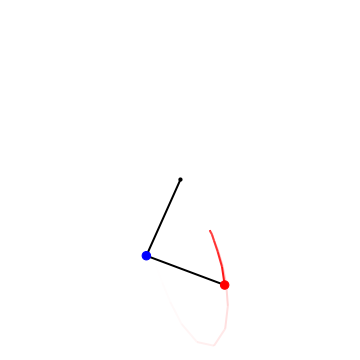

In [137]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle

L1, L2 = 1, 1
#theta1, theta2 = predictions[:, 0], predictions[:, 1]
#cart_coords = radial2cartesian(theta1, theta2, L1, L2)

fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

import warnings
warnings.filterwarnings("ignore")

images = []
di = 1
N = 300
for i in range(0, N, di):
  #print("{}/{}".format(i // di, N // di), end='\n' if i//di%20==0 else ' ')
  make_plot1(i, x1, y1, x2, y2, L1, L2)
  images.append( fig2image(fig) )

In [138]:
import importlib
importlib.reload(proglog)
print("Base-predicted dynamics of the double pendulum:")
proglog.default_bar_logger = partial(proglog.default_bar_logger, None)
ImageSequenceClip(images, fps=25).ipython_display()

Base-predicted dynamics of the double pendulum:


In [140]:
red_centers7

array([[212., 155.],
       [213., 153.],
       [212., 154.],
       ...,
       [353., 442.],
       [350., 438.],
       [346., 436.]])

In [141]:
blue_centers7

array([[195., 316.],
       [194., 316.],
       [194., 317.],
       ...,
       [416., 588.],
       [416., 586.],
       [413., 584.]])

In [143]:
green_center7

[323.0, 285.0]

In [144]:
from sklearn import preprocessing

In [150]:
red2=preprocessing.normalize(green_center7-red_centers7)
red2

array([[ 0.64934491,  0.76049404],
       [ 0.6401844 ,  0.76822128],
       [ 0.64646424,  0.76294429],
       ...,
       [-0.18768705, -0.98222888],
       [-0.17378533, -0.98478356],
       [-0.1505811 , -0.98859766]])

In [157]:
blue2=red2+preprocessing.normalize(red_centers7-blue_centers7)
blue2

array([[ 0.75435122, -0.23397751],
       [ 0.7559649 , -0.22505354],
       [ 0.75622646, -0.23101359],
       ...,
       [-0.58388212, -1.90039524],
       [-0.58106861, -1.89808544],
       [-0.56299227, -1.89959548]])

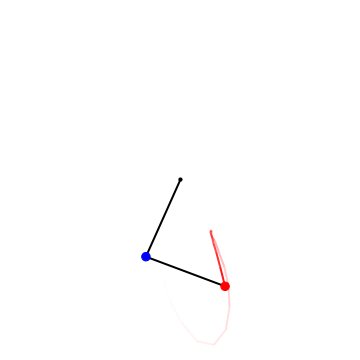

In [158]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle

L1, L2 = 1, 1
#theta1, theta2 = predictions[:, 0], predictions[:, 1]
#cart_coords = radial2cartesian(theta1, theta2, L1, L2)

fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

import warnings
warnings.filterwarnings("ignore")

images = []
di = 1
N = 300
for i in range(0, N, di):
  #print("{}/{}".format(i // di, N // di), end='\n' if i//di%20==0 else ' ')
  make_plot1(i, red2[:, 0], red2[:, 1], blue2[:, 0], blue2[:, 1], L1, L2)
  images.append( fig2image(fig) )

In [159]:
import importlib
importlib.reload(proglog)
print("Base-predicted dynamics of the double pendulum:")
proglog.default_bar_logger = partial(proglog.default_bar_logger, None)
ImageSequenceClip(images, fps=25).ipython_display()

Base-predicted dynamics of the double pendulum:


In [167]:
red2[:, 0]=-red2[:, 0]
blue2[:, 0]=-blue2[:, 0]

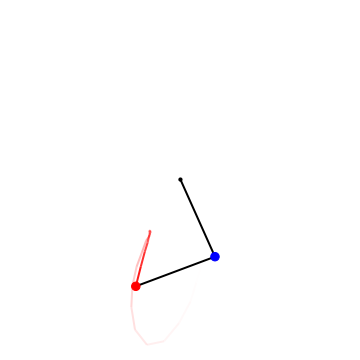

In [168]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle

L1, L2 = 1, 1
#theta1, theta2 = predictions[:, 0], predictions[:, 1]
#cart_coords = radial2cartesian(theta1, theta2, L1, L2)

fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

import warnings
warnings.filterwarnings("ignore")

images = []
di = 1
N = 300
for i in range(0, N, di):
  #print("{}/{}".format(i // di, N // di), end='\n' if i//di%20==0 else ' ')
  make_plot1(i, red2[:, 0], red2[:, 1], blue2[:, 0], blue2[:, 1], L1, L2)
  images.append( fig2image(fig) )

In [169]:
import importlib
importlib.reload(proglog)
print("Base-predicted dynamics of the double pendulum:")
proglog.default_bar_logger = partial(proglog.default_bar_logger, None)
ImageSequenceClip(images, fps=25).ipython_display()

Base-predicted dynamics of the double pendulum:
